In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
#Reading data:

df = pd.read_csv('D:\ML\Project\data/consumption.csv')
weather_avg = pd.read_csv('D:\ML\Project\data\weather-avg.csv')
weather_min = pd.read_csv('D:\ML\Project\data\weather-min.csv')
weather_max = pd.read_csv('D:\ML\Project\data\weather-max.csv')
info = pd.read_csv('D:\ML\Project\data\info.csv')

In [3]:
weather_avg = weather_avg.set_index("meter_id")
weather_min = weather_min.set_index("meter_id")
weather_max = weather_max.set_index("meter_id")
info = info.set_index("meter_id")
weather_avg_sorted = weather_avg.reindex(df.iloc[:,0])
weather_min_sorted = weather_min.reindex(df.iloc[:,0])
weather_max_sorted = weather_max.reindex(df.iloc[:,0])
info_sorted = info.reindex(df.iloc[:,0])
brinfo=info_sorted['num_bedrooms']
br_NaNs_number = brinfo.isnull().sum()


In [4]:
# Filling the mean value for the NaN values in num_bedrooms column:
values = {'num_bedrooms' : brinfo.mean()}
info_filled_br = info_sorted.fillna(value = values)
brinfo_filled = info_filled_br['num_bedrooms']

In [5]:
def get_monthi(n):
    begin=48*31*(n-1)+1
    end=48*31*n
    if n==1:
        begin=1
    if n>1:
        end-=3*48
    if n>2:
        begin-=3*48
    if n>3:
        end-=48
    if n>4:
        begin-=48
    if n>5:
        end-=48
    if n>6:
        begin-=48
    if n>8:
        end-=48
    if n>9:
        begin-=48
    if n>10:
        end-=48
    if n>11:
        begin-=48
    return begin,end

def get_mean_temp(row,month):
    """
    row: is the row (meter_id) we would like to get the average temperature for.
    month: which month (columns) we would get the average temperature for.
    returns: the average temperature for a specific meter_id for a specific month.
    """
    if month==1:
        return row.loc[:,"2017-01-01 00:00:00":"2017-01-31 00:00:00"].mean(1)
    elif month==2:
        return row.loc[:,"2017-02-01 00:00:00":"2017-02-28 00:00:00"].mean(1)
    elif month==3:
        return row.loc[:,"2017-03-01 00:00:00":"2017-03-31 00:00:00"].mean(1)
    elif month==4:
        return row.loc[:,"2017-04-01 00:00:00":"2017-04-30 00:00:00"].mean(1)
    elif month==5:
        return row.loc[:,"2017-05-01 00:00:00":"2017-05-31 00:00:00"].mean(1)
    elif month==6:
        return row.loc[:,"2017-06-01 00:00:00":"2017-06-30 00:00:00"].mean(1)
    elif month==7:
        return row.loc[:,"2017-07-01 00:00:00":"2017-07-31 00:00:00"].mean(1)
    elif month==8:
        return row.loc[:,"2017-08-01 00:00:00":"2017-08-31 00:00:00"].mean(1)
    elif month==9:
        return row.loc[:,"2017-09-01 00:00:00":"2017-09-30 00:00:00"].mean(1)
    elif month==10:
        return row.loc[:,"2017-10-01 00:00:00":"2017-10-31 00:00:00"].mean(1)
    elif month==11:
        return row.loc[:,"2017-11-01 00:00:00":"2017-11-30 00:00:00"].mean(1)
    elif month==12:
        return row.loc[:,"2017-12-01 00:00:00":"2017-12-31 00:00:00"].mean(1)
    else:
        print("Error: this is not a valid input for month")

In [6]:
plt.style.use('tableau-colorblind10')


<AxesSubplot:>

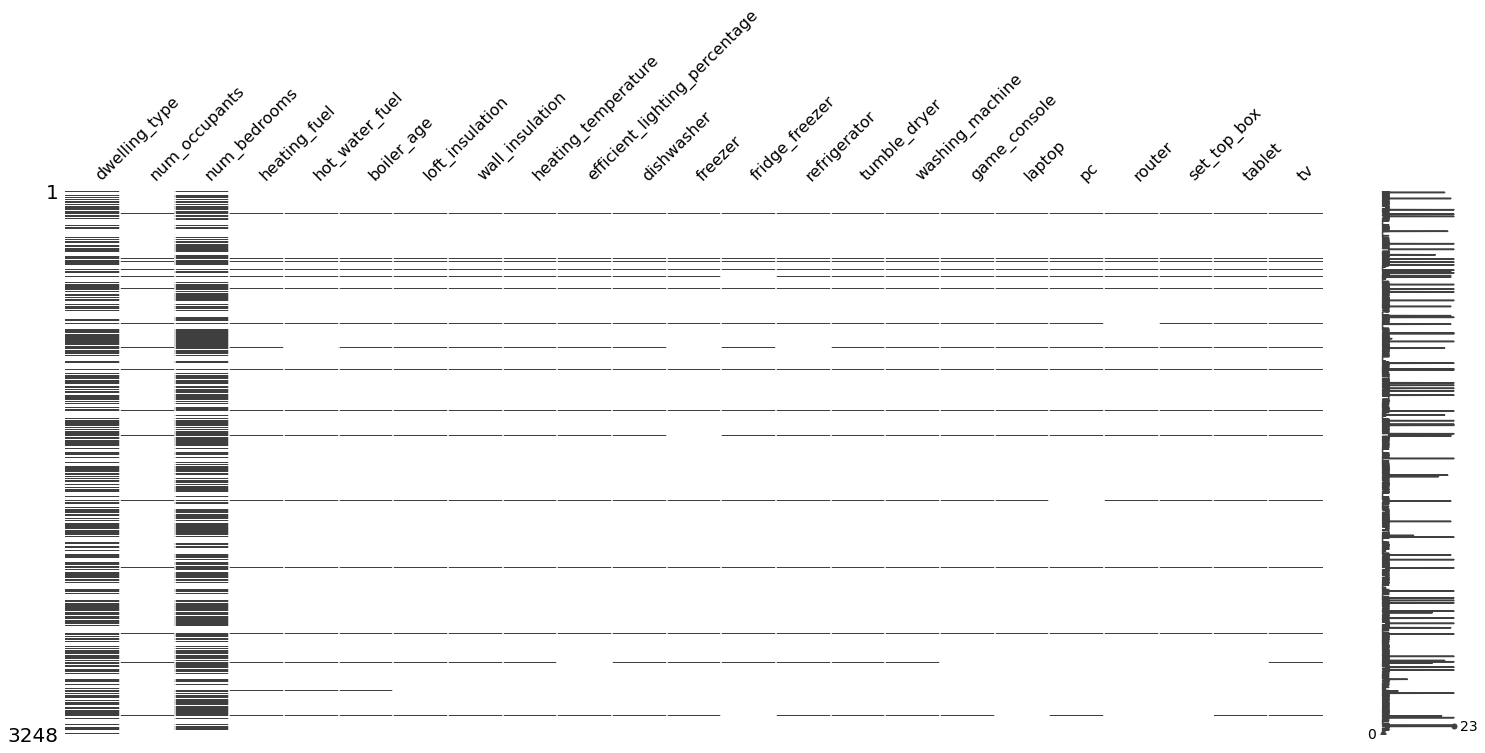

In [7]:
import missingno as msno
msno.matrix(info_sorted)

In [8]:
print("percentage of NaN values for each feature: ")
info_sorted.isnull().sum()/info_sorted.shape[0]

percentage of NaN values for each feature: 


dwelling_type                    0.475985
num_occupants                    0.977217
num_bedrooms                     0.427648
heating_fuel                     0.975985
hot_water_fuel                   0.976601
boiler_age                       0.977217
loft_insulation                  0.976909
wall_insulation                  0.976909
heating_temperature              0.977217
efficient_lighting_percentage    0.977525
dishwasher                       0.976601
freezer                          0.978448
fridge_freezer                   0.978448
refrigerator                     0.977525
tumble_dryer                     0.976601
washing_machine                  0.976601
game_console                     0.977833
laptop                           0.978448
pc                               0.978448
router                           0.978756
set_top_box                      0.978448
tablet                           0.978448
tv                               0.976909
dtype: float64

In [9]:
info.columns

Index(['dwelling_type', 'num_occupants', 'num_bedrooms', 'heating_fuel',
       'hot_water_fuel', 'boiler_age', 'loft_insulation', 'wall_insulation',
       'heating_temperature', 'efficient_lighting_percentage', 'dishwasher',
       'freezer', 'fridge_freezer', 'refrigerator', 'tumble_dryer',
       'washing_machine', 'game_console', 'laptop', 'pc', 'router',
       'set_top_box', 'tablet', 'tv'],
      dtype='object')

In [10]:
for i in info.columns:
    print(i, "\n",  info_sorted[i].value_counts(), "\n")
    #print each column data.

dwelling_type 
 semi_detached_house    659
detached_house         374
terraced_house         312
bungalow               293
flat                    64
Name: dwelling_type, dtype: int64 

num_occupants 
 2.0    44
4.0    13
3.0    10
1.0     7
Name: num_occupants, dtype: int64 

num_bedrooms 
 3.0    1162
4.0     342
2.0     261
5.0      79
1.0      15
Name: num_bedrooms, dtype: int64 

heating_fuel 
 gas        68
other       4
elec        4
lpg_oil     2
Name: heating_fuel, dtype: int64 

hot_water_fuel 
 gas      61
elec     10
other     5
Name: hot_water_fuel, dtype: int64 

boiler_age 
 new    45
old    29
Name: boiler_age, dtype: int64 

loft_insulation 
 y    68
n     7
Name: loft_insulation, dtype: int64 

wall_insulation 
 y_cavity      53
n             12
not_sure       5
y_internal     4
y_external     1
Name: wall_insulation, dtype: int64 

heating_temperature 
 18_to_20    50
above_20    11
below_18     8
not_sure     5
Name: heating_temperature, dtype: int64 

efficient_li

In [11]:
#One-hot encoding non-numeric values:

dwelling_type = pd.get_dummies(info_sorted.dwelling_type, prefix='dwelling_type')
heating_fuel  = pd.get_dummies(info_sorted.heating_fuel, prefix='heating_fuel')
hot_water_fuel  = pd.get_dummies(info_sorted.hot_water_fuel, prefix='hot_water_fuel')
boiler_age   = pd.get_dummies(info_sorted.boiler_age , prefix='boiler_age')
loft_insulation = pd.get_dummies(info_sorted.loft_insulation  , prefix='loft_insulation')
wall_insulation= pd.get_dummies(info_sorted.wall_insulation , prefix='wall_insulation')
heating_temperature    = pd.get_dummies(info_sorted.heating_temperature, prefix='heating_temperature')
efficient_lighting_percentage= pd.get_dummies(info_sorted.efficient_lighting_percentage,
                                              prefix='efficient_lighting_percentage')

In [12]:
#only keep numerical features.

info_numeric = info_sorted.select_dtypes(['number']) 
info_numeric

,num_occupants,num_bedrooms,dishwasher,freezer,fridge_freezer,refrigerator,tumble_dryer,washing_machine,game_console,laptop,pc,router,set_top_box,tablet,tv
meter_id,,,,,,,,,,,,,,,
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0xfdaf9f857621ec06f2cf801f42a020a322835090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
#When the number of available neighbors is less than n_neighbors and there are no defined distances
#to the training set, #the training set average for that feature is used during imputation.
info_numeric_imputed = imputer.fit_transform(info_numeric)
info_numeric_imputed_df = pd.DataFrame(data = info_numeric_imputed)
info_numeric_imputed_df.columns = info_numeric.columns
info_numeric_imputed_df.index = info_numeric.index
info_numeric_imputed_df

#doesnt make much sense. discard it.

,num_occupants,num_bedrooms,dishwasher,freezer,fridge_freezer,refrigerator,tumble_dryer,washing_machine,game_console,laptop,pc,router,set_top_box,tablet,tv
meter_id,,,,,,,,,,,,,,,
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,2.500000,2.000000,0.500000,1.500000,0.500000,1.500000,0.500000,1.0,1.5,1.500000,1.000000,1.000000,1.0,0.500000,2.500000
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da,2.391892,3.112426,0.592105,0.728571,0.771429,0.671233,0.618421,1.0,0.5,1.228571,0.828571,1.028986,1.1,1.257143,2.026667
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f,2.391892,3.112426,0.592105,0.728571,0.771429,0.671233,0.618421,1.0,0.5,1.228571,0.828571,1.028986,1.1,1.257143,2.026667
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407,2.391892,3.112426,0.592105,0.728571,0.771429,0.671233,0.618421,1.0,0.5,1.228571,0.828571,1.028986,1.1,1.257143,2.026667
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f,2.391892,3.112426,0.592105,0.728571,0.771429,0.671233,0.618421,1.0,0.5,1.228571,0.828571,1.028986,1.1,1.257143,2.026667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065,2.391892,3.112426,0.592105,0.728571,0.771429,0.671233,0.618421,1.0,0.5,1.228571,0.828571,1.028986,1.1,1.257143,2.026667
0xfdaf9f857621ec06f2cf801f42a020a322835090,2.391892,3.112426,0.592105,0.728571,0.771429,0.671233,0.618421,1.0,0.5,1.228571,0.828571,1.028986,1.1,1.257143,2.026667
0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18,2.391892,3.112426,0.592105,0.728571,0.771429,0.671233,0.618421,1.0,0.5,1.228571,0.828571,1.028986,1.1,1.257143,2.026667


In [15]:
#Multivariate feature imputation:

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(info_numeric)

# the model learns that the second feature is double the first
info_numeric_multimp= imp.transform(info_numeric)
info_numeric_multimputed_df = pd.DataFrame(data = info_numeric_multimp)
info_numeric_multimputed_df.columns = info_numeric.columns
info_numeric_multimputed_df.index = info_numeric.index
info_numeric_multimputed_df

,num_occupants,num_bedrooms,dishwasher,freezer,fridge_freezer,refrigerator,tumble_dryer,washing_machine,game_console,laptop,pc,router,set_top_box,tablet,tv
meter_id,,,,,,,,,,,,,,,
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,2.052273,2.000000,0.353436,0.618629,0.689356,0.486891,0.491630,0.977845,0.444243,1.034347,0.698292,0.974274,0.869153,0.860792,1.612677
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da,2.358633,3.112426,0.571851,0.711979,0.749008,0.659381,0.607665,0.997643,0.486675,1.203581,0.816566,1.024378,1.076750,1.227534,1.991117
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f,2.358633,3.112426,0.571851,0.711979,0.749008,0.659381,0.607665,0.997643,0.486675,1.203581,0.816566,1.024378,1.076750,1.227534,1.991117
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407,2.358633,3.112426,0.571851,0.711979,0.749008,0.659381,0.607665,0.997643,0.486675,1.203581,0.816566,1.024378,1.076750,1.227534,1.991117
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f,2.358633,3.112426,0.571851,0.711979,0.749008,0.659381,0.607665,0.997643,0.486675,1.203581,0.816566,1.024378,1.076750,1.227534,1.991117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065,2.358633,3.112426,0.571851,0.711979,0.749008,0.659381,0.607665,0.997643,0.486675,1.203581,0.816566,1.024378,1.076750,1.227534,1.991117
0xfdaf9f857621ec06f2cf801f42a020a322835090,2.358633,3.112426,0.571851,0.711979,0.749008,0.659381,0.607665,0.997643,0.486675,1.203581,0.816566,1.024378,1.076750,1.227534,1.991117
0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18,2.358633,3.112426,0.571851,0.711979,0.749008,0.659381,0.607665,0.997643,0.486675,1.203581,0.816566,1.024378,1.076750,1.227534,1.991117


In [16]:
from sklearn.preprocessing import StandardScaler
#these don't work out of the function file apperantly
def Eval_random_Split(features,npEn_con,split,model,print_res=True):
    X_train, X_test, y_train, y_test = train_test_split(
    features , npEn_con, test_size=split, random_state=0)
    #print(X_train.shape, y_train.shape)
    #print(X_test.shape, y_test.shape)
    model.fit(X_train,y_train)
    if print_res:
        y_pred=model.predict(X_test)
        print('Coefficients: \n', model.coef_)
        print('Intercept: {}'.format(model.intercept_))
        # The mean squared error
        print('Mean squared error: %.8f' % mean_squared_error(y_test, y_pred))
        # The coefficient of determination: 1 is perfect prediction
        print('Coefficient of determination: %.8f' % r2_score(y_test, y_pred))
    return model

def Check_1D(features,npEn_con,split,model,print_res=True):
    #extract only the last month from the features
    features_lm=features[:,(features.shape[-1]-1)]
    features_lm=features_lm.reshape(-1,1)
    #use previously made function
    return Eval_random_Split(features_lm,npEn_con,split,model,print_res)

#z-normalization on data:
def normalise_features(np_features):
    #np_features_norm= np.zeros(shape = np_features.shape)
    np_features_norm=np_features
    if np_features.ndim==1:
        np_features_norm=(np_features-np.mean(np_features))/np.std(np_features)
    else: 
        for i in range(np_features.shape[1]):
            np_features_norm[:,i] = (np_features[:,i]-np.mean(np_features[:,i]))/np.std(np_features[:,i])
    return np_features_norm

def Eval_Kfold_Split(features,npEn_con,n_splits,model,print_res=True):
    kf = KFold(n_splits, shuffle=True)
    models_arr=[]
    MSE_arr=[]
    R2_arr=[]
    for train_index, test_index in kf.split(features): 
        cmodel=model
        cmodel.fit(features[train_index,],npEn_con[train_index])
        models_arr.append(cmodel)
        y_pred = cmodel.predict(features[test_index,])
        MSE_arr.append(mean_squared_error(npEn_con[test_index,], y_pred));
        R2_arr.append(r2_score(npEn_con[test_index,], y_pred))
    if print_res:
        # The mean squared error
        print('Mean squared error:')
        print(np.mean(MSE_arr))
        # The coefficient of determination: 1 is perfect prediction
        print('Coefficient of determination: ' )
        print(np.mean(R2_arr))
    return models_arr,np.mean(R2_arr)

In [17]:
def sort_big_data(nim,nom):
    #nim: number of input months
    #nom: number of output months
    
    #CHECK INPUTS
    if nim<1:
        print("number of input months (nim) should be greater or equal to 1")
        return 0
    if nom<1:
        print("number of output months (nom) should be greater or equal to 1")
        return 0
    
    #DATA STORAGE
    En_con=[]        #current/future consumption (this is what we try to predict)
    prev_con=[]      #previous consumption
    prev_daily_con=[]  #previous consumption on a daily basis
    #extra info
    temps=[]
    temps_min=[]
    temps_max=[]
    month_arr=[]
    br_arr=[]       #Bedroom info array
    br_arr_mean=[]
    dwt_arr=[]      #dwelling type array
    y = pd.get_dummies(info_sorted.dwelling_type, prefix='dwelling_type')
    #new features
    num_occupants_=[]
    dishwasher_ =[]
    freezer_ =[]
    fridge_freezer_ =[]
    refrigerator_ =[]
    tumble_dryer_ =[]
    washing_machine_ =[]
    game_console_ =[]
    laptop_ =[]
    pc_ =[]
    router_ =[]
    set_top_box_ =[]
    tablet_ =[]
    tv_ =[]
    
    #heating_fuel: 
    heating_fuel_elec=[]
    heating_fuel_gas= []
    heating_fuel_lpg_oil=[]
    heating_fuel_other= []

    #hot_water_fuel:
    hot_water_fuel_elec=[]
    hot_water_fuel_gas=[]
    hot_water_fuel_other=[] 

    #boiler_age:
    boiler_age_new= []
    boiler_age_old= [] 

    #loft_insulation:
    loft_insulation_n=[] 
    loft_insulation_y= []

    #wall_insulation:
    wall_insulation_n=[]
    wall_insulation_not_sure=[]
    wall_insulation_y_cavity= []
    wall_insulation_y_external= []
    wall_insulation_y_internal= []

    #heating_temperature:
    heating_temperature_18_to_20=[]
    heating_temperature_above_20=[]
    heating_temperature_below_18=[]
    heating_temperature_not_sure= []

    #efficient_lighting_percentage:
    efficient_lighting_percentage_0_to_25=[]
    efficient_lighting_percentage_25_to_50=[]
    efficient_lighting_percentage_50_to_75=[]
    efficient_lighting_percentage_75_to_100=[]
        
    num_occupants__ = info_numeric_multimputed_df["num_occupants"]
    dishwasher__ = info_numeric_multimputed_df["dishwasher"]
    freezer__ = info_numeric_multimputed_df["freezer"]
    fridge_freezer__ = info_numeric_multimputed_df["fridge_freezer"]
    refrigerator__ = info_numeric_multimputed_df["refrigerator"]
    tumble_dryer__ = info_numeric_multimputed_df["tumble_dryer"]
    washing_machine__ = info_numeric_multimputed_df["washing_machine"]
    game_console__ = info_numeric_multimputed_df["game_console"]
    laptop__ = info_numeric_multimputed_df["laptop"]
    pc__ = info_numeric_multimputed_df["pc"]
    router__ = info_numeric_multimputed_df["router"]
    set_top_box__= info_numeric_multimputed_df["set_top_box"]
    tablet__ = info_numeric_multimputed_df["tablet"]
    tv__ = info_numeric_multimputed_df["tv"]   
    
    #LOOP
    NaN_t=1200  #thershold
    #NaN_day_T=20 #the amount of days of data we want in a input month(28 days)
    for i in range(df.shape[0]): # loop over all users
        meter=df.iloc[i] # = row number i  
    
        #loop over all month from januari until month 14-nim-nom
        #if the month is higher then this we don't have enough data for the nim input and nom output variables
        #in the case of nim=1 nom=1 we get range(1,12) wich result in m going from 1 to 11 like we want
        for m in range (1,14-nim-nom): 
            #load current month
            bi, ei =get_monthi(m)    #bi (begin index) ei(end index)
            month=meter[bi:ei]       #data for the month m for the row user (row) i
            #load bedroom info
            row = brinfo[i:i+1]               #bedroom info with NaN values
            row_mean = brinfo_filled[i:i+1]  #bedroom info with mean values
            #Load dwelling type
            dew_type_row = y[i:i+1]
            
            num_occupants_row =num_occupants__[i:i+1]
            dishwasher_row = dishwasher__[i:i+1]
            freezer_row = freezer__[i:i+1]
            fridge_freezer_row = fridge_freezer__[i:i+1]
            refrigerator_row = refrigerator__[i:i+1]
            tumble_dryer_row = tumble_dryer__[i:i+1]
            washing_machine_row = washing_machine__[i:i+1]
            game_console_row = game_console__[i:i+1]
            laptop_row =  laptop__[i:i+1]
            pc_row = pc__[i:i+1]
            router_row = router__[i:i+1]
            set_top_box_row = set_top_box__[i:i+1]
            tablet_row = tablet__[i:i+1]
            tv_row = tv__[i:i+1] 
            
            heating_fuel_row = heating_fuel[i:i+1]
            hot_water_fuel_row = hot_water_fuel[i:i+1]
            boiler_age_row = boiler_age[i:i+1]
            loft_insulation_row = loft_insulation[i:i+1]
            wall_insulation_row = wall_insulation[i:i+1]
            heating_temperature_row = heating_temperature[i:i+1]
            efficient_lighting_percentage_row = efficient_lighting_percentage[i:i+1]
            
            # Count the amount of NaN's in all months that will be used
            n_NaN=0
            for k in range(nim+nom):
                bi, ei =get_monthi(m+k)        #bi (begin index) ei(end index)
                tempmonth=meter[bi:ei]       #data for the month m for the row user (row) i
                n_NaN+=tempmonth.isnull().sum() 
            
            if n_NaN<NaN_t:
                #save input for month j,j+1,..,j+nim-1
                input_months=np.zeros(nim)
                input_days=np.zeros([nim,28])
                input_temps=np.zeros(nim)
                input_temps_min=np.zeros(nim)
                input_temps_max=np.zeros(nim)
                output_months=np.zeros(nom)
                output_temps=np.zeros(nom)
                output_temps_min=np.zeros(nom)
                output_temps_max=np.zeros(nom)
                for k in range(nim):
                    #load month for input j+k (k goes from 0 to nim-1)
                    bik,eik=get_monthi(m+k)
                    input_months[k]=meter[bik:eik].mean()
                    daily_con=np.zeros(28)
                    current_month=meter[bik:eik]
                    #print(current_month)
                    #save daily data
                    for d in range(28):
                        daily_con[d]=current_month[d*48:(d+1)*48].mean()
                        input_days[k,:]=daily_con
                    #replace all NaN with the mean value
                    input_days[k,np.isnan(input_days[k,:])]=input_months[k] 
                    #temperatures
                    input_temps[k]=get_mean_temp(weather_avg_sorted.iloc[i:i+1],m+k)
                    input_temps_min[k]=get_mean_temp(weather_min_sorted.iloc[i:i+1],m+k)
                    input_temps_max[k]=get_mean_temp(weather_max_sorted.iloc[i:i+1],m+k)
                for k in range(nom):
                    #load month for input j+nim+k
                    bik,eik=get_monthi(m+nim+k)
                    output_months[k]=meter[bik:eik].mean()
                    #temps
                    output_temps[k]=get_mean_temp(weather_avg_sorted.iloc[i:i+1],m+nim+k)
                    output_temps_min[k]=get_mean_temp(weather_min_sorted.iloc[i:i+1],m+nim+k)
                    output_temps_max[k]=get_mean_temp(weather_max_sorted.iloc[i:i+1],m+nim+k)
                #debug if statement checks for NaN in input month
#                 if np.isnan(np.sum(input_months)):
#                     print("input month has nan value for months=%i index=%i" %(m,i))
#                     print(input_months)
#                     return 1
#                 if np.isnan(np.sum(np.sum(input_days))):
#                     print("input days has nan value for months=%i index=%i" %(m,i))
#                     print(input_days)
#                     return 1
#                 if np.isnan(np.sum(output_months)):
#                     print("Output months has nan value for months=%i index=%i" %(m,i))
#                     print(output_months)
#                     return 1
                #store Energy consumption data
                prev_con.append(input_months)
                prev_daily_con.append(input_days)
                En_con.append(output_months)
                #save extra information 
                temps.append(np.concatenate((input_temps,output_temps)))
                temps_min.append(np.concatenate((input_temps_min,output_temps_min)))
                temps_max.append(np.concatenate((input_temps_max,output_temps_max)))
                month_arr.append(m+nim)
                #bedroom info
                n_br=row[0]
                br=np.zeros(5)
                if ~np.isnan(n_br):
                    #print(n_br)
                    br[np.int(n_br-1)]=1
                br_arr.append(br)
                br_arr_mean.append(row_mean[0])
                #dwelling type
                dwt_arr.append(dew_type_row.to_numpy().ravel())
                #new features
                num_occupants_.append(num_occupants_row[0])
                dishwasher_.append(dishwasher_row[0])
                freezer_.append(freezer_row[0])
                fridge_freezer_.append(fridge_freezer_row[0])
                refrigerator_.append(refrigerator_row[0])
                tumble_dryer_.append(tumble_dryer_row[0])
                washing_machine_.append(washing_machine_row[0])
                game_console_.append(game_console_row[0])
                laptop_.append(laptop_row[0])
                pc_.append(pc_row[0])
                router_.append(router_row[0])
                set_top_box_.append(set_top_box_row[0])
                tablet_.append(tablet_row[0])
                tv_.append(tv_row[0])
                #one-hot-encoded-values:                
                heating_fuel_elec.append(heating_fuel_row.iloc[0,0])
                heating_fuel_gas.append(heating_fuel_row.iloc[0,1])
                heating_fuel_lpg_oil.append(heating_fuel_row.iloc[0,2])
                heating_fuel_other.append(heating_fuel_row.iloc[0,3])
                
                hot_water_fuel_elec.append(hot_water_fuel_row.iloc[0,0])
                hot_water_fuel_gas.append(hot_water_fuel_row.iloc[0,1])
                hot_water_fuel_other.append(hot_water_fuel_row.iloc[0,2])
                
                boiler_age_new.append(boiler_age_row.iloc[0,0])
                boiler_age_old.append(boiler_age_row.iloc[0, 1])
                
                loft_insulation_n.append(loft_insulation_row.iloc[0,0])
                loft_insulation_y.append(loft_insulation_row.iloc[0,1])
                
                wall_insulation_n.append(wall_insulation_row.iloc[0,0])
                wall_insulation_not_sure.append(wall_insulation_row.iloc[0,1])
                wall_insulation_y_cavity.append(wall_insulation_row.iloc[0,2])
                wall_insulation_y_external.append(wall_insulation_row.iloc[0,3])
                wall_insulation_y_internal.append(wall_insulation_row.iloc[0,4])
                
                heating_temperature_18_to_20.append(heating_temperature_row.iloc[0,0])
                heating_temperature_above_20.append(heating_temperature_row.iloc[0,1])
                heating_temperature_below_18.append(heating_temperature_row.iloc[0,2])
                heating_temperature_not_sure.append(heating_temperature_row.iloc[0,3])
                
                efficient_lighting_percentage_0_to_25.append(efficient_lighting_percentage_row.iloc[0,0])
                efficient_lighting_percentage_25_to_50.append(efficient_lighting_percentage_row.iloc[0,1])
                efficient_lighting_percentage_50_to_75.append(efficient_lighting_percentage_row.iloc[0,2])
                efficient_lighting_percentage_75_to_100.append(efficient_lighting_percentage_row.iloc[0,3])
                        
                #break out of outer month loops since the inner month loop takes care of all months
                #break
                
    # converting list to numpy arrays: 
    npEn_con=np.array(En_con)
    npprev_con=np.array(prev_con)
    npprev_daily_con=np.array(prev_daily_con)
    nptemps=np.array(temps)
    nptemps_min=np.array(temps_min)
    nptemps_max=np.array(temps_max)
    npmonth=np.array(month_arr)
    npbr=np.array(br_arr)
    npbrmean=np.array(br_arr_mean)
    npdwt=np.array(dwt_arr)
    num_occupants= np.array(num_occupants_)
    dishwasher =np.array(dishwasher_)
    freezer =np.array(freezer_)
    fridge_freezer =np.array(fridge_freezer_)
    refrigerator =np.array(refrigerator_)
    tumble_dryer =np.array(tumble_dryer_)
    washing_machine =np.array(washing_machine_)
    game_console = np.array(game_console_)
    laptop =np.array(laptop_)
    pc =np.array(pc_)
    router =np.array(router_)
    set_top_box =np.array(set_top_box_)
    tablet =np.array(tablet_)
    tv =np.array(tv_)
    heating_fuel_elec=np.array(heating_fuel_elec)
    heating_fuel_gas= np.array(heating_fuel_gas)
    heating_fuel_lpg_oil=np.array(heating_fuel_lpg_oil)
    heating_fuel_other= np.array(heating_fuel_other)
    hot_water_fuel_elec=np.array(hot_water_fuel_elec)
    hot_water_fuel_gas=np.array(hot_water_fuel_gas)
    hot_water_fuel_other=np.array(hot_water_fuel_other)
    boiler_age_new= np.array(boiler_age_new)
    boiler_age_old= np.array(boiler_age_old)
    loft_insulation_n=np.array(loft_insulation_n)
    loft_insulation_y= np.array(loft_insulation_y)
    wall_insulation_n=np.array(wall_insulation_n)
    wall_insulation_not_sure=np.array(wall_insulation_not_sure)
    wall_insulation_y_cavity= np.array(wall_insulation_y_cavity)
    wall_insulation_y_external= np.array(wall_insulation_y_external)
    wall_insulation_y_internal= np.array(wall_insulation_y_internal)
    heating_temperature_18_to_20=np.array(heating_temperature_18_to_20)
    heating_temperature_above_20=np.array(heating_temperature_above_20)
    heating_temperature_below_18=np.array(heating_temperature_below_18)
    heating_temperature_not_sure= np.array(heating_temperature_not_sure)
    efficient_lighting_percentage_0_to_25=np.array(efficient_lighting_percentage_0_to_25)
    efficient_lighting_percentage_25_to_50=np.array(efficient_lighting_percentage_25_to_50)
    efficient_lighting_percentage_50_to_75=np.array(efficient_lighting_percentage_50_to_75)
    efficient_lighting_percentage_75_to_100=np.array(efficient_lighting_percentage_75_to_100)
    
    features = np.column_stack((npbrmean,npdwt, num_occupants,dishwasher, freezer, fridge_freezer,
                                refrigerator, tumble_dryer, washing_machine,game_console,
                                laptop,pc, router, set_top_box, tablet, tv, heating_fuel_elec,
                                heating_fuel_gas, heating_fuel_lpg_oil, heating_fuel_other,
                                hot_water_fuel_elec, hot_water_fuel_gas, 
                                hot_water_fuel_other, boiler_age_new, boiler_age_old, 
                                loft_insulation_n, loft_insulation_y, wall_insulation_n,
                                wall_insulation_not_sure, wall_insulation_y_cavity
                                ,wall_insulation_y_external, wall_insulation_y_internal, 
                                heating_temperature_18_to_20, 
                                heating_temperature_above_20, 
                                heating_temperature_below_18, heating_temperature_not_sure,
                                efficient_lighting_percentage_0_to_25, 
                                efficient_lighting_percentage_25_to_50, 
                                efficient_lighting_percentage_50_to_75, 
                                efficient_lighting_percentage_75_to_100))
    
    npEn_con_st=StandardScaler().fit_transform(npEn_con) 
    npprev_con_st=StandardScaler().fit_transform(npprev_con) 
    npprev_daily_con_st=normalise_features(npprev_daily_con) 
    nptemps_st=StandardScaler().fit_transform(nptemps) 
    nptemps_min_st=StandardScaler().fit_transform(nptemps_min) 
    nptemps_max_st=StandardScaler().fit_transform(nptemps_max) 
    npmonth_st=normalise_features(npmonth) 
    features_st=StandardScaler().fit_transform(features) 
    
    return [npEn_con_st,npprev_con_st,npprev_daily_con_st,nptemps_st,nptemps_min_st,nptemps_max_st,npmonth_st,features_st]


In [18]:
bigdata11=sort_big_data(1,1)

In [152]:
bigdata21=sort_big_data(2,1)
bigdata31=sort_big_data(3,1)
bigdata41=sort_big_data(4,1)
bigdata51=sort_big_data(5,1)
bigdata61=sort_big_data(6,1)

### Linear Regression

In [106]:
#ordinary linear regression:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   features_std , bigdata11[0], test_size=0.3, random_state=0)

linreg = LinearRegression()
linreg.fit(X_train,y_train)
#print(linreg.predict(x[:10]))

y_pred = linreg.predict(X_test)
#err = np.abs(p - y_test_norm)


#The coefficients
print('Coefficients: \n', linreg.coef_)
print('Intercept: {}'.format(linreg.intercept_))
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))

print('RMSE: %.8f'
      % np.sqrt(mean_squared_error(y_test, y_pred)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.5f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [[ 8.98200733e-01  3.90583384e-01  8.76146740e-02 -2.14879812e-01
  -4.03950162e-03 -7.03380300e-02 -2.30380462e-01  6.34335798e-02
   4.48168564e-03 -4.44500354e-03 -1.03266932e-02  2.58099246e-03
  -9.98579786e-03 -4.49502267e-03  7.39850630e-03 -8.66883332e-04
  -2.28557857e-03 -1.95423903e-03  2.60197354e-03  3.15875816e-03
  -6.49976682e-04 -9.96978639e-04 -5.38975600e-03 -4.29333646e-03
   6.27027601e-04 -2.36160560e-03  7.51264261e-03  1.00083755e-03
  -1.44552902e-02  9.76343665e-05  1.22025319e-02  3.46327555e-03
   2.05701876e-02  3.45752438e-04 -1.29601640e-02 -5.55657952e-03
  -5.45716792e-03 -2.66369403e-02 -9.55355648e-02  2.43059377e-02
   1.71734195e-02  4.75806757e-02  4.52703165e-03  4.27894255e-03
   3.88670791e-02  2.21955082e-02  1.64739807e-02  1.63222907e-02
  -2.77897490e-03 -8.90777217e-03 -3.10559407e-03  1.80015829e-03]]
Intercept: [-0.00272619]
Mean squared error: 0.14403417
RMSE: 0.37951833
Coefficient of determination: 0.86209


### PCA 

the percentage of var explained in 1 PC components is  0.1555244961167842
the percentage of var explained in 2 PC components is  0.2836506679423123
the percentage of var explained in 3 PC components is  0.38825271859055765
the percentage of var explained in 4 PC components is  0.43944852385447225
the percentage of var explained in 5 PC components is  0.48545248820861675
the percentage of var explained in 6 PC components is  0.5254430269518499
the percentage of var explained in 7 PC components is  0.5638479500743208
the percentage of var explained in 8 PC components is  0.595670845771327
the percentage of var explained in 9 PC components is  0.6249728193956671
the percentage of var explained in 10 PC components is  0.6518342627528056
the percentage of var explained in 11 PC components is  0.6773755739487264
the percentage of var explained in 12 PC components is  0.7012480292569909
the percentage of var explained in 13 PC components is  0.7236948610333982
the percentage of var explained 

Text(0.5, 1.0, 'PCA')

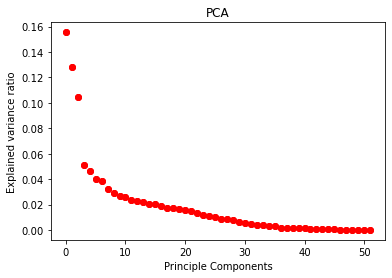

In [85]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features_standardized=features_std
pca=PCA(n_components=52)
principle_components=pca.fit_transform(features_standardized)
plt.plot(pca.explained_variance_ratio_,'ro')
var_sum = 0
counter = 0
for i in pca.explained_variance_ratio_:
    counter +=1
    var_sum = var_sum + i
    print("the percentage of var explained in", counter, "PC components is ", var_sum)

plt.plot(pca.explained_variance_ratio_,'ro')
plt.xlabel("Principle Components")
plt.ylabel("Explained variance ratio")
plt.title("PCA")

### kNN imputer

In [111]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
#When the number of available neighbors is less than n_neighbors and there are no defined distances
#to the training set, #the training set average for that feature is used during imputation.
info_numeric_kNNimputed = imputer.fit_transform(info_numeric)
info_numeric_kNNimputed_df = pd.DataFrame(data = info_numeric_imputed)
info_numeric_kNNimputed_df.columns = info_numeric.columns
info_numeric_kNNimputed_df.index = info_numeric.index
info_numeric_kNNimputed_df


,num_occupants,num_bedrooms,dishwasher,freezer,fridge_freezer,refrigerator,tumble_dryer,washing_machine,game_console,laptop,pc,router,set_top_box,tablet,tv
meter_id,,,,,,,,,,,,,,,
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,2.500000,2.000000,0.500000,1.500000,0.500000,1.500000,0.500000,1.0,1.5,1.500000,1.000000,1.000000,1.0,0.500000,2.500000
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da,2.391892,3.112426,0.592105,0.728571,0.771429,0.671233,0.618421,1.0,0.5,1.228571,0.828571,1.028986,1.1,1.257143,2.026667
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f,2.391892,3.112426,0.592105,0.728571,0.771429,0.671233,0.618421,1.0,0.5,1.228571,0.828571,1.028986,1.1,1.257143,2.026667
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407,2.391892,3.112426,0.592105,0.728571,0.771429,0.671233,0.618421,1.0,0.5,1.228571,0.828571,1.028986,1.1,1.257143,2.026667
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f,2.391892,3.112426,0.592105,0.728571,0.771429,0.671233,0.618421,1.0,0.5,1.228571,0.828571,1.028986,1.1,1.257143,2.026667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065,2.391892,3.112426,0.592105,0.728571,0.771429,0.671233,0.618421,1.0,0.5,1.228571,0.828571,1.028986,1.1,1.257143,2.026667
0xfdaf9f857621ec06f2cf801f42a020a322835090,2.391892,3.112426,0.592105,0.728571,0.771429,0.671233,0.618421,1.0,0.5,1.228571,0.828571,1.028986,1.1,1.257143,2.026667
0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18,2.391892,3.112426,0.592105,0.728571,0.771429,0.671233,0.618421,1.0,0.5,1.228571,0.828571,1.028986,1.1,1.257143,2.026667


In [112]:
def sort_big_data_kNN(nim,nom):
    """
    nim: number of input months
    nom: number of output months
    _kNN is simply the same func but using the kNN imputed values instead of
    the multivariate imputed ones.
    CHECK INPUTS
    """
    
    if nim<1:
        print("number of input months (nim) should be greater or equal to 1")
        return 0
    if nom<1:
        print("number of output months (nom) should be greater or equal to 1")
        return 0
    
    #DATA STORAGE
    En_con=[]        #current/future consumption (this is what we try to predict)
    prev_con=[]      #previous consumption
    prev_daily_con=[]  #previous consumption on a daily basis
    #extra info
    temps=[]
    temps_min=[]
    temps_max=[]
    month_arr=[]
    br_arr=[]       #Bedroom info array
    br_arr_mean=[]
    dwt_arr=[]      #dwelling type array
    y = pd.get_dummies(info_sorted.dwelling_type, prefix='dwelling_type')
    #new features
    num_occupants_=[]
    dishwasher_ =[]
    freezer_ =[]
    fridge_freezer_ =[]
    refrigerator_ =[]
    tumble_dryer_ =[]
    washing_machine_ =[]
    game_console_ =[]
    laptop_ =[]
    pc_ =[]
    router_ =[]
    set_top_box_ =[]
    tablet_ =[]
    tv_ =[]
    
    #heating_fuel: 
    heating_fuel_elec=[]
    heating_fuel_gas= []
    heating_fuel_lpg_oil=[]
    heating_fuel_other= []

    #hot_water_fuel:
    hot_water_fuel_elec=[]
    hot_water_fuel_gas=[]
    hot_water_fuel_other=[] 

    #boiler_age:
    boiler_age_new= []
    boiler_age_old= [] 

    #loft_insulation:
    loft_insulation_n=[] 
    loft_insulation_y= []

    #wall_insulation:
    wall_insulation_n=[]
    wall_insulation_not_sure=[]
    wall_insulation_y_cavity= []
    wall_insulation_y_external= []
    wall_insulation_y_internal= []

    #heating_temperature:
    heating_temperature_18_to_20=[]
    heating_temperature_above_20=[]
    heating_temperature_below_18=[]
    heating_temperature_not_sure= []

    #efficient_lighting_percentage:
    efficient_lighting_percentage_0_to_25=[]
    efficient_lighting_percentage_25_to_50=[]
    efficient_lighting_percentage_50_to_75=[]
    efficient_lighting_percentage_75_to_100=[]
        
    num_occupants__ = info_numeric_kNNimputed_df["num_occupants"]
    dishwasher__ = info_numeric_kNNimputed_df["dishwasher"]
    freezer__ = info_numeric_kNNimputed_df["freezer"]
    fridge_freezer__ = info_numeric_kNNimputed_df["fridge_freezer"]
    refrigerator__ = info_numeric_kNNimputed_df["refrigerator"]
    tumble_dryer__ = info_numeric_kNNimputed_df["tumble_dryer"]
    washing_machine__ = info_numeric_kNNimputed_df["washing_machine"]
    game_console__ = info_numeric_kNNimputed_df["game_console"]
    laptop__ = info_numeric_kNNimputed_df["laptop"]
    pc__ = info_numeric_kNNimputed_df["pc"]
    router__ = info_numeric_kNNimputed_df["router"]
    set_top_box__= info_numeric_kNNimputed_df["set_top_box"]
    tablet__ = info_numeric_kNNimputed_df["tablet"]
    tv__ = info_numeric_kNNimputed_df["tv"]   
    
    #LOOP
    NaN_t=1200  #thershold
    #NaN_day_T=20 #the amount of days of data we want in a input month(28 days)
    for i in range(df.shape[0]): # loop over all users
        meter=df.iloc[i] # = row number i  
    
        #loop over all month from januari until month 14-nim-nom
        #if the month is higher then this we don't have enough data for the nim input and nom output variables
        #in the case of nim=1 nom=1 we get range(1,12) wich result in m going from 1 to 11 like we want
        for m in range (1,14-nim-nom): 
            #load current month
            bi, ei =get_monthi(m)    #bi (begin index) ei(end index)
            month=meter[bi:ei]       #data for the month m for the row user (row) i
            #load bedroom info
            row = brinfo[i:i+1]               #bedroom info with NaN values
            row_mean = brinfo_filled[i:i+1]  #bedroom info with mean values
            #Load dwelling type
            dew_type_row = y[i:i+1]
            
            num_occupants_row =num_occupants__[i:i+1]
            dishwasher_row = dishwasher__[i:i+1]
            freezer_row = freezer__[i:i+1]
            fridge_freezer_row = fridge_freezer__[i:i+1]
            refrigerator_row = refrigerator__[i:i+1]
            tumble_dryer_row = tumble_dryer__[i:i+1]
            washing_machine_row = washing_machine__[i:i+1]
            game_console_row = game_console__[i:i+1]
            laptop_row =  laptop__[i:i+1]
            pc_row = pc__[i:i+1]
            router_row = router__[i:i+1]
            set_top_box_row = set_top_box__[i:i+1]
            tablet_row = tablet__[i:i+1]
            tv_row = tv__[i:i+1] 
            
            heating_fuel_row = heating_fuel[i:i+1]
            hot_water_fuel_row = hot_water_fuel[i:i+1]
            boiler_age_row = boiler_age[i:i+1]
            loft_insulation_row = loft_insulation[i:i+1]
            wall_insulation_row = wall_insulation[i:i+1]
            heating_temperature_row = heating_temperature[i:i+1]
            efficient_lighting_percentage_row = efficient_lighting_percentage[i:i+1]
            
            # Count the amount of NaN's in all months that will be used
            n_NaN=0
            for k in range(nim+nom):
                bi, ei =get_monthi(m+k)        #bi (begin index) ei(end index)
                tempmonth=meter[bi:ei]       #data for the month m for the row user (row) i
                n_NaN+=tempmonth.isnull().sum() 
            
            if n_NaN<NaN_t:
                #save input for month j,j+1,..,j+nim-1
                input_months=np.zeros(nim)
                input_days=np.zeros([nim,28])
                input_temps=np.zeros(nim)
                input_temps_min=np.zeros(nim)
                input_temps_max=np.zeros(nim)
                output_months=np.zeros(nom)
                output_temps=np.zeros(nom)
                output_temps_min=np.zeros(nom)
                output_temps_max=np.zeros(nom)
                for k in range(nim):
                    #load month for input j+k (k goes from 0 to nim-1)
                    bik,eik=get_monthi(m+k)
                    input_months[k]=meter[bik:eik].mean()
                    daily_con=np.zeros(28)
                    current_month=meter[bik:eik]
                    #print(current_month)
                    #save daily data
                    for d in range(28):
                        daily_con[d]=current_month[d*48:(d+1)*48].mean()
                        input_days[k,:]=daily_con
                    #replace all NaN with the mean value
                    input_days[k,np.isnan(input_days[k,:])]=input_months[k] 
                    #temperatures
                    input_temps[k]=get_mean_temp(weather_avg_sorted.iloc[i:i+1],m+k)
                    input_temps_min[k]=get_mean_temp(weather_min_sorted.iloc[i:i+1],m+k)
                    input_temps_max[k]=get_mean_temp(weather_max_sorted.iloc[i:i+1],m+k)
                for k in range(nom):
                    #load month for input j+nim+k
                    bik,eik=get_monthi(m+nim+k)
                    output_months[k]=meter[bik:eik].mean()
                    #temps
                    output_temps[k]=get_mean_temp(weather_avg_sorted.iloc[i:i+1],m+nim+k)
                    output_temps_min[k]=get_mean_temp(weather_min_sorted.iloc[i:i+1],m+nim+k)
                    output_temps_max[k]=get_mean_temp(weather_max_sorted.iloc[i:i+1],m+nim+k)
                #debug if statement checks for NaN in input month
#                 if np.isnan(np.sum(input_months)):
#                     print("input month has nan value for months=%i index=%i" %(m,i))
#                     print(input_months)
#                     return 1
#                 if np.isnan(np.sum(np.sum(input_days))):
#                     print("input days has nan value for months=%i index=%i" %(m,i))
#                     print(input_days)
#                     return 1
#                 if np.isnan(np.sum(output_months)):
#                     print("Output months has nan value for months=%i index=%i" %(m,i))
#                     print(output_months)
#                     return 1
                #store Energy consumption data
                prev_con.append(input_months)
                prev_daily_con.append(input_days)
                En_con.append(output_months)
                #save extra information 
                temps.append(np.concatenate((input_temps,output_temps)))
                temps_min.append(np.concatenate((input_temps_min,output_temps_min)))
                temps_max.append(np.concatenate((input_temps_max,output_temps_max)))
                month_arr.append(m+nim)
                #bedroom info
                n_br=row[0]
                br=np.zeros(5)
                if ~np.isnan(n_br):
                    #print(n_br)
                    br[np.int(n_br-1)]=1
                br_arr.append(br)
                br_arr_mean.append(row_mean[0])
                #dwelling type
                dwt_arr.append(dew_type_row.to_numpy().ravel())
                #new features
                num_occupants_.append(num_occupants_row[0])
                dishwasher_.append(dishwasher_row[0])
                freezer_.append(freezer_row[0])
                fridge_freezer_.append(fridge_freezer_row[0])
                refrigerator_.append(refrigerator_row[0])
                tumble_dryer_.append(tumble_dryer_row[0])
                washing_machine_.append(washing_machine_row[0])
                game_console_.append(game_console_row[0])
                laptop_.append(laptop_row[0])
                pc_.append(pc_row[0])
                router_.append(router_row[0])
                set_top_box_.append(set_top_box_row[0])
                tablet_.append(tablet_row[0])
                tv_.append(tv_row[0])
                #one-hot-encoded-values:                
                heating_fuel_elec.append(heating_fuel_row.iloc[0,0])
                heating_fuel_gas.append(heating_fuel_row.iloc[0,1])
                heating_fuel_lpg_oil.append(heating_fuel_row.iloc[0,2])
                heating_fuel_other.append(heating_fuel_row.iloc[0,3])
                
                hot_water_fuel_elec.append(hot_water_fuel_row.iloc[0,0])
                hot_water_fuel_gas.append(hot_water_fuel_row.iloc[0,1])
                hot_water_fuel_other.append(hot_water_fuel_row.iloc[0,2])
                
                boiler_age_new.append(boiler_age_row.iloc[0,0])
                boiler_age_old.append(boiler_age_row.iloc[0, 1])
                
                loft_insulation_n.append(loft_insulation_row.iloc[0,0])
                loft_insulation_y.append(loft_insulation_row.iloc[0,1])
                
                wall_insulation_n.append(wall_insulation_row.iloc[0,0])
                wall_insulation_not_sure.append(wall_insulation_row.iloc[0,1])
                wall_insulation_y_cavity.append(wall_insulation_row.iloc[0,2])
                wall_insulation_y_external.append(wall_insulation_row.iloc[0,3])
                wall_insulation_y_internal.append(wall_insulation_row.iloc[0,4])
                
                heating_temperature_18_to_20.append(heating_temperature_row.iloc[0,0])
                heating_temperature_above_20.append(heating_temperature_row.iloc[0,1])
                heating_temperature_below_18.append(heating_temperature_row.iloc[0,2])
                heating_temperature_not_sure.append(heating_temperature_row.iloc[0,3])
                
                efficient_lighting_percentage_0_to_25.append(efficient_lighting_percentage_row.iloc[0,0])
                efficient_lighting_percentage_25_to_50.append(efficient_lighting_percentage_row.iloc[0,1])
                efficient_lighting_percentage_50_to_75.append(efficient_lighting_percentage_row.iloc[0,2])
                efficient_lighting_percentage_75_to_100.append(efficient_lighting_percentage_row.iloc[0,3])
                        
                #break out of outer month loops since the inner month loop takes care of all months
                #break
                
    # converting list to numpy arrays: 
    npEn_con=np.array(En_con)
    npprev_con=np.array(prev_con)
    npprev_daily_con=np.array(prev_daily_con)
    nptemps=np.array(temps)
    nptemps_min=np.array(temps_min)
    nptemps_max=np.array(temps_max)
    npmonth=np.array(month_arr)
    npbr=np.array(br_arr)
    npbrmean=np.array(br_arr_mean)
    npdwt=np.array(dwt_arr)
    num_occupants= np.array(num_occupants_)
    dishwasher =np.array(dishwasher_)
    freezer =np.array(freezer_)
    fridge_freezer =np.array(fridge_freezer_)
    refrigerator =np.array(refrigerator_)
    tumble_dryer =np.array(tumble_dryer_)
    washing_machine =np.array(washing_machine_)
    game_console = np.array(game_console_)
    laptop =np.array(laptop_)
    pc =np.array(pc_)
    router =np.array(router_)
    set_top_box =np.array(set_top_box_)
    tablet =np.array(tablet_)
    tv =np.array(tv_)
    heating_fuel_elec=np.array(heating_fuel_elec)
    heating_fuel_gas= np.array(heating_fuel_gas)
    heating_fuel_lpg_oil=np.array(heating_fuel_lpg_oil)
    heating_fuel_other= np.array(heating_fuel_other)
    hot_water_fuel_elec=np.array(hot_water_fuel_elec)
    hot_water_fuel_gas=np.array(hot_water_fuel_gas)
    hot_water_fuel_other=np.array(hot_water_fuel_other)
    boiler_age_new= np.array(boiler_age_new)
    boiler_age_old= np.array(boiler_age_old)
    loft_insulation_n=np.array(loft_insulation_n)
    loft_insulation_y= np.array(loft_insulation_y)
    wall_insulation_n=np.array(wall_insulation_n)
    wall_insulation_not_sure=np.array(wall_insulation_not_sure)
    wall_insulation_y_cavity= np.array(wall_insulation_y_cavity)
    wall_insulation_y_external= np.array(wall_insulation_y_external)
    wall_insulation_y_internal= np.array(wall_insulation_y_internal)
    heating_temperature_18_to_20=np.array(heating_temperature_18_to_20)
    heating_temperature_above_20=np.array(heating_temperature_above_20)
    heating_temperature_below_18=np.array(heating_temperature_below_18)
    heating_temperature_not_sure= np.array(heating_temperature_not_sure)
    efficient_lighting_percentage_0_to_25=np.array(efficient_lighting_percentage_0_to_25)
    efficient_lighting_percentage_25_to_50=np.array(efficient_lighting_percentage_25_to_50)
    efficient_lighting_percentage_50_to_75=np.array(efficient_lighting_percentage_50_to_75)
    efficient_lighting_percentage_75_to_100=np.array(efficient_lighting_percentage_75_to_100)
    
    features = np.column_stack((npbrmean,npdwt, num_occupants,dishwasher, freezer, fridge_freezer,
                                refrigerator, tumble_dryer, washing_machine,game_console,
                                laptop,pc, router, set_top_box, tablet, tv, heating_fuel_elec,
                                heating_fuel_gas, heating_fuel_lpg_oil, heating_fuel_other,
                                hot_water_fuel_elec, hot_water_fuel_gas, 
                                hot_water_fuel_other, boiler_age_new, boiler_age_old, 
                                loft_insulation_n, loft_insulation_y, wall_insulation_n,
                                wall_insulation_not_sure, wall_insulation_y_cavity
                                ,wall_insulation_y_external, wall_insulation_y_internal, 
                                heating_temperature_18_to_20, 
                                heating_temperature_above_20, 
                                heating_temperature_below_18, heating_temperature_not_sure,
                                efficient_lighting_percentage_0_to_25, 
                                efficient_lighting_percentage_25_to_50, 
                                efficient_lighting_percentage_50_to_75, 
                                efficient_lighting_percentage_75_to_100))
    
    npEn_con_st=StandardScaler().fit_transform(npEn_con) 
    npprev_con_st=StandardScaler().fit_transform(npprev_con) 
    npprev_daily_con_st=normalise_features(npprev_daily_con) 
    nptemps_st=StandardScaler().fit_transform(nptemps) 
    nptemps_min_st=StandardScaler().fit_transform(nptemps_min) 
    nptemps_max_st=StandardScaler().fit_transform(nptemps_max) 
    npmonth_st=normalise_features(npmonth) 
    features_st=StandardScaler().fit_transform(features) 
    
    return [npEn_con_st,npprev_con_st,npprev_daily_con_st,nptemps_st,nptemps_min_st,nptemps_max_st,npmonth_st,features_st]


In [113]:
data11_knn = sort_big_data_kNN(1,1)

In [119]:
features_std_kNN = np.column_stack(((data11_knn[1], data11_knn[3],data11_knn[4],
                                 data11_knn[5],data11_knn[6], data11_knn[7])))

#ordinary linear regression:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   features_std_kNN , data11_knn[0], test_size=0.3, random_state=0)

linreg = LinearRegression()
linreg.fit(X_train,y_train)
#print(linreg.predict(x[:10]))

y_pred = linreg.predict(X_test)
#err = np.abs(p - y_test_norm)


#The coefficients
print('Coefficients: \n', linreg.coef_)
print('Intercept: {}'.format(linreg.intercept_))
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))

print('RMSE: %.8f'
      % np.sqrt(mean_squared_error(y_test, y_pred)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.5f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [[ 8.98243981e-01  3.86444661e-01  8.60824684e-02 -2.13659153e-01
  -4.54429532e-03 -6.72829415e-02 -2.28453023e-01  6.35194923e-02
   1.14034032e-02  7.72905026e-05 -5.87188960e-03  4.13873615e-03
  -3.01165105e-03  1.76539865e-04  6.98954252e-03 -3.69313681e-05
  -6.77789567e-03 -3.51033606e-03  1.40767850e-02  1.05196190e-02
  -3.06587888e-03  3.08644547e-03 -6.38758683e-03 -6.10374282e-03
  -2.48388542e-03 -5.38815690e-03  8.26896732e-03  3.19523839e-04
  -1.33955647e-02 -1.93130279e-03  1.29002274e-02  3.90615435e-03
   1.98751310e-02  1.27821551e-03 -1.40122161e-02 -5.64219807e-03
  -5.51662638e-03 -2.72172864e-02 -9.49704360e-02  2.21294636e-02
   1.65973161e-02  4.39831757e-02  3.32128404e-03  3.73557506e-03
   3.98403202e-02  2.21383727e-02  1.61318795e-02  1.70783823e-02
  -3.08093449e-03 -8.12776325e-03 -1.77012610e-03  3.18560884e-03]]
Intercept: [-0.00269673]
Mean squared error: 0.14401821
RMSE: 0.37949731
Coefficient of determination: 0.86210


In [98]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features_standardized=features_std
pca=PCA(n_components=12)
principle_components=pca.fit_transform(features_standardized)

#ordinary linear regression:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   principle_components , bigdata11[0], test_size=0.3, random_state=0)

linreg = LinearRegression()
linreg.fit(X_train,y_train)
#print(linreg.predict(x[:10]))

y_pred = linreg.predict(X_test)
#err = np.abs(p - y_test_norm)


#The coefficients
print('Coefficients: \n', linreg.coef_)
print('Intercept: {}'.format(linreg.intercept_))
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))

print('RMSE: %.8f'
      % np.sqrt(mean_squared_error(y_test, y_pred)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.3f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [[ 0.07379235  0.00768258  0.11557335 -0.00371353  0.04622997  0.00443131
   0.04628611 -0.02116299 -0.04692373 -0.07486702  0.07426858 -0.15606155]]
Intercept: [-0.00365747]
Mean squared error: 0.87248980
RMSE: 0.93407162
Coefficient of determination: 0.165


In [86]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features_standardized=features_std
pca=PCA(n_components=12)
principle_components=pca.fit_transform(features_standardized)


In [64]:
import tensorflow as tf

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 40)                2120      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 41        
Total params: 2,161
Trainable params: 2,161
Non-trainable params: 0
_________________________________________________________________
None
Start training
Train on 12428 samples, validate on 5327 samples
Epoch 1/100
12428/12428 [==============================] - 2s 142us/sample - loss: 0.5808 - mean_squared_error: 0.5808 - val_loss: 0.2088 - val_mean_squared_error: 0.2088
Epoch 2/100
12428/12428 [==============================] - 1s 88us/sample - loss: 0.1726 - mean_squared_error: 0.1726 - val_loss: 0.1695 - val_mean_squared_error: 0.1695
Epoch 3/100
12428/12428 [==============================] - 1s 91us/sample - loss: 0.1535 - mean_squared_

Epoch 45/100
12428/12428 [==============================] - 1s 96us/sample - loss: 0.1296 - mean_squared_error: 0.1296 - val_loss: 0.1288 - val_mean_squared_error: 0.1288
Epoch 46/100
12428/12428 [==============================] - 1s 79us/sample - loss: 0.1296 - mean_squared_error: 0.1296 - val_loss: 0.1265 - val_mean_squared_error: 0.1265
Epoch 47/100
12428/12428 [==============================] - 1s 76us/sample - loss: 0.1301 - mean_squared_error: 0.1301 - val_loss: 0.1269 - val_mean_squared_error: 0.1269
Epoch 48/100
12428/12428 [==============================] - 1s 85us/sample - loss: 0.1318 - mean_squared_error: 0.1318 - val_loss: 0.1298 - val_mean_squared_error: 0.1298
Epoch 49/100
12428/12428 [==============================] - 1s 81us/sample - loss: 0.1294 - mean_squared_error: 0.1294 - val_loss: 0.1317 - val_mean_squared_error: 0.1317
Epoch 50/100
12428/12428 [==============================] - 1s 80us/sample - loss: 0.1299 - mean_squared_error: 0.1299 - val_loss: 0.1316 - val_m

Epoch 93/100
12428/12428 [==============================] - 1s 89us/sample - loss: 0.1240 - mean_squared_error: 0.1240 - val_loss: 0.1273 - val_mean_squared_error: 0.1273
Epoch 94/100
12428/12428 [==============================] - 1s 80us/sample - loss: 0.1263 - mean_squared_error: 0.1263 - val_loss: 0.1288 - val_mean_squared_error: 0.1288
Epoch 95/100
12428/12428 [==============================] - 1s 83us/sample - loss: 0.1236 - mean_squared_error: 0.1236 - val_loss: 0.1264 - val_mean_squared_error: 0.1264
Epoch 96/100
12428/12428 [==============================] - 1s 79us/sample - loss: 0.1246 - mean_squared_error: 0.1246 - val_loss: 0.1262 - val_mean_squared_error: 0.1262
Epoch 97/100
12428/12428 [==============================] - 1s 77us/sample - loss: 0.1239 - mean_squared_error: 0.1239 - val_loss: 0.1273 - val_mean_squared_error: 0.1273
Epoch 98/100
12428/12428 [==============================] - 1s 77us/sample - loss: 0.1239 - mean_squared_error: 0.1239 - val_loss: 0.1262 - val_m

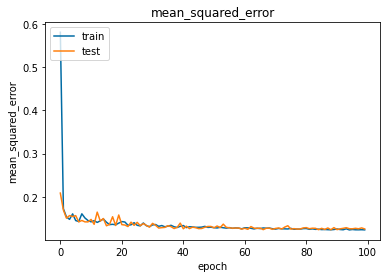

5327/5327 [==============================] - 0s 36us/sample - loss: 0.1259 - mean_squared_error: 0.1259
MSE: 0.1259067803621292
Mean squared error: 0.12590676
Coefficient of determination: 0.8794


In [66]:
#Neural net:

X_train, X_test, y_train, y_test = train_test_split(
    features_std, bigdata11[0], test_size=0.3, random_state=0)



# 1 layer network:

# construct the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(40, input_dim=52, activation='relu'),
    tf.keras.layers.Dense(1)
])
print(model.summary())

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.MeanSquaredError()])
print("Start training")
# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# evaluate the model
mse = model.evaluate(X_test, y_test)[1]
print(f'MSE: {mse}')
y_pred=model.predict(X_test)
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(y_test, y_pred))


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 40)                2120      
_________________________________________________________________
dense_23 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 41        
Total params: 3,801
Trainable params: 3,801
Non-trainable params: 0
_________________________________________________________________
None
Start training
Train on 12428 samples, validate on 5327 samples
Epoch 1/100
12428/12428 [==============================] - 2s 190us/sample - loss: 0.3964 - mean_squared_error: 0.3964 - val_loss: 0.1860 - val_mean_squared_error: 0.1860
Epoch 2/100
12428/12428 [==============================] - 1s 96us/sample - loss: 0.1629 - mean_squared_error: 0.1629 - val_loss: 0.1545 - val

12428/12428 [==============================] - 1s 83us/sample - loss: 0.1230 - mean_squared_error: 0.1230 - val_loss: 0.1360 - val_mean_squared_error: 0.1360
Epoch 45/100
12428/12428 [==============================] - 1s 85us/sample - loss: 0.1213 - mean_squared_error: 0.1213 - val_loss: 0.1383 - val_mean_squared_error: 0.1383
Epoch 46/100
12428/12428 [==============================] - 1s 83us/sample - loss: 0.1204 - mean_squared_error: 0.1204 - val_loss: 0.1315 - val_mean_squared_error: 0.1315
Epoch 47/100
12428/12428 [==============================] - 1s 107us/sample - loss: 0.1198 - mean_squared_error: 0.1198 - val_loss: 0.1366 - val_mean_squared_error: 0.1366
Epoch 48/100
12428/12428 [==============================] - 1s 97us/sample - loss: 0.1222 - mean_squared_error: 0.1222 - val_loss: 0.1386 - val_mean_squared_error: 0.1386
Epoch 49/100
12428/12428 [==============================] - 1s 85us/sample - loss: 0.1197 - mean_squared_error: 0.1197 - val_loss: 0.1333 - val_mean_squared_

Epoch 92/100
12428/12428 [==============================] - 1s 91us/sample - loss: 0.1143 - mean_squared_error: 0.1143 - val_loss: 0.1375 - val_mean_squared_error: 0.1375
Epoch 93/100
12428/12428 [==============================] - 1s 90us/sample - loss: 0.1137 - mean_squared_error: 0.1137 - val_loss: 0.1364 - val_mean_squared_error: 0.1364
Epoch 94/100
12428/12428 [==============================] - 1s 99us/sample - loss: 0.1151 - mean_squared_error: 0.1151 - val_loss: 0.1363 - val_mean_squared_error: 0.1363
Epoch 95/100
12428/12428 [==============================] - 1s 104us/sample - loss: 0.1150 - mean_squared_error: 0.1150 - val_loss: 0.1364 - val_mean_squared_error: 0.1364
Epoch 96/100
12428/12428 [==============================] - 1s 89us/sample - loss: 0.1135 - mean_squared_error: 0.1135 - val_loss: 0.1359 - val_mean_squared_error: 0.1359
Epoch 97/100
12428/12428 [==============================] - 1s 90us/sample - loss: 0.1138 - mean_squared_error: 0.1138 - val_loss: 0.1361 - val_

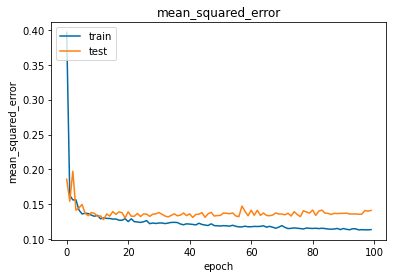

5327/5327 [==============================] - 0s 38us/sample - loss: 0.1414 - mean_squared_error: 0.1414
MSE: 0.14141230285167694
Mean squared error: 0.14141230
Coefficient of determination: 0.8646


In [153]:
#Neural net:

X_train, X_test, y_train, y_test = train_test_split(
    features_std, bigdata11[0], test_size=0.3, random_state=0)



# 1 layer network:

# construct the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(40, input_dim=52, activation='relu'),
    tf.keras.layers.Dense(40, input_dim=52, activation='relu'),
    tf.keras.layers.Dense(1)
])
print(model.summary())

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.MeanSquaredError()])
print("Start training")
# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# evaluate the model
mse = model.evaluate(X_test, y_test)[1]
print(f'MSE: {mse}')
y_pred=model.predict(X_test)
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(y_test, y_pred))


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 60)                3180      
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 61        
Total params: 3,241
Trainable params: 3,241
Non-trainable params: 0
_________________________________________________________________
None
Start training
Train on 12428 samples, validate on 5327 samples
Epoch 1/100
12428/12428 [==============================] - 2s 155us/sample - loss: 0.5233 - mean_squared_error: 0.5233 - val_loss: 0.1918 - val_mean_squared_error: 0.1918
Epoch 2/100
12428/12428 [==============================] - 1s 88us/sample - loss: 0.1610 - mean_squared_error: 0.1610 - val_loss: 0.1551 - val_mean_squared_error: 0.1551
Epoch 3/100
12428/12428 [==============================] - 1s 88us/sample - loss: 0.1529 - mean_squared

Epoch 45/100
12428/12428 [==============================] - 1s 87us/sample - loss: 0.1287 - mean_squared_error: 0.1287 - val_loss: 0.1322 - val_mean_squared_error: 0.1322
Epoch 46/100
12428/12428 [==============================] - 1s 86us/sample - loss: 0.1287 - mean_squared_error: 0.1287 - val_loss: 0.1322 - val_mean_squared_error: 0.1322
Epoch 47/100
12428/12428 [==============================] - 1s 88us/sample - loss: 0.1295 - mean_squared_error: 0.1295 - val_loss: 0.1319 - val_mean_squared_error: 0.1319
Epoch 48/100
12428/12428 [==============================] - 1s 87us/sample - loss: 0.1279 - mean_squared_error: 0.1279 - val_loss: 0.1338 - val_mean_squared_error: 0.1338
Epoch 49/100
12428/12428 [==============================] - 1s 85us/sample - loss: 0.1293 - mean_squared_error: 0.1293 - val_loss: 0.1381 - val_mean_squared_error: 0.1381
Epoch 50/100
12428/12428 [==============================] - 1s 101us/sample - loss: 0.1281 - mean_squared_error: 0.1281 - val_loss: 0.1324 - val_

Epoch 93/100
12428/12428 [==============================] - 1s 98us/sample - loss: 0.1241 - mean_squared_error: 0.1241 - val_loss: 0.1355 - val_mean_squared_error: 0.1355
Epoch 94/100
12428/12428 [==============================] - 1s 69us/sample - loss: 0.1247 - mean_squared_error: 0.1247 - val_loss: 0.1284 - val_mean_squared_error: 0.1284
Epoch 95/100
12428/12428 [==============================] - 1s 84us/sample - loss: 0.1245 - mean_squared_error: 0.1245 - val_loss: 0.1297 - val_mean_squared_error: 0.1297
Epoch 96/100
12428/12428 [==============================] - 1s 73us/sample - loss: 0.1238 - mean_squared_error: 0.1238 - val_loss: 0.1331 - val_mean_squared_error: 0.1331
Epoch 97/100
12428/12428 [==============================] - 1s 72us/sample - loss: 0.1245 - mean_squared_error: 0.1245 - val_loss: 0.1313 - val_mean_squared_error: 0.1313
Epoch 98/100
12428/12428 [==============================] - 1s 76us/sample - loss: 0.1238 - mean_squared_error: 0.1238 - val_loss: 0.1309 - val_m

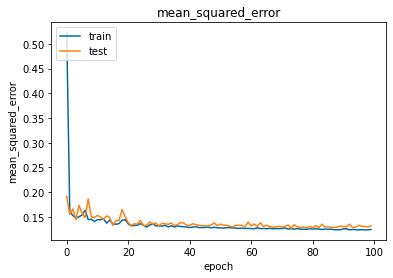

5327/5327 [==============================] - 0s 34us/sample - loss: 0.1321 - mean_squared_error: 0.1321
MSE: 0.13206741213798523
Mean squared error: 0.13206745
Coefficient of determination: 0.8735


In [154]:
#Neural net:

X_train, X_test, y_train, y_test = train_test_split(
    features_std, bigdata11[0], test_size=0.3, random_state=0)



# 1 layer network:

# construct the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(60, input_dim=52, activation='relu'),
    tf.keras.layers.Dense(1)
])
print(model.summary())

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.MeanSquaredError()])
print("Start training")
# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# evaluate the model
mse = model.evaluate(X_test, y_test)[1]
print(f'MSE: {mse}')
y_pred=model.predict(X_test)
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(y_test, y_pred))


In [168]:
from keras.layers.core import Activation
from keras.models import Sequential
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects
from keras.backend import sigmoid 
from keras.layers import Dense


def swish(x):
    return K.sigmoid(x) * x

get_custom_objects().update({'swish': Activation(swish)})


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                2120      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 41        
Total params: 2,161
Trainable params: 2,161
Non-trainable params: 0
_________________________________________________________________
None
Start training
Train on 12428 samples, validate on 5327 samples
Epoch 1/100
12428/12428 [==============================] - 1s 87us/step - loss: 0.5190 - mean_squared_error: 0.8801 - val_loss: 0.2023 - val_mean_squared_error: 0.4649
Epoch 2/100
12428/12428 [==============================] - 1s 106us/step - loss: 0.1665 - mean_squared_error: 0.3623 - val_loss: 0.1524 - val_mean_squared_error: 0.3047
Epoch 3/100
12428/12428 [==============================] - 1s 85us/step - loss: 0.1459 - mean_squared_error:

12428/12428 [==============================] - 1s 72us/step - loss: 0.1279 - mean_squared_error: 0.1406 - val_loss: 0.1268 - val_mean_squared_error: 0.1405
Epoch 46/100
12428/12428 [==============================] - 1s 71us/step - loss: 0.1286 - mean_squared_error: 0.1403 - val_loss: 0.1325 - val_mean_squared_error: 0.1402
Epoch 47/100
12428/12428 [==============================] - 1s 74us/step - loss: 0.1283 - mean_squared_error: 0.1402 - val_loss: 0.1307 - val_mean_squared_error: 0.1400
Epoch 48/100
12428/12428 [==============================] - 1s 73us/step - loss: 0.1283 - mean_squared_error: 0.1399 - val_loss: 0.1298 - val_mean_squared_error: 0.1398
Epoch 49/100
12428/12428 [==============================] - 1s 71us/step - loss: 0.1286 - mean_squared_error: 0.1397 - val_loss: 0.1275 - val_mean_squared_error: 0.1395
Epoch 50/100
12428/12428 [==============================] - 1s 72us/step - loss: 0.1276 - mean_squared_error: 0.1394 - val_loss: 0.1307 - val_mean_squared_error: 0.1393

12428/12428 [==============================] - 1s 70us/step - loss: 0.1250 - mean_squared_error: 0.1334 - val_loss: 0.1277 - val_mean_squared_error: 0.1334
Epoch 94/100
12428/12428 [==============================] - 1s 66us/step - loss: 0.1256 - mean_squared_error: 0.1334 - val_loss: 0.1255 - val_mean_squared_error: 0.1333
Epoch 95/100
12428/12428 [==============================] - 1s 66us/step - loss: 0.1249 - mean_squared_error: 0.1333 - val_loss: 0.1246 - val_mean_squared_error: 0.1332
Epoch 96/100
12428/12428 [==============================] - 1s 69us/step - loss: 0.1253 - mean_squared_error: 0.1332 - val_loss: 0.1268 - val_mean_squared_error: 0.1331
Epoch 97/100
12428/12428 [==============================] - 1s 66us/step - loss: 0.1253 - mean_squared_error: 0.1331 - val_loss: 0.1263 - val_mean_squared_error: 0.1330
Epoch 98/100
12428/12428 [==============================] - 1s 67us/step - loss: 0.1248 - mean_squared_error: 0.1330 - val_loss: 0.1272 - val_mean_squared_error: 0.1330

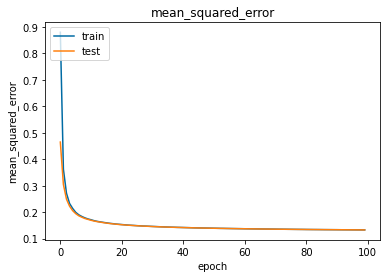

5327/5327 [==============================] - 0s 35us/step
MSE: 0.1327996402978897
Mean squared error: 0.12717096
Coefficient of determination: 0.8782


In [169]:
#Neural net:

X_train, X_test, y_train, y_test = train_test_split(
    features_std, bigdata11[0], test_size=0.3, random_state=0)



# 1 layer network:

model = Sequential()

model.add(Dense(40, input_dim=52, activation='swish'))
model.add(Dense(1))

print(model.summary())

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.MeanSquaredError()])
print("Start training")
# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# evaluate the model
mse = model.evaluate(X_test, y_test)[1]
print(f'MSE: {mse}')
y_pred=model.predict(X_test)
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(y_test, y_pred))


So for 1 in, 1 out:     tf.keras.layers.Dense(40, input_dim=52, activation='relu') performed the best with 87.94%

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 40)                2120      
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 41        
Total params: 2,161
Trainable params: 2,161
Non-trainable params: 0
_________________________________________________________________
None
Start training
Train on 12428 samples, validate on 5327 samples
Epoch 1/100
12428/12428 [==============================] - 1s 64us/sample - loss: 1.2136 - mean_squared_error: 1.2136 - val_loss: 0.7494 - val_mean_squared_error: 0.7494
Epoch 2/100
12428/12428 [==============================] - 0s 12us/sample - loss: 0.5072 - mean_squared_error: 0.5072 - val_loss: 0.4023 - val_mean_squared_error: 0.4023
Epoch 3/100
12428/12428 [==============================] - 0s 13us/sample - loss: 0.2777 - mean_squared_

Epoch 45/100
12428/12428 [==============================] - 0s 13us/sample - loss: 0.1271 - mean_squared_error: 0.1271 - val_loss: 0.1520 - val_mean_squared_error: 0.1520
Epoch 46/100
12428/12428 [==============================] - 0s 13us/sample - loss: 0.1265 - mean_squared_error: 0.1265 - val_loss: 0.1489 - val_mean_squared_error: 0.1489
Epoch 47/100
12428/12428 [==============================] - 0s 11us/sample - loss: 0.1263 - mean_squared_error: 0.1263 - val_loss: 0.1492 - val_mean_squared_error: 0.1492
Epoch 48/100
12428/12428 [==============================] - 0s 13us/sample - loss: 0.1277 - mean_squared_error: 0.1277 - val_loss: 0.1476 - val_mean_squared_error: 0.1476
Epoch 49/100
12428/12428 [==============================] - 0s 13us/sample - loss: 0.1272 - mean_squared_error: 0.1272 - val_loss: 0.1476 - val_mean_squared_error: 0.1476
Epoch 50/100
12428/12428 [==============================] - 0s 12us/sample - loss: 0.1266 - mean_squared_error: 0.1266 - val_loss: 0.1479 - val_m

12428/12428 [==============================] - 0s 9us/sample - loss: 0.1248 - mean_squared_error: 0.1248 - val_loss: 0.1485 - val_mean_squared_error: 0.1485
Epoch 93/100
12428/12428 [==============================] - 0s 9us/sample - loss: 0.1250 - mean_squared_error: 0.1250 - val_loss: 0.1544 - val_mean_squared_error: 0.1544
Epoch 94/100
12428/12428 [==============================] - 0s 10us/sample - loss: 0.1265 - mean_squared_error: 0.1265 - val_loss: 0.1494 - val_mean_squared_error: 0.1494
Epoch 95/100
12428/12428 [==============================] - 0s 10us/sample - loss: 0.1254 - mean_squared_error: 0.1254 - val_loss: 0.1491 - val_mean_squared_error: 0.1491
Epoch 96/100
12428/12428 [==============================] - 0s 10us/sample - loss: 0.1243 - mean_squared_error: 0.1243 - val_loss: 0.1508 - val_mean_squared_error: 0.1508
Epoch 97/100
12428/12428 [==============================] - 0s 9us/sample - loss: 0.1245 - mean_squared_error: 0.1245 - val_loss: 0.1481 - val_mean_squared_erro

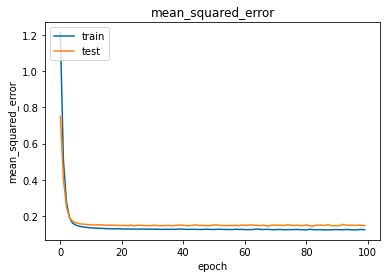

5327/5327 [==============================] - 0s 31us/sample - loss: 0.1473 - mean_squared_error: 0.1473
MSE: 0.14727364480495453
Mean squared error: 0.14727366
Coefficient of determination: 0.8590


In [155]:
#incresing batch size on this earier net:

#Neural net:

X_train, X_test, y_train, y_test = train_test_split(
    features_std, bigdata11[0], test_size=0.3, random_state=0)



# 1 layer network:

# construct the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(40, input_dim=52, activation='relu'),
    tf.keras.layers.Dense(1)
])
print(model.summary())

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.MeanSquaredError()])
print("Start training")
# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    batch_size = 300, epochs=100)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# evaluate the model
mse = model.evaluate(X_test, y_test)[1]
print(f'MSE: {mse}')
y_pred=model.predict(X_test)
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(y_test, y_pred))


Now we investigate 2 input months, and 1 output month case:

In [159]:
features_std2 = np.column_stack(((bigdata21[1], bigdata21[3],bigdata21[4],
                                 bigdata21[5],bigdata21[6], bigdata21[7])))

In [72]:
#ordinary linear regression:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   features_std2 , bigdata21[0], test_size=0.3, random_state=0)

linreg = LinearRegression()
linreg.fit(X_train,y_train)
#print(linreg.predict(x[:10]))

y_pred = linreg.predict(X_test)
#err = np.abs(p - y_test_norm)


#The coefficients
print('Coefficients: \n', linreg.coef_)
print('Intercept: {}'.format(linreg.intercept_))
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))

print('RMSE: %.8f'
      % np.sqrt(mean_squared_error(y_test, y_pred)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.3f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [[-1.73429346e-01  1.06514112e+00 -3.25110734e-01  3.31352804e-01
   2.18859805e-01  1.19334988e-01 -1.93223414e-01 -2.06600919e-02
   1.83459476e-01 -1.51342821e-03 -3.64587726e-01  3.74286115e-02
   1.37898377e-04 -5.30113285e-03 -9.12101065e-03 -2.90926186e-03
  -8.44902722e-03  1.24491697e-03  8.68226673e-03  7.44184033e-03
   3.98920991e-03 -4.84843813e-03 -8.12712688e-03 -8.07773998e-03
   3.14552761e-03 -9.08761969e-03 -1.30951945e-03  4.09830334e-03
  -1.89540903e-03  4.35280447e-03  5.69757558e-04  8.19319704e-03
   3.73362278e-03  2.04213653e-02  3.54225981e-02  2.40568200e-02
   1.30110268e-03 -1.84240438e-02 -4.00686179e-02 -4.14987264e-03
   4.43112721e-03  4.60109147e-02  2.08978118e-01 -8.47193884e-02
  -6.17894607e-02 -1.81478820e-01 -1.93407835e-02 -5.65353582e-02
   2.44942376e-03 -2.20195913e-03  5.43798460e-03 -1.47414722e-04
  -3.09576157e-03 -1.04334556e-02 -9.94097398e-03 -1.97916919e-03]]
Intercept: [-0.00301254]
Mean squared error: 0.14913161
RM

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 40)                2280      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 41        
Total params: 2,321
Trainable params: 2,321
Non-trainable params: 0
_________________________________________________________________
None
Start training
Train on 10291 samples, validate on 4411 samples
Epoch 1/100
10291/10291 [==============================] - 2s 192us/sample - loss: 0.4534 - mean_squared_error: 0.4534 - val_loss: 0.2472 - val_mean_squared_error: 0.2472
Epoch 2/100
10291/10291 [==============================] - 1s 81us/sample - loss: 0.1787 - mean_squared_error: 0.1787 - val_loss: 0.1940 - val_mean_squared_error: 0.1940
Epoch 3/100
10291/10291 [==============================] - 1s 85us/sample - loss: 0.1518 - mean_squared_

Epoch 45/100
10291/10291 [==============================] - 1s 86us/sample - loss: 0.1181 - mean_squared_error: 0.1181 - val_loss: 0.1588 - val_mean_squared_error: 0.1588
Epoch 46/100
10291/10291 [==============================] - 1s 89us/sample - loss: 0.1213 - mean_squared_error: 0.1213 - val_loss: 0.1580 - val_mean_squared_error: 0.1580
Epoch 47/100
10291/10291 [==============================] - 1s 81us/sample - loss: 0.1218 - mean_squared_error: 0.1218 - val_loss: 0.1495 - val_mean_squared_error: 0.1495
Epoch 48/100
10291/10291 [==============================] - 1s 89us/sample - loss: 0.1192 - mean_squared_error: 0.1192 - val_loss: 0.1498 - val_mean_squared_error: 0.1498
Epoch 49/100
10291/10291 [==============================] - 1s 87us/sample - loss: 0.1191 - mean_squared_error: 0.1191 - val_loss: 0.1479 - val_mean_squared_error: 0.1479
Epoch 50/100
10291/10291 [==============================] - 1s 88us/sample - loss: 0.1183 - mean_squared_error: 0.1183 - val_loss: 0.1502 - val_m

Epoch 93/100
10291/10291 [==============================] - 1s 81us/sample - loss: 0.1144 - mean_squared_error: 0.1144 - val_loss: 0.1567 - val_mean_squared_error: 0.1567
Epoch 94/100
10291/10291 [==============================] - 1s 77us/sample - loss: 0.1143 - mean_squared_error: 0.1143 - val_loss: 0.1517 - val_mean_squared_error: 0.1517
Epoch 95/100
10291/10291 [==============================] - 1s 81us/sample - loss: 0.1143 - mean_squared_error: 0.1143 - val_loss: 0.1565 - val_mean_squared_error: 0.1565
Epoch 96/100
10291/10291 [==============================] - 1s 77us/sample - loss: 0.1144 - mean_squared_error: 0.1144 - val_loss: 0.1533 - val_mean_squared_error: 0.1533
Epoch 97/100
10291/10291 [==============================] - 1s 79us/sample - loss: 0.1139 - mean_squared_error: 0.1139 - val_loss: 0.1561 - val_mean_squared_error: 0.1561
Epoch 98/100
10291/10291 [==============================] - 1s 80us/sample - loss: 0.1145 - mean_squared_error: 0.1145 - val_loss: 0.1541 - val_m

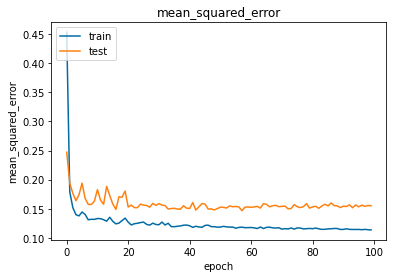

4411/4411 [==============================] - 0s 37us/sample - loss: 0.1551 - mean_squared_error: 0.1551
MSE: 0.15506914258003235
Mean squared error: 0.15506914
Coefficient of determination: 0.8547


In [74]:
#Neural net:


X_train, X_test, y_train, y_test = train_test_split(
    features_std2, bigdata21[0], test_size=0.3, random_state=0)



# 1 layer network:

# construct the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(40, input_dim=56, activation='relu'),
    tf.keras.layers.Dense(1)
])
print(model.summary())

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.MeanSquaredError()])
print("Start training")
# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# evaluate the model
mse = model.evaluate(X_test, y_test)[1]
print(f'MSE: {mse}')
y_pred=model.predict(X_test)
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(y_test, y_pred))


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 30)                1710      
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 31        
Total params: 1,741
Trainable params: 1,741
Non-trainable params: 0
_________________________________________________________________
None
Start training
Train on 10291 samples, validate on 4411 samples
Epoch 1/100
10291/10291 [==============================] - 2s 170us/sample - loss: 0.5275 - mean_squared_error: 0.5275 - val_loss: 0.2755 - val_mean_squared_error: 0.2755
Epoch 2/100
10291/10291 [==============================] - 1s 100us/sample - loss: 0.1912 - mean_squared_error: 0.1912 - val_loss: 0.2102 - val_mean_squared_error: 0.2102
Epoch 3/100
10291/10291 [==============================] - 1s 87us/sample - loss: 0.1572 - mean_square

Epoch 45/100
10291/10291 [==============================] - 1s 82us/sample - loss: 0.1224 - mean_squared_error: 0.1224 - val_loss: 0.1583 - val_mean_squared_error: 0.1583
Epoch 46/100
10291/10291 [==============================] - 1s 84us/sample - loss: 0.1212 - mean_squared_error: 0.1212 - val_loss: 0.1587 - val_mean_squared_error: 0.1587
Epoch 47/100
10291/10291 [==============================] - 1s 86us/sample - loss: 0.1217 - mean_squared_error: 0.1217 - val_loss: 0.1586 - val_mean_squared_error: 0.1586
Epoch 48/100
10291/10291 [==============================] - 1s 87us/sample - loss: 0.1205 - mean_squared_error: 0.1205 - val_loss: 0.1623 - val_mean_squared_error: 0.1623
Epoch 49/100
10291/10291 [==============================] - 1s 85us/sample - loss: 0.1235 - mean_squared_error: 0.1235 - val_loss: 0.1578 - val_mean_squared_error: 0.1578
Epoch 50/100
10291/10291 [==============================] - 1s 83us/sample - loss: 0.1216 - mean_squared_error: 0.1216 - val_loss: 0.1584 - val_m

Epoch 93/100
10291/10291 [==============================] - 1s 85us/sample - loss: 0.1166 - mean_squared_error: 0.1166 - val_loss: 0.1574 - val_mean_squared_error: 0.1574
Epoch 94/100
10291/10291 [==============================] - 1s 83us/sample - loss: 0.1169 - mean_squared_error: 0.1169 - val_loss: 0.1549 - val_mean_squared_error: 0.1549
Epoch 95/100
10291/10291 [==============================] - 1s 83us/sample - loss: 0.1172 - mean_squared_error: 0.1172 - val_loss: 0.1606 - val_mean_squared_error: 0.1606
Epoch 96/100
10291/10291 [==============================] - 1s 85us/sample - loss: 0.1164 - mean_squared_error: 0.1164 - val_loss: 0.1550 - val_mean_squared_error: 0.1550
Epoch 97/100
10291/10291 [==============================] - 1s 83us/sample - loss: 0.1182 - mean_squared_error: 0.1182 - val_loss: 0.1571 - val_mean_squared_error: 0.1571
Epoch 98/100
10291/10291 [==============================] - 1s 92us/sample - loss: 0.1169 - mean_squared_error: 0.1169 - val_loss: 0.1552 - val_m

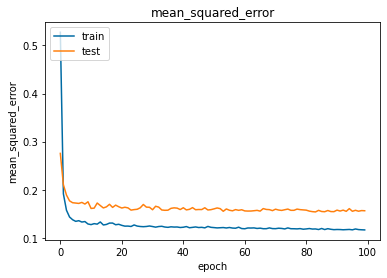

4411/4411 [==============================] - 0s 40us/sample - loss: 0.1561 - mean_squared_error: 0.1561
MSE: 0.1561213731765747
Mean squared error: 0.15612142
Coefficient of determination: 0.8538


In [171]:
#Neural net:


X_train, X_test, y_train, y_test = train_test_split(
    features_std2, bigdata21[0], test_size=0.3, random_state=0)



# 1 layer network:

# construct the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, input_dim=56, activation='relu'),
    tf.keras.layers.Dense(1)
])
print(model.summary())

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.MeanSquaredError()])
print("Start training")
# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# evaluate the model
mse = model.evaluate(X_test, y_test)[1]
print(f'MSE: {mse}')
y_pred=model.predict(X_test)
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(y_test, y_pred))


This is counterintuitive, with more past months data, the model should enhance its performance. Let's try 2 layers.

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 40)                2280      
_________________________________________________________________
dense_34 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 41        
Total params: 3,961
Trainable params: 3,961
Non-trainable params: 0
_________________________________________________________________
None
Start training
Train on 10291 samples, validate on 4411 samples
Epoch 1/100
10291/10291 [==============================] - 2s 163us/sample - loss: 0.3938 - mean_squared_error: 0.3938 - val_loss: 0.2129 - val_mean_squared_error: 0.2129
Epoch 2/100
10291/10291 [==============================] - 1s 95us/sample - loss: 0.1636 - mean_squared_error: 0.1636 - val_loss: 0.1993 - va

10291/10291 [==============================] - 1s 89us/sample - loss: 0.1108 - mean_squared_error: 0.1108 - val_loss: 0.1578 - val_mean_squared_error: 0.1578
Epoch 45/100
10291/10291 [==============================] - 1s 91us/sample - loss: 0.1112 - mean_squared_error: 0.1112 - val_loss: 0.1666 - val_mean_squared_error: 0.1666
Epoch 46/100
10291/10291 [==============================] - 1s 86us/sample - loss: 0.1112 - mean_squared_error: 0.1112 - val_loss: 0.1548 - val_mean_squared_error: 0.1548
Epoch 47/100
10291/10291 [==============================] - 1s 84us/sample - loss: 0.1088 - mean_squared_error: 0.1088 - val_loss: 0.1627 - val_mean_squared_error: 0.1627
Epoch 48/100
10291/10291 [==============================] - 1s 86us/sample - loss: 0.1103 - mean_squared_error: 0.1103 - val_loss: 0.1572 - val_mean_squared_error: 0.1572
Epoch 49/100
10291/10291 [==============================] - 1s 85us/sample - loss: 0.1107 - mean_squared_error: 0.1107 - val_loss: 0.1588 - val_mean_squared_e

Epoch 92/100
10291/10291 [==============================] - 1s 92us/sample - loss: 0.1037 - mean_squared_error: 0.1037 - val_loss: 0.1550 - val_mean_squared_error: 0.1550
Epoch 93/100
10291/10291 [==============================] - 1s 90us/sample - loss: 0.1049 - mean_squared_error: 0.1049 - val_loss: 0.1619 - val_mean_squared_error: 0.1619
Epoch 94/100
10291/10291 [==============================] - 1s 89us/sample - loss: 0.1028 - mean_squared_error: 0.1028 - val_loss: 0.1608 - val_mean_squared_error: 0.1608
Epoch 95/100
10291/10291 [==============================] - 1s 90us/sample - loss: 0.1037 - mean_squared_error: 0.1037 - val_loss: 0.1621 - val_mean_squared_error: 0.1621
Epoch 96/100
10291/10291 [==============================] - 1s 89us/sample - loss: 0.1009 - mean_squared_error: 0.1009 - val_loss: 0.1611 - val_mean_squared_error: 0.1611
Epoch 97/100
10291/10291 [==============================] - 1s 88us/sample - loss: 0.1018 - mean_squared_error: 0.1018 - val_loss: 0.1719 - val_m

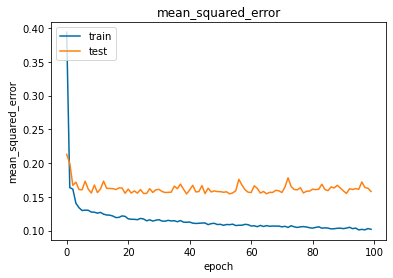

4411/4411 [==============================] - 0s 41us/sample - loss: 0.1579 - mean_squared_error: 0.1579
MSE: 0.15785916149616241
Mean squared error: 0.15785915
Coefficient of determination: 0.8521


In [172]:
#Neural net:


X_train, X_test, y_train, y_test = train_test_split(
    features_std2, bigdata21[0], test_size=0.3, random_state=0)



# 1 layer network:

# construct the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(40, input_dim=56, activation='relu'),
    tf.keras.layers.Dense(40, input_dim=56, activation='relu'),
    tf.keras.layers.Dense(1)
])
print(model.summary())

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.MeanSquaredError()])
print("Start training")
# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# evaluate the model
mse = model.evaluate(X_test, y_test)[1]
print(f'MSE: {mse}')
y_pred=model.predict(X_test)
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(y_test, y_pred))


Still , same problem, maybe it is getting more difficult to train the model with the more available data? It is time to train the principle components.

the percentage of var explained in 1 PC components is  0.14733366746411397
the percentage of var explained in 2 PC components is  0.2665716163037246
the percentage of var explained in 3 PC components is  0.38111801408560503
the percentage of var explained in 4 PC components is  0.4388885092147508
the percentage of var explained in 5 PC components is  0.4872998358966049
the percentage of var explained in 6 PC components is  0.5317748146429799
the percentage of var explained in 7 PC components is  0.5703274742671977
the percentage of var explained in 8 PC components is  0.6068975964420168
the percentage of var explained in 9 PC components is  0.6380373840392615
the percentage of var explained in 10 PC components is  0.6679026093158938
the percentage of var explained in 11 PC components is  0.6952022962024936
the percentage of var explained in 12 PC components is  0.7187411746169324
the percentage of var explained in 13 PC components is  0.7403881081080985
the percentage of var explained 

Text(0.5, 1.0, 'PCA')

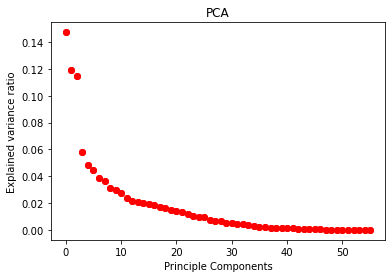

In [173]:
features_standardized=features_std2 #PCA for the (2, 1) data set
pca=PCA(n_components=56)
principle_components=pca.fit_transform(features_standardized)
plt.plot(pca.explained_variance_ratio_,'ro')
var_sum = 0
counter = 0
for i in pca.explained_variance_ratio_:
    counter +=1
    var_sum = var_sum + i
    print("the percentage of var explained in", counter, "PC components is ", var_sum)

plt.plot(pca.explained_variance_ratio_,'ro')
plt.xlabel("Principle Components")
plt.ylabel("Explained variance ratio")
plt.title("PCA")

In [174]:
#Choose 40 components to have 99% of data variability: 

features_standardized=features_std2 #PCA for the (2, 1) data set
pca=PCA(n_components=40)
principle_components_21=pca.fit_transform(features_standardized)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 30)                1230      
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 31        
Total params: 1,261
Trainable params: 1,261
Non-trainable params: 0
_________________________________________________________________
None
Start training
Train on 10291 samples, validate on 4411 samples
Epoch 1/100
10291/10291 [==============================] - 2s 163us/sample - loss: 0.5511 - mean_squared_error: 0.5511 - val_loss: 0.2110 - val_mean_squared_error: 0.2110
Epoch 2/100
10291/10291 [==============================] - 1s 112us/sample - loss: 0.1808 - mean_squared_error: 0.1808 - val_loss: 0.1756 - val_mean_squared_error: 0.1756
Epoch 3/100
10291/10291 [==============================] - 1s 103us/sample - loss: 0.1499 - mean_squar

Epoch 45/100
10291/10291 [==============================] - 1s 95us/sample - loss: 0.1228 - mean_squared_error: 0.1228 - val_loss: 0.1570 - val_mean_squared_error: 0.1570
Epoch 46/100
10291/10291 [==============================] - 1s 93us/sample - loss: 0.1208 - mean_squared_error: 0.1208 - val_loss: 0.1653 - val_mean_squared_error: 0.1653
Epoch 47/100
10291/10291 [==============================] - 1s 90us/sample - loss: 0.1210 - mean_squared_error: 0.1210 - val_loss: 0.1588 - val_mean_squared_error: 0.1588
Epoch 48/100
10291/10291 [==============================] - 1s 92us/sample - loss: 0.1200 - mean_squared_error: 0.1200 - val_loss: 0.1584 - val_mean_squared_error: 0.1584
Epoch 49/100
10291/10291 [==============================] - 1s 89us/sample - loss: 0.1236 - mean_squared_error: 0.1236 - val_loss: 0.1653 - val_mean_squared_error: 0.1653
Epoch 50/100
10291/10291 [==============================] - 1s 90us/sample - loss: 0.1261 - mean_squared_error: 0.1261 - val_loss: 0.1635 - val_m

Epoch 93/100
10291/10291 [==============================] - 1s 103us/sample - loss: 0.1155 - mean_squared_error: 0.1155 - val_loss: 0.1541 - val_mean_squared_error: 0.1541
Epoch 94/100
10291/10291 [==============================] - 1s 96us/sample - loss: 0.1171 - mean_squared_error: 0.1171 - val_loss: 0.1505 - val_mean_squared_error: 0.1505
Epoch 95/100
10291/10291 [==============================] - 1s 86us/sample - loss: 0.1177 - mean_squared_error: 0.1177 - val_loss: 0.1562 - val_mean_squared_error: 0.1562
Epoch 96/100
10291/10291 [==============================] - 1s 83us/sample - loss: 0.1185 - mean_squared_error: 0.1185 - val_loss: 0.1517 - val_mean_squared_error: 0.1517
Epoch 97/100
10291/10291 [==============================] - 1s 82us/sample - loss: 0.1169 - mean_squared_error: 0.1169 - val_loss: 0.1562 - val_mean_squared_error: 0.1562
Epoch 98/100
10291/10291 [==============================] - 1s 84us/sample - loss: 0.1163 - mean_squared_error: 0.1163 - val_loss: 0.1556 - val_

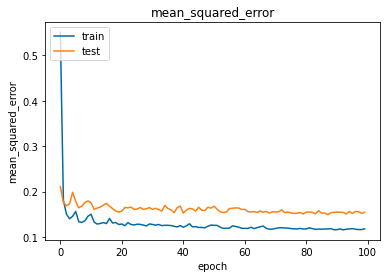

4411/4411 [==============================] - 0s 38us/sample - loss: 0.1545 - mean_squared_error: 0.1545
MSE: 0.1544916331768036
Mean squared error: 0.15449159
Coefficient of determination: 0.8553


In [177]:
#Neural net:


X_train, X_test, y_train, y_test = train_test_split(
    principle_components_21, bigdata21[0], test_size=0.3, random_state=0)



# 1 layer network:

# construct the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, input_dim=40, activation='relu'),
    tf.keras.layers.Dense(1)
])
print(model.summary())

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.MeanSquaredError()])
print("Start training")
# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# evaluate the model
mse = model.evaluate(X_test, y_test)[1]
print(f'MSE: {mse}')
y_pred=model.predict(X_test)
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(y_test, y_pred))


Slight increase in performance, needs more tweaking:

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 41        
Total params: 1,681
Trainable params: 1,681
Non-trainable params: 0
_________________________________________________________________
None
Start training
Train on 10291 samples, validate on 4411 samples
Epoch 1/100
10291/10291 [==============================] - 2s 149us/sample - loss: 0.8058 - mean_squared_error: 0.8058 - val_loss: 0.2665 - val_mean_squared_error: 0.2665
Epoch 2/100
10291/10291 [==============================] - 1s 87us/sample - loss: 0.1640 - mean_squared_error: 0.1640 - val_loss: 0.1873 - val_mean_squared_error: 0.1873
Epoch 3/100
10291/10291 [==============================] - 1s 85us/sample - loss: 0.1392 - mean_squared

Epoch 45/100
10291/10291 [==============================] - 1s 86us/sample - loss: 0.1213 - mean_squared_error: 0.1213 - val_loss: 0.1547 - val_mean_squared_error: 0.1547
Epoch 46/100
10291/10291 [==============================] - 1s 85us/sample - loss: 0.1207 - mean_squared_error: 0.1207 - val_loss: 0.1585 - val_mean_squared_error: 0.1585
Epoch 47/100
10291/10291 [==============================] - 1s 92us/sample - loss: 0.1199 - mean_squared_error: 0.1199 - val_loss: 0.1518 - val_mean_squared_error: 0.1518
Epoch 48/100
10291/10291 [==============================] - 1s 82us/sample - loss: 0.1216 - mean_squared_error: 0.1216 - val_loss: 0.1575 - val_mean_squared_error: 0.1575
Epoch 49/100
10291/10291 [==============================] - 1s 80us/sample - loss: 0.1204 - mean_squared_error: 0.1204 - val_loss: 0.1578 - val_mean_squared_error: 0.1578
Epoch 50/100
10291/10291 [==============================] - 1s 83us/sample - loss: 0.1217 - mean_squared_error: 0.1217 - val_loss: 0.1559 - val_m

Epoch 93/100
10291/10291 [==============================] - 1s 81us/sample - loss: 0.1148 - mean_squared_error: 0.1148 - val_loss: 0.1519 - val_mean_squared_error: 0.1519
Epoch 94/100
10291/10291 [==============================] - 1s 97us/sample - loss: 0.1156 - mean_squared_error: 0.1156 - val_loss: 0.1503 - val_mean_squared_error: 0.1503
Epoch 95/100
10291/10291 [==============================] - 1s 106us/sample - loss: 0.1147 - mean_squared_error: 0.1147 - val_loss: 0.1510 - val_mean_squared_error: 0.1510
Epoch 96/100
10291/10291 [==============================] - 1s 88us/sample - loss: 0.1147 - mean_squared_error: 0.1147 - val_loss: 0.1540 - val_mean_squared_error: 0.1540
Epoch 97/100
10291/10291 [==============================] - 1s 82us/sample - loss: 0.1173 - mean_squared_error: 0.1173 - val_loss: 0.1594 - val_mean_squared_error: 0.1594
Epoch 98/100
10291/10291 [==============================] - 1s 83us/sample - loss: 0.1177 - mean_squared_error: 0.1177 - val_loss: 0.1528 - val_

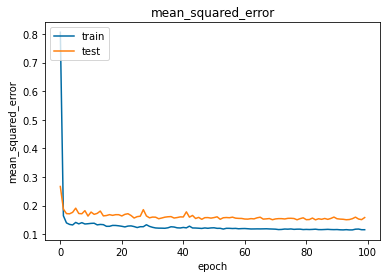

4411/4411 [==============================] - 0s 37us/sample - loss: 0.1579 - mean_squared_error: 0.1579
MSE: 0.15794487297534943
Mean squared error: 0.15794489
Coefficient of determination: 0.8520


In [176]:
#Neural net:


X_train, X_test, y_train, y_test = train_test_split(
    principle_components_21, bigdata21[0], test_size=0.3, random_state=0)



# 1 layer network:

# construct the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(40, input_dim=40, activation='relu'),
    tf.keras.layers.Dense(1)
])
print(model.summary())

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.MeanSquaredError()])
print("Start training")
# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# evaluate the model
mse = model.evaluate(X_test, y_test)[1]
print(f'MSE: {mse}')
y_pred=model.predict(X_test)
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(y_test, y_pred))


Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 30)                1230      
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 31        
Total params: 1,261
Trainable params: 1,261
Non-trainable params: 0
_________________________________________________________________
None
Start training
Train on 10291 samples, validate on 4411 samples
Epoch 1/100
10291/10291 [==============================] - 1s 93us/sample - loss: 0.9036 - mean_squared_error: 0.9036 - val_loss: 0.4106 - val_mean_squared_error: 0.4106
Epoch 2/100
10291/10291 [==============================] - 0s 30us/sample - loss: 0.2966 - mean_squared_error: 0.2966 - val_loss: 0.2455 - val_mean_squared_error: 0.2455
Epoch 3/100
10291/10291 [==============================] - 0s 31us/sample - loss: 0.1968 - mean_squared_

Epoch 45/100
10291/10291 [==============================] - 0s 32us/sample - loss: 0.1248 - mean_squared_error: 0.1248 - val_loss: 0.1698 - val_mean_squared_error: 0.1698
Epoch 46/100
10291/10291 [==============================] - 0s 31us/sample - loss: 0.1215 - mean_squared_error: 0.1215 - val_loss: 0.1641 - val_mean_squared_error: 0.1641
Epoch 47/100
10291/10291 [==============================] - 0s 31us/sample - loss: 0.1201 - mean_squared_error: 0.1201 - val_loss: 0.1646 - val_mean_squared_error: 0.1646
Epoch 48/100
10291/10291 [==============================] - 0s 31us/sample - loss: 0.1250 - mean_squared_error: 0.1250 - val_loss: 0.1572 - val_mean_squared_error: 0.1572
Epoch 49/100
10291/10291 [==============================] - 0s 32us/sample - loss: 0.1234 - mean_squared_error: 0.1234 - val_loss: 0.1620 - val_mean_squared_error: 0.1620
Epoch 50/100
10291/10291 [==============================] - 0s 44us/sample - loss: 0.1191 - mean_squared_error: 0.1191 - val_loss: 0.1648 - val_m

Epoch 93/100
10291/10291 [==============================] - 0s 32us/sample - loss: 0.1179 - mean_squared_error: 0.1179 - val_loss: 0.1564 - val_mean_squared_error: 0.1564
Epoch 94/100
10291/10291 [==============================] - 0s 30us/sample - loss: 0.1179 - mean_squared_error: 0.1179 - val_loss: 0.1597 - val_mean_squared_error: 0.1597
Epoch 95/100
10291/10291 [==============================] - 0s 30us/sample - loss: 0.1184 - mean_squared_error: 0.1184 - val_loss: 0.1600 - val_mean_squared_error: 0.1600
Epoch 96/100
10291/10291 [==============================] - 0s 32us/sample - loss: 0.1199 - mean_squared_error: 0.1199 - val_loss: 0.1570 - val_mean_squared_error: 0.1570
Epoch 97/100
10291/10291 [==============================] - 0s 31us/sample - loss: 0.1187 - mean_squared_error: 0.1187 - val_loss: 0.1626 - val_mean_squared_error: 0.1626
Epoch 98/100
10291/10291 [==============================] - 0s 31us/sample - loss: 0.1213 - mean_squared_error: 0.1213 - val_loss: 0.1610 - val_m

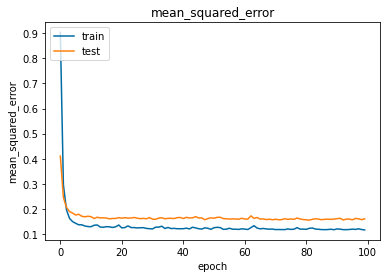

4411/4411 [==============================] - 0s 40us/sample - loss: 0.1609 - mean_squared_error: 0.1609
MSE: 0.16085954010486603
Mean squared error: 0.16085953
Coefficient of determination: 0.8493


In [178]:
#lets increase batch size


#Neural net:


X_train, X_test, y_train, y_test = train_test_split(
    principle_components_21, bigdata21[0], test_size=0.3, random_state=0)



# 1 layer network:

# construct the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, input_dim=40, activation='relu'),
    tf.keras.layers.Dense(1)
])
print(model.summary())

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.MeanSquaredError()])
print("Start training")
# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    batch_size = 100, epochs=100)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# evaluate the model
mse = model.evaluate(X_test, y_test)[1]
print(f'MSE: {mse}')
y_pred=model.predict(X_test)
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(y_test, y_pred))


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 41        
Total params: 1,681
Trainable params: 1,681
Non-trainable params: 0
_________________________________________________________________
None
Start training
Train on 10291 samples, validate on 4411 samples
Epoch 1/200
10291/10291 [==============================] - 1s 83us/sample - loss: 1.1769 - mean_squared_error: 1.1769 - val_loss: 0.5659 - val_mean_squared_error: 0.5659
Epoch 2/200
10291/10291 [==============================] - 0s 16us/sample - loss: 0.3823 - mean_squared_error: 0.3823 - val_loss: 0.2831 - val_mean_squared_error: 0.2831
Epoch 3/200
10291/10291 [==============================] - 0s 17us/sample - loss: 0.2241 - mean_squared_

Epoch 45/200
10291/10291 [==============================] - 0s 18us/sample - loss: 0.1229 - mean_squared_error: 0.1229 - val_loss: 0.1504 - val_mean_squared_error: 0.1504
Epoch 46/200
10291/10291 [==============================] - 0s 19us/sample - loss: 0.1225 - mean_squared_error: 0.1225 - val_loss: 0.1511 - val_mean_squared_error: 0.1511
Epoch 47/200
10291/10291 [==============================] - 0s 17us/sample - loss: 0.1201 - mean_squared_error: 0.1201 - val_loss: 0.1516 - val_mean_squared_error: 0.1516
Epoch 48/200
10291/10291 [==============================] - 0s 18us/sample - loss: 0.1209 - mean_squared_error: 0.1209 - val_loss: 0.1493 - val_mean_squared_error: 0.1493
Epoch 49/200
10291/10291 [==============================] - 0s 16us/sample - loss: 0.1179 - mean_squared_error: 0.1179 - val_loss: 0.1494 - val_mean_squared_error: 0.1494
Epoch 50/200
10291/10291 [==============================] - 0s 17us/sample - loss: 0.1181 - mean_squared_error: 0.1181 - val_loss: 0.1514 - val_m

10291/10291 [==============================] - 0s 17us/sample - loss: 0.1145 - mean_squared_error: 0.1145 - val_loss: 0.1519 - val_mean_squared_error: 0.1519
Epoch 93/200
10291/10291 [==============================] - 0s 18us/sample - loss: 0.1152 - mean_squared_error: 0.1152 - val_loss: 0.1517 - val_mean_squared_error: 0.1517
Epoch 94/200
10291/10291 [==============================] - 0s 17us/sample - loss: 0.1164 - mean_squared_error: 0.1164 - val_loss: 0.1541 - val_mean_squared_error: 0.1541
Epoch 95/200
10291/10291 [==============================] - 0s 17us/sample - loss: 0.1181 - mean_squared_error: 0.1181 - val_loss: 0.1671 - val_mean_squared_error: 0.1671
Epoch 96/200
10291/10291 [==============================] - 0s 17us/sample - loss: 0.1284 - mean_squared_error: 0.1284 - val_loss: 0.1683 - val_mean_squared_error: 0.1683
Epoch 97/200
10291/10291 [==============================] - 0s 17us/sample - loss: 0.1313 - mean_squared_error: 0.1313 - val_loss: 0.1513 - val_mean_squared_e

Epoch 140/200
10291/10291 [==============================] - 0s 19us/sample - loss: 0.1137 - mean_squared_error: 0.1137 - val_loss: 0.1511 - val_mean_squared_error: 0.1511
Epoch 141/200
10291/10291 [==============================] - 0s 19us/sample - loss: 0.1132 - mean_squared_error: 0.1132 - val_loss: 0.1514 - val_mean_squared_error: 0.1514
Epoch 142/200
10291/10291 [==============================] - 0s 17us/sample - loss: 0.1150 - mean_squared_error: 0.1150 - val_loss: 0.1493 - val_mean_squared_error: 0.1493
Epoch 143/200
10291/10291 [==============================] - 0s 18us/sample - loss: 0.1161 - mean_squared_error: 0.1161 - val_loss: 0.1496 - val_mean_squared_error: 0.1496
Epoch 144/200
10291/10291 [==============================] - 0s 18us/sample - loss: 0.1160 - mean_squared_error: 0.1160 - val_loss: 0.1498 - val_mean_squared_error: 0.1498
Epoch 145/200
10291/10291 [==============================] - 0s 18us/sample - loss: 0.1138 - mean_squared_error: 0.1138 - val_loss: 0.1480 -

10291/10291 [==============================] - 0s 18us/sample - loss: 0.1123 - mean_squared_error: 0.1123 - val_loss: 0.1507 - val_mean_squared_error: 0.1507
Epoch 188/200
10291/10291 [==============================] - 0s 18us/sample - loss: 0.1129 - mean_squared_error: 0.1129 - val_loss: 0.1509 - val_mean_squared_error: 0.1509
Epoch 189/200
10291/10291 [==============================] - 0s 17us/sample - loss: 0.1126 - mean_squared_error: 0.1126 - val_loss: 0.1510 - val_mean_squared_error: 0.1510
Epoch 190/200
10291/10291 [==============================] - 0s 19us/sample - loss: 0.1153 - mean_squared_error: 0.1153 - val_loss: 0.1496 - val_mean_squared_error: 0.1496
Epoch 191/200
10291/10291 [==============================] - 0s 18us/sample - loss: 0.1140 - mean_squared_error: 0.1140 - val_loss: 0.1514 - val_mean_squared_error: 0.1514
Epoch 192/200
10291/10291 [==============================] - 0s 18us/sample - loss: 0.1151 - mean_squared_error: 0.1151 - val_loss: 0.1541 - val_mean_squa

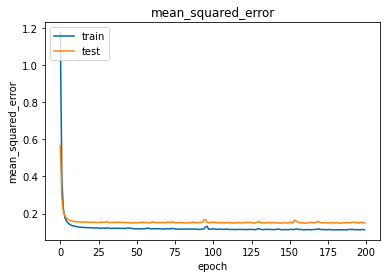

4411/4411 [==============================] - 0s 41us/sample - loss: 0.1485 - mean_squared_error: 0.1485
MSE: 0.1485442817211151
Mean squared error: 0.14854429
Coefficient of determination: 0.8609


In [179]:
#Neural net:


X_train, X_test, y_train, y_test = train_test_split(
    principle_components_21, bigdata21[0], test_size=0.3, random_state=0)



# 1 layer network:

# construct the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(40, input_dim=40, activation='relu'),
    tf.keras.layers.Dense(1)
])
print(model.summary())

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.MeanSquaredError()])
print("Start training")
# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    batch_size = 200, epochs=200)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# evaluate the model
mse = model.evaluate(X_test, y_test)[1]
print(f'MSE: {mse}')
y_pred=model.predict(X_test)
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(y_test, y_pred))


Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 41        
Total params: 1,681
Trainable params: 1,681
Non-trainable params: 0
_________________________________________________________________
None
Start training
Train on 10291 samples, validate on 4411 samples
Epoch 1/400
10291/10291 [==============================] - 1s 78us/sample - loss: 1.7868 - mean_squared_error: 1.7868 - val_loss: 1.1605 - val_mean_squared_error: 1.1605
Epoch 2/400
10291/10291 [==============================] - 0s 13us/sample - loss: 0.6954 - mean_squared_error: 0.6954 - val_loss: 0.5270 - val_mean_squared_error: 0.5270
Epoch 3/400
10291/10291 [==============================] - 0s 11us/sample - loss: 0.3379 - mean_squared_

Epoch 45/400
10291/10291 [==============================] - 0s 11us/sample - loss: 0.1196 - mean_squared_error: 0.1196 - val_loss: 0.1510 - val_mean_squared_error: 0.1510
Epoch 46/400
10291/10291 [==============================] - 0s 11us/sample - loss: 0.1201 - mean_squared_error: 0.1201 - val_loss: 0.1514 - val_mean_squared_error: 0.1514
Epoch 47/400
10291/10291 [==============================] - 0s 13us/sample - loss: 0.1200 - mean_squared_error: 0.1200 - val_loss: 0.1515 - val_mean_squared_error: 0.1515
Epoch 48/400
10291/10291 [==============================] - 0s 12us/sample - loss: 0.1189 - mean_squared_error: 0.1189 - val_loss: 0.1516 - val_mean_squared_error: 0.1516
Epoch 49/400
10291/10291 [==============================] - 0s 13us/sample - loss: 0.1204 - mean_squared_error: 0.1204 - val_loss: 0.1538 - val_mean_squared_error: 0.1538
Epoch 50/400
10291/10291 [==============================] - 0s 20us/sample - loss: 0.1223 - mean_squared_error: 0.1223 - val_loss: 0.1525 - val_m

Epoch 93/400
10291/10291 [==============================] - 0s 15us/sample - loss: 0.1164 - mean_squared_error: 0.1164 - val_loss: 0.1510 - val_mean_squared_error: 0.1510
Epoch 94/400
10291/10291 [==============================] - 0s 15us/sample - loss: 0.1172 - mean_squared_error: 0.1172 - val_loss: 0.1519 - val_mean_squared_error: 0.1519
Epoch 95/400
10291/10291 [==============================] - 0s 16us/sample - loss: 0.1187 - mean_squared_error: 0.1187 - val_loss: 0.1489 - val_mean_squared_error: 0.1489
Epoch 96/400
10291/10291 [==============================] - 0s 13us/sample - loss: 0.1158 - mean_squared_error: 0.1158 - val_loss: 0.1495 - val_mean_squared_error: 0.1495
Epoch 97/400
10291/10291 [==============================] - 0s 13us/sample - loss: 0.1155 - mean_squared_error: 0.1155 - val_loss: 0.1485 - val_mean_squared_error: 0.1485
Epoch 98/400
10291/10291 [==============================] - 0s 14us/sample - loss: 0.1155 - mean_squared_error: 0.1155 - val_loss: 0.1501 - val_m

Epoch 141/400
10291/10291 [==============================] - 0s 13us/sample - loss: 0.1143 - mean_squared_error: 0.1143 - val_loss: 0.1494 - val_mean_squared_error: 0.1494
Epoch 142/400
10291/10291 [==============================] - 0s 12us/sample - loss: 0.1143 - mean_squared_error: 0.1143 - val_loss: 0.1493 - val_mean_squared_error: 0.1493
Epoch 143/400
10291/10291 [==============================] - 0s 12us/sample - loss: 0.1136 - mean_squared_error: 0.1136 - val_loss: 0.1506 - val_mean_squared_error: 0.1506
Epoch 144/400
10291/10291 [==============================] - 0s 14us/sample - loss: 0.1148 - mean_squared_error: 0.1148 - val_loss: 0.1518 - val_mean_squared_error: 0.1518
Epoch 145/400
10291/10291 [==============================] - 0s 13us/sample - loss: 0.1157 - mean_squared_error: 0.1157 - val_loss: 0.1492 - val_mean_squared_error: 0.1492
Epoch 146/400
10291/10291 [==============================] - 0s 12us/sample - loss: 0.1145 - mean_squared_error: 0.1145 - val_loss: 0.1490 -

10291/10291 [==============================] - 0s 13us/sample - loss: 0.1131 - mean_squared_error: 0.1131 - val_loss: 0.1499 - val_mean_squared_error: 0.1499
Epoch 189/400
10291/10291 [==============================] - 0s 13us/sample - loss: 0.1123 - mean_squared_error: 0.1123 - val_loss: 0.1492 - val_mean_squared_error: 0.1492
Epoch 190/400
10291/10291 [==============================] - 0s 13us/sample - loss: 0.1127 - mean_squared_error: 0.1127 - val_loss: 0.1498 - val_mean_squared_error: 0.1498
Epoch 191/400
10291/10291 [==============================] - 0s 12us/sample - loss: 0.1132 - mean_squared_error: 0.1132 - val_loss: 0.1481 - val_mean_squared_error: 0.1481
Epoch 192/400
10291/10291 [==============================] - 0s 13us/sample - loss: 0.1120 - mean_squared_error: 0.1120 - val_loss: 0.1503 - val_mean_squared_error: 0.1503
Epoch 193/400
10291/10291 [==============================] - 0s 13us/sample - loss: 0.1124 - mean_squared_error: 0.1124 - val_loss: 0.1487 - val_mean_squa

Epoch 236/400
10291/10291 [==============================] - 0s 12us/sample - loss: 0.1138 - mean_squared_error: 0.1138 - val_loss: 0.1532 - val_mean_squared_error: 0.1532
Epoch 237/400
10291/10291 [==============================] - 0s 13us/sample - loss: 0.1130 - mean_squared_error: 0.1130 - val_loss: 0.1513 - val_mean_squared_error: 0.1513
Epoch 238/400
10291/10291 [==============================] - 0s 12us/sample - loss: 0.1125 - mean_squared_error: 0.1125 - val_loss: 0.1513 - val_mean_squared_error: 0.1513
Epoch 239/400
10291/10291 [==============================] - 0s 12us/sample - loss: 0.1114 - mean_squared_error: 0.1114 - val_loss: 0.1509 - val_mean_squared_error: 0.1509
Epoch 240/400
10291/10291 [==============================] - 0s 13us/sample - loss: 0.1122 - mean_squared_error: 0.1122 - val_loss: 0.1508 - val_mean_squared_error: 0.1508
Epoch 241/400
10291/10291 [==============================] - 0s 13us/sample - loss: 0.1118 - mean_squared_error: 0.1118 - val_loss: 0.1527 -

10291/10291 [==============================] - 0s 24us/sample - loss: 0.1108 - mean_squared_error: 0.1108 - val_loss: 0.1508 - val_mean_squared_error: 0.1508
Epoch 284/400
10291/10291 [==============================] - 0s 15us/sample - loss: 0.1108 - mean_squared_error: 0.1108 - val_loss: 0.1495 - val_mean_squared_error: 0.1495
Epoch 285/400
10291/10291 [==============================] - 0s 13us/sample - loss: 0.1106 - mean_squared_error: 0.1106 - val_loss: 0.1493 - val_mean_squared_error: 0.1493
Epoch 286/400
10291/10291 [==============================] - 0s 13us/sample - loss: 0.1105 - mean_squared_error: 0.1105 - val_loss: 0.1505 - val_mean_squared_error: 0.1505
Epoch 287/400
10291/10291 [==============================] - 0s 13us/sample - loss: 0.1107 - mean_squared_error: 0.1107 - val_loss: 0.1507 - val_mean_squared_error: 0.1507
Epoch 288/400
10291/10291 [==============================] - 0s 14us/sample - loss: 0.1103 - mean_squared_error: 0.1103 - val_loss: 0.1517 - val_mean_squa

Epoch 331/400
10291/10291 [==============================] - 0s 12us/sample - loss: 0.1097 - mean_squared_error: 0.1097 - val_loss: 0.1493 - val_mean_squared_error: 0.1493
Epoch 332/400
10291/10291 [==============================] - 0s 12us/sample - loss: 0.1095 - mean_squared_error: 0.1095 - val_loss: 0.1499 - val_mean_squared_error: 0.1499
Epoch 333/400
10291/10291 [==============================] - 0s 11us/sample - loss: 0.1101 - mean_squared_error: 0.1101 - val_loss: 0.1501 - val_mean_squared_error: 0.1501
Epoch 334/400
10291/10291 [==============================] - 0s 12us/sample - loss: 0.1098 - mean_squared_error: 0.1098 - val_loss: 0.1499 - val_mean_squared_error: 0.1499
Epoch 335/400
10291/10291 [==============================] - 0s 13us/sample - loss: 0.1102 - mean_squared_error: 0.1102 - val_loss: 0.1503 - val_mean_squared_error: 0.1503
Epoch 336/400
10291/10291 [==============================] - 0s 12us/sample - loss: 0.1099 - mean_squared_error: 0.1099 - val_loss: 0.1492 -

10291/10291 [==============================] - 0s 12us/sample - loss: 0.1216 - mean_squared_error: 0.1216 - val_loss: 0.1504 - val_mean_squared_error: 0.1504
Epoch 379/400
10291/10291 [==============================] - 0s 12us/sample - loss: 0.1099 - mean_squared_error: 0.1099 - val_loss: 0.1490 - val_mean_squared_error: 0.1490
Epoch 380/400
10291/10291 [==============================] - 0s 12us/sample - loss: 0.1096 - mean_squared_error: 0.1096 - val_loss: 0.1512 - val_mean_squared_error: 0.1512
Epoch 381/400
10291/10291 [==============================] - 0s 13us/sample - loss: 0.1111 - mean_squared_error: 0.1111 - val_loss: 0.1523 - val_mean_squared_error: 0.1523
Epoch 382/400
10291/10291 [==============================] - 0s 13us/sample - loss: 0.1095 - mean_squared_error: 0.1095 - val_loss: 0.1501 - val_mean_squared_error: 0.1501
Epoch 383/400
10291/10291 [==============================] - 0s 13us/sample - loss: 0.1098 - mean_squared_error: 0.1098 - val_loss: 0.1534 - val_mean_squa

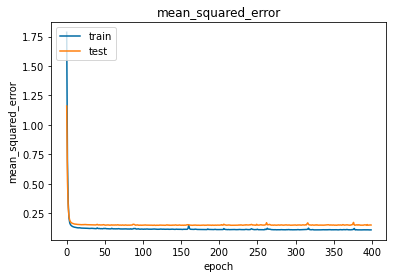

4411/4411 [==============================] - 0s 38us/sample - loss: 0.1505 - mean_squared_error: 0.1505
MSE: 0.15050525963306427
Mean squared error: 0.15050523
Coefficient of determination: 0.8590


In [180]:
#Neural net:


X_train, X_test, y_train, y_test = train_test_split(
    principle_components_21, bigdata21[0], test_size=0.3, random_state=0)



# 1 layer network:

# construct the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(40, input_dim=40, activation='relu'),
    tf.keras.layers.Dense(1)
])
print(model.summary())

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.MeanSquaredError()])
print("Start training")
# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    batch_size = 300, epochs=400)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# evaluate the model
mse = model.evaluate(X_test, y_test)[1]
print(f'MSE: {mse}')
y_pred=model.predict(X_test)
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(y_test, y_pred))


Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 60)                2460      
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 61        
Total params: 2,521
Trainable params: 2,521
Non-trainable params: 0
_________________________________________________________________
None
Start training
Train on 10291 samples, validate on 4411 samples
Epoch 1/200
10291/10291 [==============================] - 1s 80us/sample - loss: 0.6437 - mean_squared_error: 0.6437 - val_loss: 0.3412 - val_mean_squared_error: 0.3412
Epoch 2/200
10291/10291 [==============================] - 0s 18us/sample - loss: 0.2018 - mean_squared_error: 0.2018 - val_loss: 0.2026 - val_mean_squared_error: 0.2026
Epoch 3/200
10291/10291 [==============================] - 0s 18us/sample - loss: 0.1495 - mean_squared_

Epoch 45/200
10291/10291 [==============================] - 0s 20us/sample - loss: 0.1196 - mean_squared_error: 0.1196 - val_loss: 0.1578 - val_mean_squared_error: 0.1578
Epoch 46/200
10291/10291 [==============================] - 0s 19us/sample - loss: 0.1167 - mean_squared_error: 0.1167 - val_loss: 0.1575 - val_mean_squared_error: 0.1575
Epoch 47/200
10291/10291 [==============================] - 0s 16us/sample - loss: 0.1162 - mean_squared_error: 0.1162 - val_loss: 0.1630 - val_mean_squared_error: 0.1630
Epoch 48/200
10291/10291 [==============================] - 0s 17us/sample - loss: 0.1190 - mean_squared_error: 0.1190 - val_loss: 0.1583 - val_mean_squared_error: 0.1583
Epoch 49/200
10291/10291 [==============================] - 0s 22us/sample - loss: 0.1159 - mean_squared_error: 0.1159 - val_loss: 0.1567 - val_mean_squared_error: 0.1567
Epoch 50/200
10291/10291 [==============================] - 0s 22us/sample - loss: 0.1165 - mean_squared_error: 0.1165 - val_loss: 0.1557 - val_m

10291/10291 [==============================] - 0s 14us/sample - loss: 0.1141 - mean_squared_error: 0.1141 - val_loss: 0.1574 - val_mean_squared_error: 0.1574
Epoch 93/200
10291/10291 [==============================] - 0s 13us/sample - loss: 0.1152 - mean_squared_error: 0.1152 - val_loss: 0.1547 - val_mean_squared_error: 0.1547
Epoch 94/200
10291/10291 [==============================] - 0s 14us/sample - loss: 0.1137 - mean_squared_error: 0.1137 - val_loss: 0.1553 - val_mean_squared_error: 0.1553
Epoch 95/200
10291/10291 [==============================] - 0s 13us/sample - loss: 0.1128 - mean_squared_error: 0.1128 - val_loss: 0.1604 - val_mean_squared_error: 0.1604
Epoch 96/200
10291/10291 [==============================] - 0s 13us/sample - loss: 0.1147 - mean_squared_error: 0.1147 - val_loss: 0.1540 - val_mean_squared_error: 0.1540
Epoch 97/200
10291/10291 [==============================] - 0s 14us/sample - loss: 0.1132 - mean_squared_error: 0.1132 - val_loss: 0.1580 - val_mean_squared_e

Epoch 140/200
10291/10291 [==============================] - 0s 14us/sample - loss: 0.1125 - mean_squared_error: 0.1125 - val_loss: 0.1612 - val_mean_squared_error: 0.1612
Epoch 141/200
10291/10291 [==============================] - 0s 15us/sample - loss: 0.1123 - mean_squared_error: 0.1123 - val_loss: 0.1568 - val_mean_squared_error: 0.1568
Epoch 142/200
10291/10291 [==============================] - 0s 15us/sample - loss: 0.1117 - mean_squared_error: 0.1117 - val_loss: 0.1561 - val_mean_squared_error: 0.1561
Epoch 143/200
10291/10291 [==============================] - 0s 19us/sample - loss: 0.1112 - mean_squared_error: 0.1112 - val_loss: 0.1583 - val_mean_squared_error: 0.1583
Epoch 144/200
10291/10291 [==============================] - 0s 16us/sample - loss: 0.1106 - mean_squared_error: 0.1106 - val_loss: 0.1585 - val_mean_squared_error: 0.1585
Epoch 145/200
10291/10291 [==============================] - 0s 28us/sample - loss: 0.1132 - mean_squared_error: 0.1132 - val_loss: 0.1603 -

10291/10291 [==============================] - 0s 13us/sample - loss: 0.1102 - mean_squared_error: 0.1102 - val_loss: 0.1586 - val_mean_squared_error: 0.1586
Epoch 188/200
10291/10291 [==============================] - 0s 13us/sample - loss: 0.1100 - mean_squared_error: 0.1100 - val_loss: 0.1582 - val_mean_squared_error: 0.1582
Epoch 189/200
10291/10291 [==============================] - 0s 22us/sample - loss: 0.1102 - mean_squared_error: 0.1102 - val_loss: 0.1579 - val_mean_squared_error: 0.1579
Epoch 190/200
10291/10291 [==============================] - 0s 14us/sample - loss: 0.1101 - mean_squared_error: 0.1101 - val_loss: 0.1560 - val_mean_squared_error: 0.1560
Epoch 191/200
10291/10291 [==============================] - 0s 13us/sample - loss: 0.1094 - mean_squared_error: 0.1094 - val_loss: 0.1581 - val_mean_squared_error: 0.1581
Epoch 192/200
10291/10291 [==============================] - 0s 13us/sample - loss: 0.1103 - mean_squared_error: 0.1103 - val_loss: 0.1551 - val_mean_squa

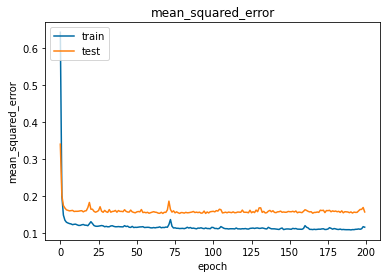

4411/4411 [==============================] - 0s 49us/sample - loss: 0.1580 - mean_squared_error: 0.1580
MSE: 0.1579696387052536
Mean squared error: 0.15796968
Coefficient of determination: 0.8520


In [181]:
#increasing neurons on the best net :
#Neural net:


X_train, X_test, y_train, y_test = train_test_split(
    principle_components_21, bigdata21[0], test_size=0.3, random_state=0)



# 1 layer network:

# construct the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(60, input_dim=40, activation='relu'),
    tf.keras.layers.Dense(1)
])
print(model.summary())

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.MeanSquaredError()])
print("Start training")
# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    batch_size = 200, epochs=200)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# evaluate the model
mse = model.evaluate(X_test, y_test)[1]
print(f'MSE: {mse}')
y_pred=model.predict(X_test)
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(y_test, y_pred))


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 41        
Total params: 1,681
Trainable params: 1,681
Non-trainable params: 0
_________________________________________________________________
None
Start training
Train on 10291 samples, validate on 4411 samples
Epoch 1/200
10291/10291 [==============================] - 0s 30us/step - loss: 1.1229 - mean_squared_error: 1.4842 - val_loss: 0.8732 - val_mean_squared_error: 1.0896
Epoch 2/200
10291/10291 [==============================] - 0s 16us/step - loss: 0.4545 - mean_squared_error: 0.9184 - val_loss: 0.4420 - val_mean_squared_error: 0.7753
Epoch 3/200
10291/10291 [==============================] - 0s 14us/step - loss: 0.2471 - mean_squared_error: 

10291/10291 [==============================] - 0s 15us/step - loss: 0.1203 - mean_squared_error: 0.1683 - val_loss: 0.1604 - val_mean_squared_error: 0.1679
Epoch 46/200
10291/10291 [==============================] - 0s 16us/step - loss: 0.1194 - mean_squared_error: 0.1675 - val_loss: 0.1592 - val_mean_squared_error: 0.1671
Epoch 47/200
10291/10291 [==============================] - 0s 17us/step - loss: 0.1187 - mean_squared_error: 0.1668 - val_loss: 0.1591 - val_mean_squared_error: 0.1664
Epoch 48/200
10291/10291 [==============================] - 0s 16us/step - loss: 0.1190 - mean_squared_error: 0.1660 - val_loss: 0.1624 - val_mean_squared_error: 0.1656
Epoch 49/200
10291/10291 [==============================] - 0s 15us/step - loss: 0.1194 - mean_squared_error: 0.1653 - val_loss: 0.1640 - val_mean_squared_error: 0.1650
Epoch 50/200
10291/10291 [==============================] - 0s 16us/step - loss: 0.1202 - mean_squared_error: 0.1646 - val_loss: 0.1605 - val_mean_squared_error: 0.1643

10291/10291 [==============================] - 0s 15us/step - loss: 0.1169 - mean_squared_error: 0.1492 - val_loss: 0.1596 - val_mean_squared_error: 0.1491
Epoch 94/200
10291/10291 [==============================] - 0s 15us/step - loss: 0.1173 - mean_squared_error: 0.1490 - val_loss: 0.1602 - val_mean_squared_error: 0.1489
Epoch 95/200
10291/10291 [==============================] - 0s 16us/step - loss: 0.1181 - mean_squared_error: 0.1488 - val_loss: 0.1595 - val_mean_squared_error: 0.1487
Epoch 96/200
10291/10291 [==============================] - 0s 17us/step - loss: 0.1185 - mean_squared_error: 0.1486 - val_loss: 0.1711 - val_mean_squared_error: 0.1486
Epoch 97/200
10291/10291 [==============================] - 0s 16us/step - loss: 0.1245 - mean_squared_error: 0.1485 - val_loss: 0.1676 - val_mean_squared_error: 0.1485
Epoch 98/200
10291/10291 [==============================] - 0s 16us/step - loss: 0.1210 - mean_squared_error: 0.1483 - val_loss: 0.1617 - val_mean_squared_error: 0.1483

10291/10291 [==============================] - 0s 15us/step - loss: 0.1154 - mean_squared_error: 0.1427 - val_loss: 0.1595 - val_mean_squared_error: 0.1426
Epoch 142/200
10291/10291 [==============================] - 0s 16us/step - loss: 0.1164 - mean_squared_error: 0.1426 - val_loss: 0.1634 - val_mean_squared_error: 0.1426
Epoch 143/200
10291/10291 [==============================] - 0s 16us/step - loss: 0.1160 - mean_squared_error: 0.1425 - val_loss: 0.1659 - val_mean_squared_error: 0.1425
Epoch 144/200
10291/10291 [==============================] - 0s 17us/step - loss: 0.1163 - mean_squared_error: 0.1424 - val_loss: 0.1600 - val_mean_squared_error: 0.1424
Epoch 145/200
10291/10291 [==============================] - 0s 16us/step - loss: 0.1164 - mean_squared_error: 0.1423 - val_loss: 0.1614 - val_mean_squared_error: 0.1423
Epoch 146/200
10291/10291 [==============================] - 0s 17us/step - loss: 0.1161 - mean_squared_error: 0.1423 - val_loss: 0.1609 - val_mean_squared_error: 0

10291/10291 [==============================] - 0s 16us/step - loss: 0.1140 - mean_squared_error: 0.1391 - val_loss: 0.1602 - val_mean_squared_error: 0.1391
Epoch 190/200
10291/10291 [==============================] - 0s 15us/step - loss: 0.1136 - mean_squared_error: 0.1390 - val_loss: 0.1594 - val_mean_squared_error: 0.1390
Epoch 191/200
10291/10291 [==============================] - 0s 16us/step - loss: 0.1136 - mean_squared_error: 0.1390 - val_loss: 0.1602 - val_mean_squared_error: 0.1390
Epoch 192/200
10291/10291 [==============================] - 0s 16us/step - loss: 0.1146 - mean_squared_error: 0.1389 - val_loss: 0.1622 - val_mean_squared_error: 0.1389
Epoch 193/200
10291/10291 [==============================] - 0s 17us/step - loss: 0.1142 - mean_squared_error: 0.1389 - val_loss: 0.1616 - val_mean_squared_error: 0.1389
Epoch 194/200
10291/10291 [==============================] - 0s 16us/step - loss: 0.1147 - mean_squared_error: 0.1388 - val_loss: 0.1663 - val_mean_squared_error: 0

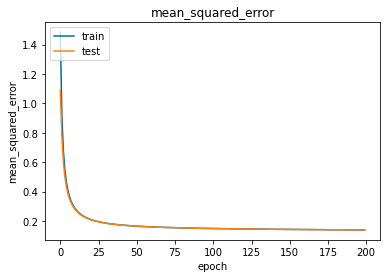

4411/4411 [==============================] - 0s 26us/step
MSE: 0.13854874670505524
Mean squared error: 0.15890105
Coefficient of determination: 0.8512


In [184]:
#increasing layers # on the best net :
#Neural net:


X_train, X_test, y_train, y_test = train_test_split(
    principle_components_21, bigdata21[0], test_size=0.3, random_state=0)


model = Sequential()

model.add(Dense(40, input_dim=40, activation='swish'))
model.add(Dense(1))

print(model.summary())

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.MeanSquaredError()])
print("Start training")
# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    batch_size = 200, epochs=200)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# evaluate the model
mse = model.evaluate(X_test, y_test)[1]
print(f'MSE: {mse}')
y_pred=model.predict(X_test)
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(y_test, y_pred))


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_8 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 41        
Total params: 3,321
Trainable params: 3,321
Non-trainable params: 0
_________________________________________________________________
None
Start training
Train on 10291 samples, validate on 4411 samples
Epoch 1/200
10291/10291 [==============================] - 0s 37us/step - loss: 0.6996 - mean_squared_error: 0.9689 - val_loss: 0.4214 - val_mean_squared_error: 0.6541
Epoch 2/200
10291/10291 [==============================] - 0s 17us/step - loss: 0.2462 - mean_squared_error: 0.5325 - val_loss: 0.2146 - val_mean

Epoch 45/200
10291/10291 [==============================] - 0s 17us/step - loss: 0.1172 - mean_squared_error: 0.1486 - val_loss: 0.1638 - val_mean_squared_error: 0.1484
Epoch 46/200
10291/10291 [==============================] - 0s 16us/step - loss: 0.1163 - mean_squared_error: 0.1481 - val_loss: 0.1606 - val_mean_squared_error: 0.1480
Epoch 47/200
10291/10291 [==============================] - 0s 17us/step - loss: 0.1170 - mean_squared_error: 0.1478 - val_loss: 0.1610 - val_mean_squared_error: 0.1477
Epoch 48/200
10291/10291 [==============================] - 0s 18us/step - loss: 0.1161 - mean_squared_error: 0.1475 - val_loss: 0.1630 - val_mean_squared_error: 0.1473
Epoch 49/200
10291/10291 [==============================] - 0s 18us/step - loss: 0.1176 - mean_squared_error: 0.1471 - val_loss: 0.1637 - val_mean_squared_error: 0.1470
Epoch 50/200
10291/10291 [==============================] - 0s 18us/step - loss: 0.1171 - mean_squared_error: 0.1468 - val_loss: 0.1629 - val_mean_squared_

10291/10291 [==============================] - 0s 17us/step - loss: 0.1128 - mean_squared_error: 0.1382 - val_loss: 0.1609 - val_mean_squared_error: 0.1381
Epoch 94/200
10291/10291 [==============================] - 0s 18us/step - loss: 0.1118 - mean_squared_error: 0.1381 - val_loss: 0.1638 - val_mean_squared_error: 0.1380
Epoch 95/200
10291/10291 [==============================] - 0s 17us/step - loss: 0.1132 - mean_squared_error: 0.1379 - val_loss: 0.1599 - val_mean_squared_error: 0.1379
Epoch 96/200
10291/10291 [==============================] - 0s 17us/step - loss: 0.1114 - mean_squared_error: 0.1378 - val_loss: 0.1641 - val_mean_squared_error: 0.1378
Epoch 97/200
10291/10291 [==============================] - 0s 17us/step - loss: 0.1115 - mean_squared_error: 0.1377 - val_loss: 0.1603 - val_mean_squared_error: 0.1377
Epoch 98/200
10291/10291 [==============================] - 0s 18us/step - loss: 0.1117 - mean_squared_error: 0.1376 - val_loss: 0.1623 - val_mean_squared_error: 0.1376

10291/10291 [==============================] - 0s 15us/step - loss: 0.1088 - mean_squared_error: 0.1339 - val_loss: 0.1600 - val_mean_squared_error: 0.1339
Epoch 142/200
10291/10291 [==============================] - 0s 17us/step - loss: 0.1092 - mean_squared_error: 0.1339 - val_loss: 0.1600 - val_mean_squared_error: 0.1338
Epoch 143/200
10291/10291 [==============================] - 0s 17us/step - loss: 0.1079 - mean_squared_error: 0.1338 - val_loss: 0.1607 - val_mean_squared_error: 0.1338
Epoch 144/200
10291/10291 [==============================] - 0s 17us/step - loss: 0.1082 - mean_squared_error: 0.1337 - val_loss: 0.1613 - val_mean_squared_error: 0.1337
Epoch 145/200
10291/10291 [==============================] - 0s 17us/step - loss: 0.1081 - mean_squared_error: 0.1337 - val_loss: 0.1598 - val_mean_squared_error: 0.1336
Epoch 146/200
10291/10291 [==============================] - 0s 17us/step - loss: 0.1083 - mean_squared_error: 0.1336 - val_loss: 0.1620 - val_mean_squared_error: 0

10291/10291 [==============================] - 0s 17us/step - loss: 0.1065 - mean_squared_error: 0.1313 - val_loss: 0.1629 - val_mean_squared_error: 0.1313
Epoch 190/200
10291/10291 [==============================] - 0s 19us/step - loss: 0.1072 - mean_squared_error: 0.1313 - val_loss: 0.1623 - val_mean_squared_error: 0.1312
Epoch 191/200
10291/10291 [==============================] - 0s 21us/step - loss: 0.1066 - mean_squared_error: 0.1312 - val_loss: 0.1606 - val_mean_squared_error: 0.1312
Epoch 192/200
10291/10291 [==============================] - 0s 20us/step - loss: 0.1053 - mean_squared_error: 0.1312 - val_loss: 0.1591 - val_mean_squared_error: 0.1311
Epoch 193/200
10291/10291 [==============================] - 0s 21us/step - loss: 0.1053 - mean_squared_error: 0.1311 - val_loss: 0.1608 - val_mean_squared_error: 0.1311
Epoch 194/200
10291/10291 [==============================] - 0s 21us/step - loss: 0.1057 - mean_squared_error: 0.1311 - val_loss: 0.1607 - val_mean_squared_error: 0

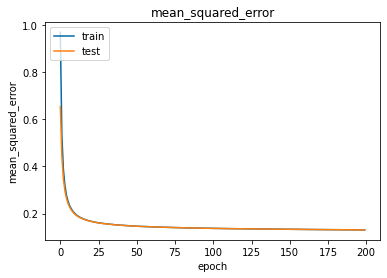

4411/4411 [==============================] - 0s 33us/step
MSE: 0.1308022439479828
Mean squared error: 0.16121162
Coefficient of determination: 0.8490


In [185]:
#Swish , 2 layers, 40 neurons
#Neural net:


X_train, X_test, y_train, y_test = train_test_split(
    principle_components_21, bigdata21[0], test_size=0.3, random_state=0)


model = Sequential()

model.add(Dense(40, input_dim=40, activation='swish'))
model.add(Dense(40, input_dim=40, activation='swish'))
model.add(Dense(1))

print(model.summary())

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.MeanSquaredError()])
print("Start training")
# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    batch_size = 200, epochs=200)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# evaluate the model
mse = model.evaluate(X_test, y_test)[1]
print(f'MSE: {mse}')
y_pred=model.predict(X_test)
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(y_test, y_pred))


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 80)                3280      
_________________________________________________________________
dense_11 (Dense)             (None, 80)                6480      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 81        
Total params: 9,841
Trainable params: 9,841
Non-trainable params: 0
_________________________________________________________________
None
Start training
Train on 10291 samples, validate on 4411 samples
Epoch 1/200
10291/10291 [==============================] - 1s 63us/step - loss: 0.3924 - mean_squared_error: 0.6185 - val_loss: 0.2056 - val_mean_squared_error: 0.3596
Epoch 2/200
10291/10291 [==============================] - 0s 28us/step - loss: 0.1580 - mean_squared_error: 0.2912 - val_loss: 0.1728 - val_mean

Epoch 45/200
10291/10291 [==============================] - 0s 23us/step - loss: 0.1163 - mean_squared_error: 0.1383 - val_loss: 0.1532 - val_mean_squared_error: 0.1382
Epoch 46/200
10291/10291 [==============================] - 0s 23us/step - loss: 0.1171 - mean_squared_error: 0.1380 - val_loss: 0.1576 - val_mean_squared_error: 0.1380
Epoch 47/200
10291/10291 [==============================] - 0s 23us/step - loss: 0.1164 - mean_squared_error: 0.1378 - val_loss: 0.1569 - val_mean_squared_error: 0.1378
Epoch 48/200
10291/10291 [==============================] - 0s 25us/step - loss: 0.1174 - mean_squared_error: 0.1377 - val_loss: 0.1603 - val_mean_squared_error: 0.1376
Epoch 49/200
10291/10291 [==============================] - 0s 27us/step - loss: 0.1169 - mean_squared_error: 0.1375 - val_loss: 0.1562 - val_mean_squared_error: 0.1374
Epoch 50/200
10291/10291 [==============================] - 0s 26us/step - loss: 0.1169 - mean_squared_error: 0.1373 - val_loss: 0.1542 - val_mean_squared_

10291/10291 [==============================] - 0s 21us/step - loss: 0.1113 - mean_squared_error: 0.1322 - val_loss: 0.1567 - val_mean_squared_error: 0.1322
Epoch 94/200
10291/10291 [==============================] - 0s 20us/step - loss: 0.1113 - mean_squared_error: 0.1321 - val_loss: 0.1545 - val_mean_squared_error: 0.1321
Epoch 95/200
10291/10291 [==============================] - 0s 20us/step - loss: 0.1103 - mean_squared_error: 0.1321 - val_loss: 0.1552 - val_mean_squared_error: 0.1320
Epoch 96/200
10291/10291 [==============================] - 0s 20us/step - loss: 0.1119 - mean_squared_error: 0.1319 - val_loss: 0.1593 - val_mean_squared_error: 0.1319
Epoch 97/200
10291/10291 [==============================] - 0s 21us/step - loss: 0.1117 - mean_squared_error: 0.1319 - val_loss: 0.1550 - val_mean_squared_error: 0.1319
Epoch 98/200
10291/10291 [==============================] - 0s 20us/step - loss: 0.1104 - mean_squared_error: 0.1318 - val_loss: 0.1544 - val_mean_squared_error: 0.1318

10291/10291 [==============================] - 0s 19us/step - loss: 0.1071 - mean_squared_error: 0.1293 - val_loss: 0.1574 - val_mean_squared_error: 0.1292
Epoch 142/200
10291/10291 [==============================] - 0s 21us/step - loss: 0.1070 - mean_squared_error: 0.1292 - val_loss: 0.1594 - val_mean_squared_error: 0.1292
Epoch 143/200
10291/10291 [==============================] - 0s 24us/step - loss: 0.1065 - mean_squared_error: 0.1291 - val_loss: 0.1575 - val_mean_squared_error: 0.1291
Epoch 144/200
10291/10291 [==============================] - 0s 23us/step - loss: 0.1075 - mean_squared_error: 0.1291 - val_loss: 0.1603 - val_mean_squared_error: 0.1291
Epoch 145/200
10291/10291 [==============================] - 0s 22us/step - loss: 0.1067 - mean_squared_error: 0.1291 - val_loss: 0.1579 - val_mean_squared_error: 0.1290
Epoch 146/200
10291/10291 [==============================] - 0s 22us/step - loss: 0.1078 - mean_squared_error: 0.1290 - val_loss: 0.1587 - val_mean_squared_error: 0

10291/10291 [==============================] - 0s 21us/step - loss: 0.1033 - mean_squared_error: 0.1274 - val_loss: 0.1588 - val_mean_squared_error: 0.1274
Epoch 190/200
10291/10291 [==============================] - 0s 24us/step - loss: 0.1023 - mean_squared_error: 0.1273 - val_loss: 0.1613 - val_mean_squared_error: 0.1273
Epoch 191/200
10291/10291 [==============================] - 0s 25us/step - loss: 0.1043 - mean_squared_error: 0.1273 - val_loss: 0.1604 - val_mean_squared_error: 0.1273
Epoch 192/200
10291/10291 [==============================] - 0s 25us/step - loss: 0.1035 - mean_squared_error: 0.1273 - val_loss: 0.1592 - val_mean_squared_error: 0.1272
Epoch 193/200
10291/10291 [==============================] - 0s 26us/step - loss: 0.1039 - mean_squared_error: 0.1272 - val_loss: 0.1585 - val_mean_squared_error: 0.1272
Epoch 194/200
10291/10291 [==============================] - 0s 24us/step - loss: 0.1025 - mean_squared_error: 0.1272 - val_loss: 0.1616 - val_mean_squared_error: 0

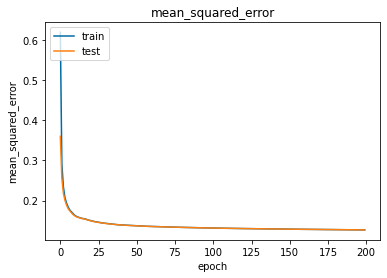

4411/4411 [==============================] - 0s 31us/step
MSE: 0.12699559330940247
Mean squared error: 0.16260663
Coefficient of determination: 0.8477


In [186]:
#Swish , 2 layers, 80 neurons
#Neural net:


X_train, X_test, y_train, y_test = train_test_split(
    principle_components_21, bigdata21[0], test_size=0.3, random_state=0)


model = Sequential()

model.add(Dense(80, input_dim=40, activation='swish'))
model.add(Dense(80, input_dim=40, activation='swish'))
model.add(Dense(1))

print(model.summary())

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.MeanSquaredError()])
print("Start training")
# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    batch_size = 200, epochs=200)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# evaluate the model
mse = model.evaluate(X_test, y_test)[1]
print(f'MSE: {mse}')
y_pred=model.predict(X_test)
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(y_test, y_pred))


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 41        
Total params: 1,681
Trainable params: 1,681
Non-trainable params: 0
_________________________________________________________________
None
Start training
Train on 10291 samples, validate on 4411 samples
Epoch 1/300
10291/10291 [==============================] - 0s 32us/step - loss: 1.1354 - mean_squared_error: 1.3683 - val_loss: 0.8555 - val_mean_squared_error: 1.0893
Epoch 2/300
10291/10291 [==============================] - 0s 11us/step - loss: 0.5428 - mean_squared_error: 0.9343 - val_loss: 0.4422 - val_mean_squared_error: 0.8094
Epoch 3/300
10291/10291 [==============================] - 0s 11us/step - loss: 0.2879 - mean_squared_error: 

10291/10291 [==============================] - 0s 12us/step - loss: 0.1201 - mean_squared_error: 0.1659 - val_loss: 0.1488 - val_mean_squared_error: 0.1656
Epoch 46/300
10291/10291 [==============================] - 0s 10us/step - loss: 0.1195 - mean_squared_error: 0.1652 - val_loss: 0.1494 - val_mean_squared_error: 0.1648
Epoch 47/300
10291/10291 [==============================] - 0s 10us/step - loss: 0.1193 - mean_squared_error: 0.1644 - val_loss: 0.1503 - val_mean_squared_error: 0.1640
Epoch 48/300
10291/10291 [==============================] - 0s 12us/step - loss: 0.1194 - mean_squared_error: 0.1637 - val_loss: 0.1471 - val_mean_squared_error: 0.1633
Epoch 49/300
10291/10291 [==============================] - 0s 11us/step - loss: 0.1191 - mean_squared_error: 0.1629 - val_loss: 0.1472 - val_mean_squared_error: 0.1626
Epoch 50/300
10291/10291 [==============================] - 0s 12us/step - loss: 0.1189 - mean_squared_error: 0.1622 - val_loss: 0.1479 - val_mean_squared_error: 0.1618

10291/10291 [==============================] - 0s 11us/step - loss: 0.1172 - mean_squared_error: 0.1461 - val_loss: 0.1488 - val_mean_squared_error: 0.1460
Epoch 94/300
10291/10291 [==============================] - 0s 11us/step - loss: 0.1181 - mean_squared_error: 0.1459 - val_loss: 0.1493 - val_mean_squared_error: 0.1458
Epoch 95/300
10291/10291 [==============================] - 0s 11us/step - loss: 0.1176 - mean_squared_error: 0.1457 - val_loss: 0.1495 - val_mean_squared_error: 0.1456
Epoch 96/300
10291/10291 [==============================] - 0s 11us/step - loss: 0.1174 - mean_squared_error: 0.1455 - val_loss: 0.1495 - val_mean_squared_error: 0.1454
Epoch 97/300
10291/10291 [==============================] - 0s 15us/step - loss: 0.1178 - mean_squared_error: 0.1453 - val_loss: 0.1537 - val_mean_squared_error: 0.1453
Epoch 98/300
10291/10291 [==============================] - 0s 11us/step - loss: 0.1182 - mean_squared_error: 0.1452 - val_loss: 0.1484 - val_mean_squared_error: 0.1451

10291/10291 [==============================] - 0s 11us/step - loss: 0.1166 - mean_squared_error: 0.1395 - val_loss: 0.1503 - val_mean_squared_error: 0.1394
Epoch 142/300
10291/10291 [==============================] - 0s 11us/step - loss: 0.1165 - mean_squared_error: 0.1394 - val_loss: 0.1499 - val_mean_squared_error: 0.1394
Epoch 143/300
10291/10291 [==============================] - 0s 11us/step - loss: 0.1153 - mean_squared_error: 0.1393 - val_loss: 0.1485 - val_mean_squared_error: 0.1393
Epoch 144/300
10291/10291 [==============================] - 0s 12us/step - loss: 0.1157 - mean_squared_error: 0.1392 - val_loss: 0.1500 - val_mean_squared_error: 0.1392
Epoch 145/300
10291/10291 [==============================] - 0s 12us/step - loss: 0.1162 - mean_squared_error: 0.1391 - val_loss: 0.1492 - val_mean_squared_error: 0.1391
Epoch 146/300
10291/10291 [==============================] - 0s 12us/step - loss: 0.1220 - mean_squared_error: 0.1390 - val_loss: 0.1580 - val_mean_squared_error: 0

10291/10291 [==============================] - 0s 13us/step - loss: 0.1135 - mean_squared_error: 0.1361 - val_loss: 0.1497 - val_mean_squared_error: 0.1361
Epoch 190/300
10291/10291 [==============================] - 0s 13us/step - loss: 0.1137 - mean_squared_error: 0.1360 - val_loss: 0.1492 - val_mean_squared_error: 0.1360
Epoch 191/300
10291/10291 [==============================] - 0s 11us/step - loss: 0.1144 - mean_squared_error: 0.1360 - val_loss: 0.1514 - val_mean_squared_error: 0.1360
Epoch 192/300
10291/10291 [==============================] - 0s 13us/step - loss: 0.1143 - mean_squared_error: 0.1359 - val_loss: 0.1511 - val_mean_squared_error: 0.1359
Epoch 193/300
10291/10291 [==============================] - 0s 12us/step - loss: 0.1139 - mean_squared_error: 0.1359 - val_loss: 0.1497 - val_mean_squared_error: 0.1359
Epoch 194/300
10291/10291 [==============================] - 0s 12us/step - loss: 0.1144 - mean_squared_error: 0.1358 - val_loss: 0.1492 - val_mean_squared_error: 0

10291/10291 [==============================] - 0s 13us/step - loss: 0.1158 - mean_squared_error: 0.1339 - val_loss: 0.1528 - val_mean_squared_error: 0.1339
Epoch 238/300
10291/10291 [==============================] - 0s 14us/step - loss: 0.1146 - mean_squared_error: 0.1339 - val_loss: 0.1524 - val_mean_squared_error: 0.1338
Epoch 239/300
10291/10291 [==============================] - 0s 13us/step - loss: 0.1148 - mean_squared_error: 0.1338 - val_loss: 0.1516 - val_mean_squared_error: 0.1338
Epoch 240/300
10291/10291 [==============================] - 0s 13us/step - loss: 0.1133 - mean_squared_error: 0.1338 - val_loss: 0.1514 - val_mean_squared_error: 0.1338
Epoch 241/300
10291/10291 [==============================] - 0s 13us/step - loss: 0.1137 - mean_squared_error: 0.1338 - val_loss: 0.1534 - val_mean_squared_error: 0.1337
Epoch 242/300
10291/10291 [==============================] - 0s 13us/step - loss: 0.1142 - mean_squared_error: 0.1337 - val_loss: 0.1533 - val_mean_squared_error: 0

10291/10291 [==============================] - 0s 11us/step - loss: 0.1123 - mean_squared_error: 0.1324 - val_loss: 0.1511 - val_mean_squared_error: 0.1324
Epoch 286/300
10291/10291 [==============================] - 0s 11us/step - loss: 0.1119 - mean_squared_error: 0.1324 - val_loss: 0.1517 - val_mean_squared_error: 0.1324
Epoch 287/300
10291/10291 [==============================] - 0s 15us/step - loss: 0.1121 - mean_squared_error: 0.1324 - val_loss: 0.1545 - val_mean_squared_error: 0.1324
Epoch 288/300
10291/10291 [==============================] - 0s 15us/step - loss: 0.1133 - mean_squared_error: 0.1324 - val_loss: 0.1553 - val_mean_squared_error: 0.1323
Epoch 289/300
10291/10291 [==============================] - 0s 12us/step - loss: 0.1199 - mean_squared_error: 0.1323 - val_loss: 0.1590 - val_mean_squared_error: 0.1323
Epoch 290/300
10291/10291 [==============================] - 0s 12us/step - loss: 0.1166 - mean_squared_error: 0.1323 - val_loss: 0.1542 - val_mean_squared_error: 0

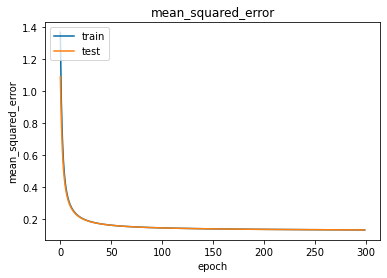

4411/4411 [==============================] - 0s 25us/step
MSE: 0.13209646940231323
Mean squared error: 0.15469041
Coefficient of determination: 0.8551


In [187]:
# Tweakign batch_size


#increasing layers # on the best net :
#Neural net:


X_train, X_test, y_train, y_test = train_test_split(
    principle_components_21, bigdata21[0], test_size=0.3, random_state=0)


model = Sequential()

model.add(Dense(40, input_dim=40, activation='swish'))
model.add(Dense(1))

print(model.summary())

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.MeanSquaredError()])
print("Start training")
# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    batch_size = 300, epochs=300)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# evaluate the model
mse = model.evaluate(X_test, y_test)[1]
print(f'MSE: {mse}')
y_pred=model.predict(X_test)
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(y_test, y_pred))


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 41        
Total params: 1,681
Trainable params: 1,681
Non-trainable params: 0
_________________________________________________________________
None
Start training
Train on 10291 samples, validate on 4411 samples
Epoch 1/400
10291/10291 [==============================] - 0s 24us/step - loss: 0.9012 - mean_squared_error: 1.0346 - val_loss: 0.6899 - val_mean_squared_error: 0.8659
Epoch 2/400
10291/10291 [==============================] - 0s 9us/step - loss: 0.4997 - mean_squared_error: 0.7596 - val_loss: 0.4287 - val_mean_squared_error: 0.6755
Epoch 3/400
10291/10291 [==============================] - 0s 9us/step - loss: 0.3108 - mean_squared_error: 0.

Epoch 46/400
10291/10291 [==============================] - 0s 9us/step - loss: 0.1198 - mean_squared_error: 0.1647 - val_loss: 0.1540 - val_mean_squared_error: 0.1644
Epoch 47/400
10291/10291 [==============================] - 0s 8us/step - loss: 0.1196 - mean_squared_error: 0.1640 - val_loss: 0.1539 - val_mean_squared_error: 0.1636
Epoch 48/400
10291/10291 [==============================] - 0s 8us/step - loss: 0.1196 - mean_squared_error: 0.1633 - val_loss: 0.1537 - val_mean_squared_error: 0.1629
Epoch 49/400
10291/10291 [==============================] - 0s 8us/step - loss: 0.1197 - mean_squared_error: 0.1626 - val_loss: 0.1542 - val_mean_squared_error: 0.1623
Epoch 50/400
10291/10291 [==============================] - 0s 9us/step - loss: 0.1194 - mean_squared_error: 0.1619 - val_loss: 0.1546 - val_mean_squared_error: 0.1616
Epoch 51/400
10291/10291 [==============================] - 0s 9us/step - loss: 0.1194 - mean_squared_error: 0.1613 - val_loss: 0.1535 - val_mean_squared_error:

Epoch 94/400
10291/10291 [==============================] - 0s 8us/step - loss: 0.1178 - mean_squared_error: 0.1466 - val_loss: 0.1539 - val_mean_squared_error: 0.1465
Epoch 95/400
10291/10291 [==============================] - 0s 9us/step - loss: 0.1181 - mean_squared_error: 0.1464 - val_loss: 0.1548 - val_mean_squared_error: 0.1463
Epoch 96/400
10291/10291 [==============================] - 0s 8us/step - loss: 0.1184 - mean_squared_error: 0.1462 - val_loss: 0.1537 - val_mean_squared_error: 0.1462
Epoch 97/400
10291/10291 [==============================] - 0s 8us/step - loss: 0.1180 - mean_squared_error: 0.1461 - val_loss: 0.1538 - val_mean_squared_error: 0.1460
Epoch 98/400
10291/10291 [==============================] - 0s 8us/step - loss: 0.1182 - mean_squared_error: 0.1459 - val_loss: 0.1540 - val_mean_squared_error: 0.1458
Epoch 99/400
10291/10291 [==============================] - 0s 8us/step - loss: 0.1176 - mean_squared_error: 0.1457 - val_loss: 0.1541 - val_mean_squared_error:

10291/10291 [==============================] - 0s 9us/step - loss: 0.1239 - mean_squared_error: 0.1406 - val_loss: 0.1563 - val_mean_squared_error: 0.1406
Epoch 143/400
10291/10291 [==============================] - 0s 9us/step - loss: 0.1186 - mean_squared_error: 0.1405 - val_loss: 0.1559 - val_mean_squared_error: 0.1405
Epoch 144/400
10291/10291 [==============================] - 0s 8us/step - loss: 0.1181 - mean_squared_error: 0.1405 - val_loss: 0.1549 - val_mean_squared_error: 0.1405
Epoch 145/400
10291/10291 [==============================] - 0s 9us/step - loss: 0.1200 - mean_squared_error: 0.1404 - val_loss: 0.1551 - val_mean_squared_error: 0.1404
Epoch 146/400
10291/10291 [==============================] - 0s 10us/step - loss: 0.1224 - mean_squared_error: 0.1404 - val_loss: 0.1554 - val_mean_squared_error: 0.1403
Epoch 147/400
10291/10291 [==============================] - 0s 10us/step - loss: 0.1174 - mean_squared_error: 0.1403 - val_loss: 0.1536 - val_mean_squared_error: 0.140

10291/10291 [==============================] - 0s 9us/step - loss: 0.1153 - mean_squared_error: 0.1373 - val_loss: 0.1541 - val_mean_squared_error: 0.1373
Epoch 191/400
10291/10291 [==============================] - 0s 9us/step - loss: 0.1155 - mean_squared_error: 0.1373 - val_loss: 0.1556 - val_mean_squared_error: 0.1373
Epoch 192/400
10291/10291 [==============================] - 0s 10us/step - loss: 0.1150 - mean_squared_error: 0.1372 - val_loss: 0.1534 - val_mean_squared_error: 0.1372
Epoch 193/400
10291/10291 [==============================] - 0s 9us/step - loss: 0.1153 - mean_squared_error: 0.1372 - val_loss: 0.1540 - val_mean_squared_error: 0.1371
Epoch 194/400
10291/10291 [==============================] - 0s 8us/step - loss: 0.1151 - mean_squared_error: 0.1371 - val_loss: 0.1545 - val_mean_squared_error: 0.1371
Epoch 195/400
10291/10291 [==============================] - 0s 8us/step - loss: 0.1151 - mean_squared_error: 0.1371 - val_loss: 0.1536 - val_mean_squared_error: 0.1370

10291/10291 [==============================] - 0s 8us/step - loss: 0.1137 - mean_squared_error: 0.1353 - val_loss: 0.1548 - val_mean_squared_error: 0.1352
Epoch 239/400
10291/10291 [==============================] - 0s 8us/step - loss: 0.1138 - mean_squared_error: 0.1352 - val_loss: 0.1536 - val_mean_squared_error: 0.1352
Epoch 240/400
10291/10291 [==============================] - 0s 9us/step - loss: 0.1136 - mean_squared_error: 0.1352 - val_loss: 0.1538 - val_mean_squared_error: 0.1352
Epoch 241/400
10291/10291 [==============================] - 0s 8us/step - loss: 0.1140 - mean_squared_error: 0.1351 - val_loss: 0.1547 - val_mean_squared_error: 0.1351
Epoch 242/400
10291/10291 [==============================] - 0s 9us/step - loss: 0.1143 - mean_squared_error: 0.1351 - val_loss: 0.1542 - val_mean_squared_error: 0.1351
Epoch 243/400
10291/10291 [==============================] - 0s 8us/step - loss: 0.1144 - mean_squared_error: 0.1351 - val_loss: 0.1549 - val_mean_squared_error: 0.1351


10291/10291 [==============================] - 0s 8us/step - loss: 0.1129 - mean_squared_error: 0.1337 - val_loss: 0.1545 - val_mean_squared_error: 0.1337
Epoch 287/400
10291/10291 [==============================] - 0s 8us/step - loss: 0.1131 - mean_squared_error: 0.1337 - val_loss: 0.1547 - val_mean_squared_error: 0.1337
Epoch 288/400
10291/10291 [==============================] - 0s 9us/step - loss: 0.1131 - mean_squared_error: 0.1337 - val_loss: 0.1546 - val_mean_squared_error: 0.1337
Epoch 289/400
10291/10291 [==============================] - 0s 9us/step - loss: 0.1137 - mean_squared_error: 0.1336 - val_loss: 0.1531 - val_mean_squared_error: 0.1336
Epoch 290/400
10291/10291 [==============================] - 0s 8us/step - loss: 0.1142 - mean_squared_error: 0.1336 - val_loss: 0.1532 - val_mean_squared_error: 0.1336
Epoch 291/400
10291/10291 [==============================] - 0s 7us/step - loss: 0.1143 - mean_squared_error: 0.1336 - val_loss: 0.1533 - val_mean_squared_error: 0.1336


10291/10291 [==============================] - 0s 9us/step - loss: 0.1128 - mean_squared_error: 0.1326 - val_loss: 0.1541 - val_mean_squared_error: 0.1326
Epoch 335/400
10291/10291 [==============================] - 0s 8us/step - loss: 0.1127 - mean_squared_error: 0.1325 - val_loss: 0.1542 - val_mean_squared_error: 0.1325
Epoch 336/400
10291/10291 [==============================] - 0s 9us/step - loss: 0.1121 - mean_squared_error: 0.1325 - val_loss: 0.1544 - val_mean_squared_error: 0.1325
Epoch 337/400
10291/10291 [==============================] - 0s 8us/step - loss: 0.1127 - mean_squared_error: 0.1325 - val_loss: 0.1564 - val_mean_squared_error: 0.1325
Epoch 338/400
10291/10291 [==============================] - 0s 8us/step - loss: 0.1126 - mean_squared_error: 0.1325 - val_loss: 0.1549 - val_mean_squared_error: 0.1325
Epoch 339/400
10291/10291 [==============================] - 0s 8us/step - loss: 0.1121 - mean_squared_error: 0.1325 - val_loss: 0.1538 - val_mean_squared_error: 0.1324


10291/10291 [==============================] - 0s 8us/step - loss: 0.1120 - mean_squared_error: 0.1316 - val_loss: 0.1546 - val_mean_squared_error: 0.1316
Epoch 383/400
10291/10291 [==============================] - 0s 9us/step - loss: 0.1119 - mean_squared_error: 0.1316 - val_loss: 0.1535 - val_mean_squared_error: 0.1316
Epoch 384/400
10291/10291 [==============================] - 0s 9us/step - loss: 0.1117 - mean_squared_error: 0.1315 - val_loss: 0.1536 - val_mean_squared_error: 0.1315
Epoch 385/400
10291/10291 [==============================] - 0s 8us/step - loss: 0.1121 - mean_squared_error: 0.1315 - val_loss: 0.1545 - val_mean_squared_error: 0.1315
Epoch 386/400
10291/10291 [==============================] - 0s 8us/step - loss: 0.1117 - mean_squared_error: 0.1315 - val_loss: 0.1566 - val_mean_squared_error: 0.1315
Epoch 387/400
10291/10291 [==============================] - 0s 8us/step - loss: 0.1122 - mean_squared_error: 0.1315 - val_loss: 0.1551 - val_mean_squared_error: 0.1315


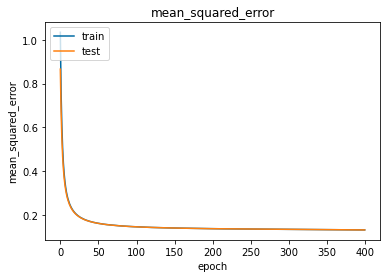

4411/4411 [==============================] - 0s 28us/step
MSE: 0.13127975165843964
Mean squared error: 0.15479708
Coefficient of determination: 0.8550


In [188]:
#slight increase when batch_size increased, going up again:

# Tweakign batch_size


#increasing layers # on the best net :
#Neural net:


X_train, X_test, y_train, y_test = train_test_split(
    principle_components_21, bigdata21[0], test_size=0.3, random_state=0)


model = Sequential()

model.add(Dense(40, input_dim=40, activation='swish'))
model.add(Dense(1))

print(model.summary())

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.MeanSquaredError()])
print("Start training")
# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    batch_size = 500, epochs=400)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# evaluate the model
mse = model.evaluate(X_test, y_test)[1]
print(f'MSE: {mse}')
y_pred=model.predict(X_test)
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(y_test, y_pred))


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 41        
Total params: 1,681
Trainable params: 1,681
Non-trainable params: 0
_________________________________________________________________
None
Start training
Train on 10291 samples, validate on 4411 samples
Epoch 1/300
10291/10291 [==============================] - 1s 88us/step - loss: 1.0815 - mean_squared_error: 2.0518 - val_loss: 0.3325 - val_mean_squared_error: 0.9572
Epoch 2/300
10291/10291 [==============================] - 1s 72us/step - loss: 0.1907 - mean_squared_error: 0.6993 - val_loss: 0.1991 - val_mean_squared_error: 0.5519
Epoch 3/300
10291/10291 [==============================] - 1s 65us/step - loss: 0.1489 - mean_squared_error:

10291/10291 [==============================] - 1s 68us/step - loss: 0.1265 - mean_squared_error: 0.1594 - val_loss: 0.1549 - val_mean_squared_error: 0.1591
Epoch 46/300
10291/10291 [==============================] - 1s 76us/step - loss: 0.1246 - mean_squared_error: 0.1589 - val_loss: 0.1531 - val_mean_squared_error: 0.1586
Epoch 47/300
10291/10291 [==============================] - 1s 74us/step - loss: 0.1254 - mean_squared_error: 0.1583 - val_loss: 0.1521 - val_mean_squared_error: 0.1580
Epoch 48/300
10291/10291 [==============================] - 1s 76us/step - loss: 0.1238 - mean_squared_error: 0.1577 - val_loss: 0.1544 - val_mean_squared_error: 0.1575
Epoch 49/300
10291/10291 [==============================] - 1s 70us/step - loss: 0.1250 - mean_squared_error: 0.1573 - val_loss: 0.1483 - val_mean_squared_error: 0.1570
Epoch 50/300
10291/10291 [==============================] - 1s 72us/step - loss: 0.1225 - mean_squared_error: 0.1567 - val_loss: 0.1526 - val_mean_squared_error: 0.1565

10291/10291 [==============================] - 1s 78us/step - loss: 0.1187 - mean_squared_error: 0.1443 - val_loss: 0.1531 - val_mean_squared_error: 0.1443
Epoch 94/300
10291/10291 [==============================] - 1s 73us/step - loss: 0.1182 - mean_squared_error: 0.1442 - val_loss: 0.1466 - val_mean_squared_error: 0.1441
Epoch 95/300
10291/10291 [==============================] - 1s 81us/step - loss: 0.1185 - mean_squared_error: 0.1440 - val_loss: 0.1502 - val_mean_squared_error: 0.1439
Epoch 96/300
10291/10291 [==============================] - 1s 93us/step - loss: 0.1199 - mean_squared_error: 0.1438 - val_loss: 0.1527 - val_mean_squared_error: 0.1438
Epoch 97/300
10291/10291 [==============================] - 1s 85us/step - loss: 0.1190 - mean_squared_error: 0.1437 - val_loss: 0.1489 - val_mean_squared_error: 0.1436
Epoch 98/300
10291/10291 [==============================] - 1s 75us/step - loss: 0.1192 - mean_squared_error: 0.1435 - val_loss: 0.1493 - val_mean_squared_error: 0.1435

10291/10291 [==============================] - 1s 69us/step - loss: 0.1153 - mean_squared_error: 0.1385 - val_loss: 0.1526 - val_mean_squared_error: 0.1384
Epoch 142/300
10291/10291 [==============================] - 1s 65us/step - loss: 0.1147 - mean_squared_error: 0.1384 - val_loss: 0.1495 - val_mean_squared_error: 0.1384
Epoch 143/300
10291/10291 [==============================] - 1s 67us/step - loss: 0.1155 - mean_squared_error: 0.1383 - val_loss: 0.1541 - val_mean_squared_error: 0.1383
Epoch 144/300
10291/10291 [==============================] - 1s 68us/step - loss: 0.1156 - mean_squared_error: 0.1382 - val_loss: 0.1518 - val_mean_squared_error: 0.1382
Epoch 145/300
10291/10291 [==============================] - 1s 66us/step - loss: 0.1150 - mean_squared_error: 0.1381 - val_loss: 0.1528 - val_mean_squared_error: 0.1381
Epoch 146/300
10291/10291 [==============================] - 1s 68us/step - loss: 0.1150 - mean_squared_error: 0.1381 - val_loss: 0.1508 - val_mean_squared_error: 0

Epoch 189/300
10291/10291 [==============================] - 1s 80us/step - loss: 0.1136 - mean_squared_error: 0.1353 - val_loss: 0.1525 - val_mean_squared_error: 0.1353
Epoch 190/300
10291/10291 [==============================] - 1s 87us/step - loss: 0.1135 - mean_squared_error: 0.1353 - val_loss: 0.1537 - val_mean_squared_error: 0.1352
Epoch 191/300
10291/10291 [==============================] - 1s 74us/step - loss: 0.1138 - mean_squared_error: 0.1352 - val_loss: 0.1538 - val_mean_squared_error: 0.1352
Epoch 192/300
10291/10291 [==============================] - 1s 68us/step - loss: 0.1135 - mean_squared_error: 0.1352 - val_loss: 0.1549 - val_mean_squared_error: 0.1351
Epoch 193/300
10291/10291 [==============================] - 1s 67us/step - loss: 0.1133 - mean_squared_error: 0.1351 - val_loss: 0.1530 - val_mean_squared_error: 0.1351
Epoch 194/300
10291/10291 [==============================] - 1s 68us/step - loss: 0.1129 - mean_squared_error: 0.1351 - val_loss: 0.1564 - val_mean_sq

10291/10291 [==============================] - 1s 69us/step - loss: 0.1124 - mean_squared_error: 0.1333 - val_loss: 0.1586 - val_mean_squared_error: 0.1333
Epoch 237/300
10291/10291 [==============================] - 1s 75us/step - loss: 0.1116 - mean_squared_error: 0.1333 - val_loss: 0.1539 - val_mean_squared_error: 0.1333
Epoch 238/300
10291/10291 [==============================] - 1s 75us/step - loss: 0.1119 - mean_squared_error: 0.1333 - val_loss: 0.1575 - val_mean_squared_error: 0.1333
Epoch 239/300
10291/10291 [==============================] - 1s 87us/step - loss: 0.1121 - mean_squared_error: 0.1332 - val_loss: 0.1564 - val_mean_squared_error: 0.1332
Epoch 240/300
10291/10291 [==============================] - 1s 71us/step - loss: 0.1122 - mean_squared_error: 0.1332 - val_loss: 0.1564 - val_mean_squared_error: 0.1332
Epoch 241/300
10291/10291 [==============================] - 1s 71us/step - loss: 0.1115 - mean_squared_error: 0.1332 - val_loss: 0.1553 - val_mean_squared_error: 0

10291/10291 [==============================] - 1s 72us/step - loss: 0.1109 - mean_squared_error: 0.1319 - val_loss: 0.1551 - val_mean_squared_error: 0.1319
Epoch 285/300
10291/10291 [==============================] - ETA: 0s - loss: 0.1109 - mean_squared_error: 0.13 - 1s 68us/step - loss: 0.1109 - mean_squared_error: 0.1319 - val_loss: 0.1574 - val_mean_squared_error: 0.1318
Epoch 286/300
10291/10291 [==============================] - 1s 80us/step - loss: 0.1103 - mean_squared_error: 0.1318 - val_loss: 0.1550 - val_mean_squared_error: 0.1318
Epoch 287/300
10291/10291 [==============================] - 1s 88us/step - loss: 0.1110 - mean_squared_error: 0.1318 - val_loss: 0.1580 - val_mean_squared_error: 0.1318
Epoch 288/300
10291/10291 [==============================] - 1s 83us/step - loss: 0.1098 - mean_squared_error: 0.1318 - val_loss: 0.1578 - val_mean_squared_error: 0.1318
Epoch 289/300
10291/10291 [==============================] - 1s 70us/step - loss: 0.1116 - mean_squared_error: 0

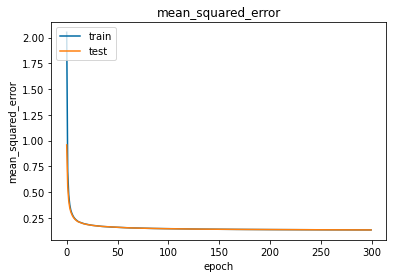

4411/4411 [==============================] - 0s 25us/step
MSE: 0.13151443004608154
Mean squared error: 0.15724222
Coefficient of determination: 0.8527


In [189]:
# default batch_size


#increasing layers # on the best net :
#Neural net:


X_train, X_test, y_train, y_test = train_test_split(
    principle_components_21, bigdata21[0], test_size=0.3, random_state=0)


model = Sequential()

model.add(Dense(40, input_dim=40, activation='swish'))
model.add(Dense(1))

print(model.summary())

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.MeanSquaredError()])
print("Start training")
# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                   epochs=300)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# evaluate the model
mse = model.evaluate(X_test, y_test)[1]
print(f'MSE: {mse}')
y_pred=model.predict(X_test)
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(y_test, y_pred))


I am not sure how to explain this. Let's try 3 input months and 1 output month:

In [202]:
features_std3 = np.column_stack(((bigdata31[1], bigdata31[3],bigdata31[4],
                                 bigdata31[5],bigdata31[6], bigdata31[7])))

features_std4 = np.column_stack(((bigdata41[1], bigdata41[3],bigdata41[4],
                                 bigdata41[5],bigdata41[6], bigdata41[7])))

features_std5 = np.column_stack(((bigdata51[1], bigdata51[3],bigdata51[4],
                                 bigdata51[5],bigdata51[6], bigdata51[7])))


features_std6 = np.column_stack(((bigdata61[1], bigdata61[3],bigdata61[4],
                                 bigdata61[5],bigdata61[6], bigdata61[7])))


In [194]:
#ordinary linear regression:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   features_std , bigdata11[0], test_size=0.3, random_state=0)

linreg = LinearRegression()
linreg.fit(X_train,y_train)
#print(linreg.predict(x[:10]))

y_pred = linreg.predict(X_test)
#err = np.abs(p - y_test_norm)


#The coefficients
print('Coefficients: \n', linreg.coef_)
print('Intercept: {}'.format(linreg.intercept_))
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))

print('RMSE: %.8f'
      % np.sqrt(mean_squared_error(y_test, y_pred)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.5f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [[ 8.98200733e-01  3.90583384e-01  8.76146740e-02 -2.14879812e-01
  -4.03950162e-03 -7.03380300e-02 -2.30380462e-01  6.34335798e-02
   4.48168564e-03 -4.44500354e-03 -1.03266932e-02  2.58099246e-03
  -9.98579786e-03 -4.49502267e-03  7.39850630e-03 -8.66883332e-04
  -2.28557857e-03 -1.95423903e-03  2.60197354e-03  3.15875816e-03
  -6.49976682e-04 -9.96978639e-04 -5.38975600e-03 -4.29333646e-03
   6.27027601e-04 -2.36160560e-03  7.51264261e-03  1.00083755e-03
  -1.44552902e-02  9.76343665e-05  1.22025319e-02  3.46327555e-03
   2.05701876e-02  3.45752438e-04 -1.29601640e-02 -5.55657952e-03
  -5.45716792e-03 -2.66369403e-02 -9.55355648e-02  2.43059377e-02
   1.71734195e-02  4.75806757e-02  4.52703165e-03  4.27894255e-03
   3.88670791e-02  2.21955082e-02  1.64739807e-02  1.63222907e-02
  -2.77897490e-03 -8.90777217e-03 -3.10559407e-03  1.80015829e-03]]
Intercept: [-0.00272619]
Mean squared error: 0.14403417
RMSE: 0.37951833
Coefficient of determination: 0.86209


In [193]:
#ordinary linear regression:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   features_std2 , bigdata21[0], test_size=0.3, random_state=0)

linreg = LinearRegression()
linreg.fit(X_train,y_train)
#print(linreg.predict(x[:10]))

y_pred = linreg.predict(X_test)
#err = np.abs(p - y_test_norm)


#The coefficients
print('Coefficients: \n', linreg.coef_)
print('Intercept: {}'.format(linreg.intercept_))
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))

print('RMSE: %.8f'
      % np.sqrt(mean_squared_error(y_test, y_pred)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.5f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [[-1.73429346e-01  1.06514112e+00 -3.25110734e-01  3.31352804e-01
   2.18859805e-01  1.19334988e-01 -1.93223414e-01 -2.06600919e-02
   1.83459476e-01 -1.51342821e-03 -3.64587726e-01  3.74286115e-02
   1.37898377e-04 -5.30113285e-03 -9.12101065e-03 -2.90926186e-03
  -8.44902722e-03  1.24491697e-03  8.68226673e-03  7.44184033e-03
   3.98920991e-03 -4.84843813e-03 -8.12712688e-03 -8.07773998e-03
   3.14552761e-03 -9.08761969e-03 -1.30951945e-03  4.09830334e-03
  -1.89540903e-03  4.35280447e-03  5.69757558e-04  8.19319704e-03
   3.73362278e-03  2.04213653e-02  3.54225981e-02  2.40568200e-02
   1.30110268e-03 -1.84240438e-02 -4.00686179e-02 -4.14987264e-03
   4.43112721e-03  4.60109147e-02  2.08978118e-01 -8.47193884e-02
  -6.17894607e-02 -1.81478820e-01 -1.93407835e-02 -5.65353582e-02
   2.44942376e-03 -2.20195913e-03  5.43798460e-03 -1.47414722e-04
  -3.09576157e-03 -1.04334556e-02 -9.94097398e-03 -1.97916919e-03]]
Intercept: [-0.00301254]
Mean squared error: 0.14913161
RM

In [192]:
#ordinary linear regression:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   features_std3 , bigdata31[0], test_size=0.3, random_state=0)

linreg = LinearRegression()
linreg.fit(X_train,y_train)
#print(linreg.predict(x[:10]))

y_pred = linreg.predict(X_test)
#err = np.abs(p - y_test_norm)


#The coefficients
print('Coefficients: \n', linreg.coef_)
print('Intercept: {}'.format(linreg.intercept_))
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))

print('RMSE: %.8f'
      % np.sqrt(mean_squared_error(y_test, y_pred)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.5f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [[-5.04476224e-02 -9.42125526e-02  1.03405057e+00 -1.28888880e-01
  -5.92187721e-02  4.30238145e-01  1.83400144e-01  1.04179103e-01
  -2.03978866e-02 -1.98490650e-01 -6.65308306e-02  4.54629801e-02
   5.68418589e-02 -1.14544579e-01 -2.76979915e-01  1.79319896e-02
  -1.88225650e-02 -3.33332215e-03 -9.94963846e-03 -1.42917856e-03
  -1.17864892e-02 -3.22683415e-03  4.18127401e-02  8.63967032e-03
  -2.24934395e-03 -1.73278791e-02 -4.15873255e-03 -1.05708857e-02
   3.88193288e-03 -1.05564652e-02 -3.41638212e-03 -3.00726069e-03
  -4.42103850e-03  1.65611975e-02 -2.90122528e-02  3.05531648e-02
  -4.70063958e-02 -2.07284966e-02 -2.12982587e-02  7.63428581e-03
   4.95401125e-02  9.68318741e-03  6.77755953e-04  1.85617980e-02
   2.47850739e-02  4.61818388e+08  2.21291777e+09 -9.45176511e+08
  -7.00000751e+08 -1.87479705e+09 -2.06600663e+08 -4.61818388e+08
   8.27397280e-02  3.99963556e-02  4.34978613e-02  1.15125879e-02
  -1.09563187e-02 -2.52372978e-02 -2.41027418e-02 -1.8992223

In [200]:
#ordinary linear regression:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   features_std4 , bigdata41[0], test_size=0.3, random_state=0)

linreg = LinearRegression()
linreg.fit(X_train,y_train)
#print(linreg.predict(x[:10]))

y_pred = linreg.predict(X_test)
#err = np.abs(p - y_test_norm)


#The coefficients
print('Coefficients: \n', linreg.coef_)
print('Intercept: {}'.format(linreg.intercept_))
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))

print('RMSE: %.8f'
      % np.sqrt(mean_squared_error(y_test, y_pred)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.5f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [[-2.03875736e-02 -3.74383728e-02 -8.13924567e-02  1.03070953e+00
   1.99550434e-01 -3.44995952e-01  1.70002169e-01  1.04825100e-01
   2.34260369e-01 -1.44649449e-02  1.34615286e-01 -5.49949359e-02
  -6.92712761e-02 -2.27415387e-01 -8.40198297e-02  1.86613933e-01
  -1.00233536e-01  1.02074817e-01 -2.59501045e-01 -1.38335194e-01
   3.64185035e-03  2.51792874e-03 -1.69615324e-03  2.38145227e-04
  -9.05203500e-03  3.43224591e-03 -9.31805250e-03  1.33510478e-02
  -3.12258712e-02 -1.37222700e-02  1.76331836e-02 -1.07404638e-02
   4.17267200e-04 -3.19815345e-03 -1.73960972e-03  3.00420840e-03
  -1.00359555e-02 -2.10884680e-02  2.98533258e-02  5.28589281e-03
   1.17930072e-03 -2.62328523e-02 -1.96115650e+10 -5.24500114e+09
   5.68994441e-02  2.31785237e-02  2.02988285e+10 -1.43686878e-02
  -6.54036227e-03 -1.71389638e+09 -9.42675144e+09  4.01372438e+09
   3.12682462e+09  7.89536927e+09  6.99879470e+08  1.97882863e+09
   5.72939601e-02  3.32111716e-02  2.46743083e-02  3.9309261

In [201]:
#ordinary linear regression:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   features_std5 , bigdata51[0], test_size=0.3, random_state=0)

linreg = LinearRegression()
linreg.fit(X_train,y_train)
#print(linreg.predict(x[:10]))

y_pred = linreg.predict(X_test)
#err = np.abs(p - y_test_norm)


#The coefficients
print('Coefficients: \n', linreg.coef_)
print('Intercept: {}'.format(linreg.intercept_))
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))

print('RMSE: %.8f'
      % np.sqrt(mean_squared_error(y_test, y_pred)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.5f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [[ 1.11346519e-01 -1.34849708e-01  8.38470021e-03 -8.17532358e-02
   1.00408095e+00  5.40925150e-02  8.40562319e-02  7.11551731e-02
   6.12413086e-02 -4.77707602e-02 -1.45974468e-01 -4.59920378e-02
   3.28194727e-02 -5.77316414e-02  1.33008263e-02  4.91458384e-03
  -2.76377440e-02  2.89098882e-02 -7.14517632e-02 -3.61289619e-02
  -7.46502938e-02  1.94922136e-01 -4.03280327e-02 -7.88666236e-02
  -1.17723689e-02 -6.76428420e-04 -4.91881947e-03  9.67227981e-04
  -1.08443611e-02  2.20912197e-03  3.99092864e-02 -1.02448000e-02
  -3.67927228e-02 -2.77577328e-03  7.51811145e-03 -5.18286441e-02
   2.93484435e-02 -2.00952240e-02 -4.58453919e-02 -2.87145039e-02
   5.21098377e-03 -6.86948221e-02  5.20459935e-02  8.97359339e-02
   1.88037191e-02  7.99027161e-02  6.93685622e-03  6.59194921e-16
   3.45971337e-02 -5.19005240e-02  6.93685622e-03 -3.52475439e-03
  -8.69470223e-03  1.88037191e-02  1.32044441e-02  1.88406084e-02
  -1.18149352e-03  9.94592848e-03 -9.71445147e-17  2.1380483

In [204]:
#ordinary linear regression:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   features_std6 , bigdata61[0], test_size=0.3, random_state=0)

linreg = LinearRegression()
linreg.fit(X_train,y_train)
#print(linreg.predict(x[:10]))

y_pred = linreg.predict(X_test)
#err = np.abs(p - y_test_norm)


#The coefficients
print('Coefficients: \n', linreg.coef_)
print('Intercept: {}'.format(linreg.intercept_))
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))

print('RMSE: %.8f'
      % np.sqrt(mean_squared_error(y_test, y_pred)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.5f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [[ 2.07609456e-01 -1.17341760e-01 -6.70722451e-02  1.39094279e-02
  -5.12045734e-02  9.38496805e-01 -3.79861049e-02  2.27216457e-01
   3.53773054e-01 -6.10621896e-02  1.21044793e-01  9.80801814e-03
  -7.30149377e-01 -2.40212268e-02 -8.49587884e-02 -7.27923134e-02
   3.89610534e-02  2.21922817e-02 -1.29627179e-01  2.01127514e-01
   4.51789876e-02  1.01302106e-03 -2.31171165e-01  4.11167213e-02
  -1.28391405e-01  1.64959531e-01  1.34345349e-01 -4.31744837e-01
   1.84438481e+11  1.34485275e-02  1.05155951e-02  1.92007060e-03
  -3.42546505e-03  4.48000727e-03 -1.17147676e+11 -3.77872473e+10
   1.36398460e+11  4.00670390e+11  7.76494775e+10 -4.15013593e+11
  -2.24140578e+11 -1.21335915e+11 -1.83740538e+11 -6.06274255e+09
   4.04533827e+10 -3.03960842e+11  2.98657745e+11  3.64355433e+11
   1.71875292e+10 -1.74878239e+11  5.70369240e+11  1.90166282e+09
   1.41887336e+11  3.60692626e+11 -5.77760856e+11  3.19409383e+10
  -1.55939229e+11  2.40344671e+10  1.57833409e+12 -8.1885141

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 40)                2440      
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 41        
Total params: 2,481
Trainable params: 2,481
Non-trainable params: 0
_________________________________________________________________
None
Start training
Train on 8362 samples, validate on 3584 samples
Epoch 1/100
8362/8362 [==============================] - 1s 161us/sample - loss: 0.8159 - mean_squared_error: 0.8159 - val_loss: 0.2910 - val_mean_squared_error: 0.2910
Epoch 2/100
8362/8362 [==============================] - 1s 88us/sample - loss: 0.2447 - mean_squared_error: 0.2447 - val_loss: 0.2070 - val_mean_squared_error: 0.2070
Epoch 3/100
8362/8362 [==============================] - 1s 87us/sample - loss: 0.1843 - mean_squared_error:

8362/8362 [==============================] - 1s 82us/sample - loss: 0.1331 - mean_squared_error: 0.1331 - val_loss: 0.1432 - val_mean_squared_error: 0.1432
Epoch 46/100
8362/8362 [==============================] - 1s 78us/sample - loss: 0.1322 - mean_squared_error: 0.1322 - val_loss: 0.1427 - val_mean_squared_error: 0.1427
Epoch 47/100
8362/8362 [==============================] - 1s 80us/sample - loss: 0.1278 - mean_squared_error: 0.1278 - val_loss: 0.1351 - val_mean_squared_error: 0.1351
Epoch 48/100
8362/8362 [==============================] - 1s 82us/sample - loss: 0.1308 - mean_squared_error: 0.1308 - val_loss: 0.1402 - val_mean_squared_error: 0.1402
Epoch 49/100
8362/8362 [==============================] - 1s 77us/sample - loss: 0.1292 - mean_squared_error: 0.1292 - val_loss: 0.1360 - val_mean_squared_error: 0.1360
Epoch 50/100
8362/8362 [==============================] - 1s 80us/sample - loss: 0.1277 - mean_squared_error: 0.1277 - val_loss: 0.1363 - val_mean_squared_error: 0.1363

8362/8362 [==============================] - 1s 83us/sample - loss: 0.1207 - mean_squared_error: 0.1207 - val_loss: 0.1323 - val_mean_squared_error: 0.1323
Epoch 94/100
8362/8362 [==============================] - 1s 86us/sample - loss: 0.1224 - mean_squared_error: 0.1224 - val_loss: 0.1350 - val_mean_squared_error: 0.1350
Epoch 95/100
8362/8362 [==============================] - 1s 89us/sample - loss: 0.1219 - mean_squared_error: 0.1219 - val_loss: 0.1326 - val_mean_squared_error: 0.1326
Epoch 96/100
8362/8362 [==============================] - 1s 85us/sample - loss: 0.1218 - mean_squared_error: 0.1218 - val_loss: 0.1340 - val_mean_squared_error: 0.1340
Epoch 97/100
8362/8362 [==============================] - 1s 86us/sample - loss: 0.1221 - mean_squared_error: 0.1221 - val_loss: 0.1334 - val_mean_squared_error: 0.1334
Epoch 98/100
8362/8362 [==============================] - 1s 88us/sample - loss: 0.1218 - mean_squared_error: 0.1218 - val_loss: 0.1374 - val_mean_squared_error: 0.1374

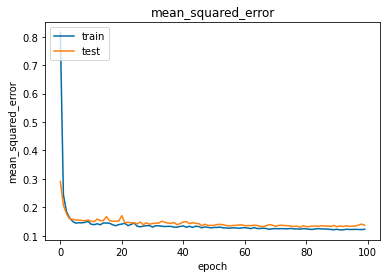

3584/3584 [==============================] - 0s 37us/sample - loss: 0.1367 - mean_squared_error: 0.1367
MSE: 0.1366730034351349
Mean squared error: 0.13667300
Coefficient of determination: 0.8597


In [206]:
#Neural net:

X_train, X_test, y_train, y_test = train_test_split(
    features_std3, bigdata31[0], test_size=0.3, random_state=0)



# 1 layer network:

# construct the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(40, input_dim=60, activation='relu'),
    tf.keras.layers.Dense(1)
])
print(model.summary())

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.MeanSquaredError()])
print("Start training")
# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=100)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# evaluate the model
mse = model.evaluate(X_test, y_test)[1]
print(f'MSE: {mse}')
y_pred=model.predict(X_test)
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(y_test, y_pred))

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 40)                2440      
_________________________________________________________________
dense_58 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 41        
Total params: 4,121
Trainable params: 4,121
Non-trainable params: 0
_________________________________________________________________
None
Start training
Train on 8362 samples, validate on 3584 samples
Epoch 1/100
8362/8362 [==============================] - 1s 169us/sample - loss: 0.4504 - mean_squared_error: 0.4504 - val_loss: 0.2048 - val_mean_squared_error: 0.2048
Epoch 2/100
8362/8362 [==============================] - 1s 104us/sample - loss: 0.1833 - mean_squared_error: 0.1833 - val_loss: 0.1684 - val_me

8362/8362 [==============================] - 1s 81us/sample - loss: 0.1143 - mean_squared_error: 0.1143 - val_loss: 0.1358 - val_mean_squared_error: 0.1358
Epoch 45/100
8362/8362 [==============================] - 1s 86us/sample - loss: 0.1122 - mean_squared_error: 0.1122 - val_loss: 0.1369 - val_mean_squared_error: 0.1369
Epoch 46/100
8362/8362 [==============================] - 1s 84us/sample - loss: 0.1150 - mean_squared_error: 0.1150 - val_loss: 0.1394 - val_mean_squared_error: 0.1394
Epoch 47/100
8362/8362 [==============================] - 1s 82us/sample - loss: 0.1130 - mean_squared_error: 0.1130 - val_loss: 0.1389 - val_mean_squared_error: 0.1389
Epoch 48/100
8362/8362 [==============================] - 1s 86us/sample - loss: 0.1127 - mean_squared_error: 0.1127 - val_loss: 0.1356 - val_mean_squared_error: 0.1356
Epoch 49/100
8362/8362 [==============================] - 1s 85us/sample - loss: 0.1134 - mean_squared_error: 0.1134 - val_loss: 0.1406 - val_mean_squared_error: 0.1406

8362/8362 [==============================] - 1s 84us/sample - loss: 0.1005 - mean_squared_error: 0.1005 - val_loss: 0.1409 - val_mean_squared_error: 0.1409
Epoch 93/100
8362/8362 [==============================] - 1s 82us/sample - loss: 0.1031 - mean_squared_error: 0.1031 - val_loss: 0.1475 - val_mean_squared_error: 0.1475
Epoch 94/100
8362/8362 [==============================] - 1s 86us/sample - loss: 0.1009 - mean_squared_error: 0.1009 - val_loss: 0.1423 - val_mean_squared_error: 0.1423
Epoch 95/100
8362/8362 [==============================] - 1s 90us/sample - loss: 0.1001 - mean_squared_error: 0.1001 - val_loss: 0.1419 - val_mean_squared_error: 0.1419
Epoch 96/100
8362/8362 [==============================] - 1s 81us/sample - loss: 0.0995 - mean_squared_error: 0.0995 - val_loss: 0.1426 - val_mean_squared_error: 0.1426
Epoch 97/100
8362/8362 [==============================] - 1s 85us/sample - loss: 0.0981 - mean_squared_error: 0.0981 - val_loss: 0.1416 - val_mean_squared_error: 0.1416

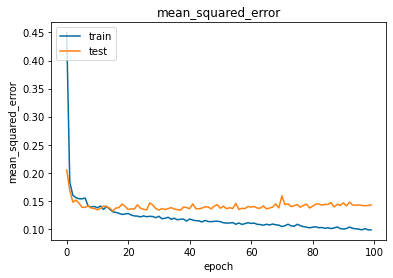

3584/3584 [==============================] - 0s 38us/sample - loss: 0.1427 - mean_squared_error: 0.1427
MSE: 0.14265534281730652
Mean squared error: 0.14265535
Coefficient of determination: 0.8536


In [207]:
#adding more layer:

X_train, X_test, y_train, y_test = train_test_split(
    features_std3, bigdata31[0], test_size=0.3, random_state=0)



# 1 layer network:

# construct the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(40, input_dim=60, activation='relu'),
    tf.keras.layers.Dense(40, input_dim=60, activation='relu'),
    tf.keras.layers.Dense(1)
])
print(model.summary())

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.MeanSquaredError()])
print("Start training")
# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=100)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# evaluate the model
mse = model.evaluate(X_test, y_test)[1]
print(f'MSE: {mse}')
y_pred=model.predict(X_test)
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(y_test, y_pred))

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 60)                3660      
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 61        
Total params: 3,721
Trainable params: 3,721
Non-trainable params: 0
_________________________________________________________________
None
Start training
Train on 8362 samples, validate on 3584 samples
Epoch 1/100
8362/8362 [==============================] - 2s 195us/sample - loss: 0.5229 - mean_squared_error: 0.5229 - val_loss: 0.2119 - val_mean_squared_error: 0.2119
Epoch 2/100
8362/8362 [==============================] - 1s 101us/sample - loss: 0.2082 - mean_squared_error: 0.2082 - val_loss: 0.1638 - val_mean_squared_error: 0.1638
Epoch 3/100
8362/8362 [==============================] - 1s 117us/sample - loss: 0.1572 - mean_squared_erro

8362/8362 [==============================] - 1s 86us/sample - loss: 0.1258 - mean_squared_error: 0.1258 - val_loss: 0.1396 - val_mean_squared_error: 0.1396
Epoch 46/100
8362/8362 [==============================] - 1s 85us/sample - loss: 0.1284 - mean_squared_error: 0.1284 - val_loss: 0.1396 - val_mean_squared_error: 0.1396
Epoch 47/100
8362/8362 [==============================] - 1s 84us/sample - loss: 0.1238 - mean_squared_error: 0.1238 - val_loss: 0.1370 - val_mean_squared_error: 0.1370
Epoch 48/100
8362/8362 [==============================] - 1s 81us/sample - loss: 0.1239 - mean_squared_error: 0.1239 - val_loss: 0.1349 - val_mean_squared_error: 0.1349
Epoch 49/100
8362/8362 [==============================] - 1s 85us/sample - loss: 0.1268 - mean_squared_error: 0.1268 - val_loss: 0.1380 - val_mean_squared_error: 0.1380
Epoch 50/100
8362/8362 [==============================] - 1s 85us/sample - loss: 0.1250 - mean_squared_error: 0.1250 - val_loss: 0.1414 - val_mean_squared_error: 0.1414

8362/8362 [==============================] - 1s 87us/sample - loss: 0.1179 - mean_squared_error: 0.1179 - val_loss: 0.1396 - val_mean_squared_error: 0.1396
Epoch 94/100
8362/8362 [==============================] - 1s 83us/sample - loss: 0.1187 - mean_squared_error: 0.1187 - val_loss: 0.1410 - val_mean_squared_error: 0.1410
Epoch 95/100
8362/8362 [==============================] - 1s 80us/sample - loss: 0.1216 - mean_squared_error: 0.1216 - val_loss: 0.1388 - val_mean_squared_error: 0.1388
Epoch 96/100
8362/8362 [==============================] - 1s 85us/sample - loss: 0.1232 - mean_squared_error: 0.1232 - val_loss: 0.1390 - val_mean_squared_error: 0.1390
Epoch 97/100
8362/8362 [==============================] - 1s 83us/sample - loss: 0.1173 - mean_squared_error: 0.1173 - val_loss: 0.1373 - val_mean_squared_error: 0.1373
Epoch 98/100
8362/8362 [==============================] - 1s 82us/sample - loss: 0.1175 - mean_squared_error: 0.1175 - val_loss: 0.1383 - val_mean_squared_error: 0.1383

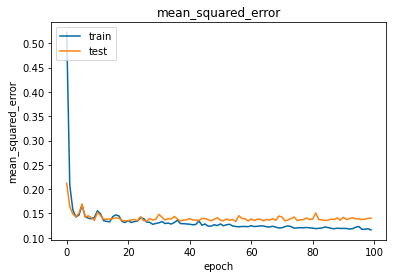

3584/3584 [==============================] - 0s 34us/sample - loss: 0.1405 - mean_squared_error: 0.1405
MSE: 0.140547975897789
Mean squared error: 0.14054801
Coefficient of determination: 0.8558


In [208]:
#increasing number of neurons:

#adding more layer:

X_train, X_test, y_train, y_test = train_test_split(
    features_std3, bigdata31[0], test_size=0.3, random_state=0)



# 1 layer network:

# construct the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(60, input_dim=60, activation='relu'),
    
    tf.keras.layers.Dense(1)
])
print(model.summary())

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.MeanSquaredError()])
print("Start training")
# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=100)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# evaluate the model
mse = model.evaluate(X_test, y_test)[1]
print(f'MSE: {mse}')
y_pred=model.predict(X_test)
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(y_test, y_pred))

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 40)                2600      
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 41        
Total params: 2,641
Trainable params: 2,641
Non-trainable params: 0
_________________________________________________________________
None
Start training
Train on 6650 samples, validate on 2851 samples
Epoch 1/100
6650/6650 [==============================] - 1s 190us/sample - loss: 0.9477 - mean_squared_error: 0.9477 - val_loss: 0.3848 - val_mean_squared_error: 0.3848
Epoch 2/100
6650/6650 [==============================] - 1s 85us/sample - loss: 0.3702 - mean_squared_error: 0.3702 - val_loss: 0.2196 - val_mean_squared_error: 0.2196
Epoch 3/100
6650/6650 [==============================] - 1s 89us/sample - loss: 0.2377 - mean_squared_error:

6650/6650 [==============================] - 1s 91us/sample - loss: 0.1297 - mean_squared_error: 0.1297 - val_loss: 0.1467 - val_mean_squared_error: 0.1467
Epoch 46/100
6650/6650 [==============================] - 1s 90us/sample - loss: 0.1289 - mean_squared_error: 0.1289 - val_loss: 0.1331 - val_mean_squared_error: 0.1331
Epoch 47/100
6650/6650 [==============================] - 1s 87us/sample - loss: 0.1266 - mean_squared_error: 0.1266 - val_loss: 0.1410 - val_mean_squared_error: 0.1410
Epoch 48/100
6650/6650 [==============================] - 1s 88us/sample - loss: 0.1249 - mean_squared_error: 0.1249 - val_loss: 0.1348 - val_mean_squared_error: 0.1348
Epoch 49/100
6650/6650 [==============================] - 1s 84us/sample - loss: 0.1259 - mean_squared_error: 0.1259 - val_loss: 0.1395 - val_mean_squared_error: 0.1395
Epoch 50/100
6650/6650 [==============================] - 1s 88us/sample - loss: 0.1298 - mean_squared_error: 0.1298 - val_loss: 0.1387 - val_mean_squared_error: 0.1387

6650/6650 [==============================] - 1s 81us/sample - loss: 0.1210 - mean_squared_error: 0.1210 - val_loss: 0.1356 - val_mean_squared_error: 0.1356
Epoch 94/100
6650/6650 [==============================] - 1s 105us/sample - loss: 0.1204 - mean_squared_error: 0.1204 - val_loss: 0.1391 - val_mean_squared_error: 0.1391
Epoch 95/100
6650/6650 [==============================] - 1s 117us/sample - loss: 0.1208 - mean_squared_error: 0.1208 - val_loss: 0.1458 - val_mean_squared_error: 0.1458
Epoch 96/100
6650/6650 [==============================] - 1s 100us/sample - loss: 0.1216 - mean_squared_error: 0.1216 - val_loss: 0.1370 - val_mean_squared_error: 0.1370
Epoch 97/100
6650/6650 [==============================] - 1s 117us/sample - loss: 0.1220 - mean_squared_error: 0.1220 - val_loss: 0.1418 - val_mean_squared_error: 0.1418
Epoch 98/100
6650/6650 [==============================] - 1s 131us/sample - loss: 0.1215 - mean_squared_error: 0.1215 - val_loss: 0.1390 - val_mean_squared_error: 0

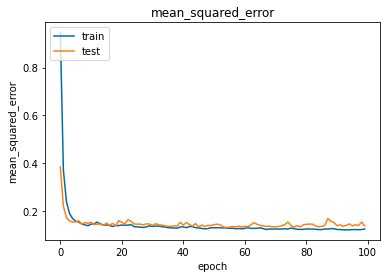

2851/2851 [==============================] - 0s 43us/sample - loss: 0.1373 - mean_squared_error: 0.1373
MSE: 0.13725018501281738
Mean squared error: 0.13725023
Coefficient of determination: 0.8581


In [209]:
# for std_4:

#adding more layer:

X_train, X_test, y_train, y_test = train_test_split(
    features_std4, bigdata41[0], test_size=0.3, random_state=0)



# 1 layer network:

# construct the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(40, input_dim=64, activation='relu'),
    tf.keras.layers.Dense(1)
])
print(model.summary())

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.MeanSquaredError()])
print("Start training")
# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=100)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# evaluate the model
mse = model.evaluate(X_test, y_test)[1]
print(f'MSE: {mse}')
y_pred=model.predict(X_test)
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(y_test, y_pred))

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 40)                2760      
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 41        
Total params: 2,801
Trainable params: 2,801
Non-trainable params: 0
_________________________________________________________________
None
Start training
Train on 5126 samples, validate on 2197 samples
Epoch 1/100
5126/5126 [==============================] - 1s 201us/sample - loss: 0.6250 - mean_squared_error: 0.6250 - val_loss: 0.3262 - val_mean_squared_error: 0.3262
Epoch 2/100
5126/5126 [==============================] - 0s 92us/sample - loss: 0.2634 - mean_squared_error: 0.2634 - val_loss: 0.2392 - val_mean_squared_error: 0.2392
Epoch 3/100
5126/5126 [==============================] - 0s 89us/sample - loss: 0.1922 - mean_squared_error:

5126/5126 [==============================] - 0s 94us/sample - loss: 0.1201 - mean_squared_error: 0.1201 - val_loss: 0.1466 - val_mean_squared_error: 0.1466
Epoch 46/100
5126/5126 [==============================] - 0s 84us/sample - loss: 0.1116 - mean_squared_error: 0.1116 - val_loss: 0.1435 - val_mean_squared_error: 0.1435
Epoch 47/100
5126/5126 [==============================] - 0s 94us/sample - loss: 0.1100 - mean_squared_error: 0.1100 - val_loss: 0.1439 - val_mean_squared_error: 0.1439
Epoch 48/100
5126/5126 [==============================] - 0s 97us/sample - loss: 0.1156 - mean_squared_error: 0.1156 - val_loss: 0.1442 - val_mean_squared_error: 0.1442
Epoch 49/100
5126/5126 [==============================] - 0s 94us/sample - loss: 0.1129 - mean_squared_error: 0.1129 - val_loss: 0.1440 - val_mean_squared_error: 0.1440
Epoch 50/100
5126/5126 [==============================] - 0s 88us/sample - loss: 0.1147 - mean_squared_error: 0.1147 - val_loss: 0.1507 - val_mean_squared_error: 0.1507

5126/5126 [==============================] - 0s 85us/sample - loss: 0.1047 - mean_squared_error: 0.1047 - val_loss: 0.1440 - val_mean_squared_error: 0.1440
Epoch 94/100
5126/5126 [==============================] - 1s 103us/sample - loss: 0.1076 - mean_squared_error: 0.1076 - val_loss: 0.1489 - val_mean_squared_error: 0.1489
Epoch 95/100
5126/5126 [==============================] - 1s 118us/sample - loss: 0.1068 - mean_squared_error: 0.1068 - val_loss: 0.1461 - val_mean_squared_error: 0.1461
Epoch 96/100
5126/5126 [==============================] - 1s 114us/sample - loss: 0.1051 - mean_squared_error: 0.1051 - val_loss: 0.1452 - val_mean_squared_error: 0.1452
Epoch 97/100
5126/5126 [==============================] - 1s 101us/sample - loss: 0.1101 - mean_squared_error: 0.1101 - val_loss: 0.1430 - val_mean_squared_error: 0.1430
Epoch 98/100
5126/5126 [==============================] - 0s 85us/sample - loss: 0.1055 - mean_squared_error: 0.1055 - val_loss: 0.1440 - val_mean_squared_error: 0.

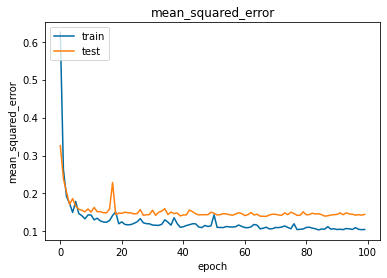

2197/2197 [==============================] - 0s 36us/sample - loss: 0.1449 - mean_squared_error: 0.1449
MSE: 0.14491906762123108
Mean squared error: 0.14491907
Coefficient of determination: 0.8621


In [210]:
#std_5

# for std_4:

#adding more layer:

X_train, X_test, y_train, y_test = train_test_split(
    features_std5, bigdata51[0], test_size=0.3, random_state=0)



# 1 layer network:

# construct the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(40, input_dim=68, activation='relu'),
    tf.keras.layers.Dense(1)
])
print(model.summary())

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.MeanSquaredError()])
print("Start training")
# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=100)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# evaluate the model
mse = model.evaluate(X_test, y_test)[1]
print(f'MSE: {mse}')
y_pred=model.predict(X_test)
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(y_test, y_pred))

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 40)                2920      
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 41        
Total params: 2,961
Trainable params: 2,961
Non-trainable params: 0
_________________________________________________________________
None
Start training
Train on 3803 samples, validate on 1631 samples
Epoch 1/100
3803/3803 [==============================] - 1s 246us/sample - loss: 0.5500 - mean_squared_error: 0.5500 - val_loss: 0.9312 - val_mean_squared_error: 0.9312
Epoch 2/100
3803/3803 [==============================] - 0s 87us/sample - loss: 0.2464 - mean_squared_error: 0.2464 - val_loss: 0.7714 - val_mean_squared_error: 0.7714
Epoch 3/100
3803/3803 [==============================] - 0s 94us/sample - loss: 0.1879 - mean_squared_error:

3803/3803 [==============================] - 0s 87us/sample - loss: 0.1074 - mean_squared_error: 0.1074 - val_loss: 0.7857 - val_mean_squared_error: 0.7857
Epoch 46/100
3803/3803 [==============================] - 0s 86us/sample - loss: 0.1064 - mean_squared_error: 0.1064 - val_loss: 0.7787 - val_mean_squared_error: 0.7787
Epoch 47/100
3803/3803 [==============================] - 0s 85us/sample - loss: 0.1067 - mean_squared_error: 0.1067 - val_loss: 0.7793 - val_mean_squared_error: 0.7793
Epoch 48/100
3803/3803 [==============================] - 0s 86us/sample - loss: 0.1092 - mean_squared_error: 0.1092 - val_loss: 0.7225 - val_mean_squared_error: 0.7225
Epoch 49/100
3803/3803 [==============================] - 0s 98us/sample - loss: 0.1073 - mean_squared_error: 0.1073 - val_loss: 0.8359 - val_mean_squared_error: 0.8359
Epoch 50/100
3803/3803 [==============================] - 0s 87us/sample - loss: 0.1075 - mean_squared_error: 0.1075 - val_loss: 0.8162 - val_mean_squared_error: 0.8162

3803/3803 [==============================] - 0s 71us/sample - loss: 0.1005 - mean_squared_error: 0.1005 - val_loss: 0.6643 - val_mean_squared_error: 0.6643
Epoch 94/100
3803/3803 [==============================] - 0s 69us/sample - loss: 0.1017 - mean_squared_error: 0.1017 - val_loss: 0.7385 - val_mean_squared_error: 0.7385
Epoch 95/100
3803/3803 [==============================] - 0s 73us/sample - loss: 0.1028 - mean_squared_error: 0.1028 - val_loss: 0.6088 - val_mean_squared_error: 0.6088
Epoch 96/100
3803/3803 [==============================] - 0s 71us/sample - loss: 0.1001 - mean_squared_error: 0.1001 - val_loss: 0.6685 - val_mean_squared_error: 0.6685
Epoch 97/100
3803/3803 [==============================] - 0s 69us/sample - loss: 0.1004 - mean_squared_error: 0.1004 - val_loss: 0.6356 - val_mean_squared_error: 0.6356
Epoch 98/100
3803/3803 [==============================] - 0s 68us/sample - loss: 0.1032 - mean_squared_error: 0.1032 - val_loss: 0.6077 - val_mean_squared_error: 0.6077

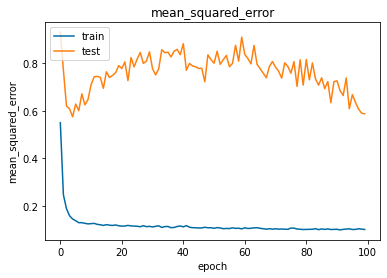

1631/1631 [==============================] - 0s 30us/sample - loss: 0.5875 - mean_squared_error: 0.5875
MSE: 0.5875346064567566
Mean squared error: 0.58753465
Coefficient of determination: 0.3881


In [212]:
#std_6

# for std_4:

#adding more layer:

X_train, X_test, y_train, y_test = train_test_split(
    features_std6, bigdata61[0], test_size=0.3, random_state=0)



# 1 layer network:

# construct the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(40, input_dim=72, activation='relu'),
    tf.keras.layers.Dense(1)
])
print(model.summary())

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.MeanSquaredError()])
print("Start training")
# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=100)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# evaluate the model
mse = model.evaluate(X_test, y_test)[1]
print(f'MSE: {mse}')
y_pred=model.predict(X_test)
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(y_test, y_pred))

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 200)               14600     
_________________________________________________________________
dense_71 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_72 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_73 (Dense)             (None, 1)                 201       
Total params: 95,201
Trainable params: 95,201
Non-trainable params: 0
_________________________________________________________________
None
Start training
Train on 3803 samples, validate on 1631 samples
Epoch 1/100
3803/3803 [==============================] - 1s 345us/sample - loss: 0.3576 - mean_squared_error: 0.3576 - val_loss: 0.1798 - val_mean_squared_error: 0.1798
Epoch 2/10

3803/3803 [==============================] - 1s 190us/sample - loss: 0.0702 - mean_squared_error: 0.0702 - val_loss: 0.1424 - val_mean_squared_error: 0.1424
Epoch 44/100
3803/3803 [==============================] - 1s 181us/sample - loss: 0.0651 - mean_squared_error: 0.0651 - val_loss: 0.1288 - val_mean_squared_error: 0.1288
Epoch 45/100
3803/3803 [==============================] - 1s 153us/sample - loss: 0.0619 - mean_squared_error: 0.0619 - val_loss: 0.1294 - val_mean_squared_error: 0.1294
Epoch 46/100
3803/3803 [==============================] - 1s 167us/sample - loss: 0.0698 - mean_squared_error: 0.0698 - val_loss: 0.1425 - val_mean_squared_error: 0.1425
Epoch 47/100
3803/3803 [==============================] - 1s 161us/sample - loss: 0.0638 - mean_squared_error: 0.0638 - val_loss: 0.1347 - val_mean_squared_error: 0.1347
Epoch 48/100
3803/3803 [==============================] - 1s 154us/sample - loss: 0.0686 - mean_squared_error: 0.0686 - val_loss: 0.1625 - val_mean_squared_error: 

3803/3803 [==============================] - 1s 166us/sample - loss: 0.0330 - mean_squared_error: 0.0330 - val_loss: 0.1720 - val_mean_squared_error: 0.1720
Epoch 92/100
3803/3803 [==============================] - 1s 180us/sample - loss: 0.0686 - mean_squared_error: 0.0686 - val_loss: 0.1724 - val_mean_squared_error: 0.1724
Epoch 93/100
3803/3803 [==============================] - 1s 173us/sample - loss: 0.0401 - mean_squared_error: 0.0401 - val_loss: 0.1506 - val_mean_squared_error: 0.1506
Epoch 94/100
3803/3803 [==============================] - 1s 177us/sample - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 0.1550 - val_mean_squared_error: 0.1550
Epoch 95/100
3803/3803 [==============================] - 1s 163us/sample - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.1707 - val_mean_squared_error: 0.1707
Epoch 96/100
3803/3803 [==============================] - 1s 157us/sample - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.1518 - val_mean_squared_error: 

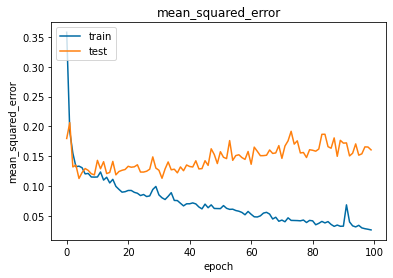

1631/1631 [==============================] - 0s 57us/sample - loss: 0.1607 - mean_squared_error: 0.1607
MSE: 0.16067327558994293
Mean squared error: 0.16067329
Coefficient of determination: 0.8327


In [213]:
#std_6

# for std_4:

#adding more layer:

X_train, X_test, y_train, y_test = train_test_split(
    features_std6, bigdata61[0], test_size=0.3, random_state=0)



# 1 layer network:

# construct the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(200, input_dim=72, activation='relu'),
    tf.keras.layers.Dense(200, input_dim=72, activation='relu'),
    tf.keras.layers.Dense(200, input_dim=72, activation='relu'),
    tf.keras.layers.Dense(1)
])
print(model.summary())

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.MeanSquaredError()])
print("Start training")
# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=100)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# evaluate the model
mse = model.evaluate(X_test, y_test)[1]
print(f'MSE: {mse}')
y_pred=model.predict(X_test)
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(y_test, y_pred))

In [ ]:
#Tring swish:

#increasing layers # on the best net :
#Neural net:


X_train, X_test, y_train, y_test = train_test_split(
    principle_components_21, bigdata21[0], test_size=0.3, random_state=0)



# 1 layer network:

# construct the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(40, input_dim=40, activation='relu'),
    tf.keras.layers.Dense(40, input_dim=40, activation='relu'),
    tf.keras.layers.Dense(1)
])
print(model.summary())

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.MeanSquaredError()])
print("Start training")
# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    batch_size = 200, epochs=200)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# evaluate the model
mse = model.evaluate(X_test, y_test)[1]
print(f'MSE: {mse}')
y_pred=model.predict(X_test)
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(y_test, y_pred))


I cant really explain this. Moving on to

In [ ]:
#Neural net:


X_train, X_test, y_train, y_test = train_test_split(
    principle_components_21, bigdata21[0], test_size=0.3, random_state=0)



# 1 layer network:

# construct the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, input_dim=40, activation='relu'),
    tf.keras.layers.Dense(1)
])
print(model.summary())

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.MeanSquaredError()])
print("Start training")
# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# evaluate the model
mse = model.evaluate(X_test, y_test)[1]
print(f'MSE: {mse}')
y_pred=model.predict(X_test)
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(y_test, y_pred))


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 60)                3420      
_________________________________________________________________
dense_14 (Dense)             (None, 60)                3660      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 61        
Total params: 7,141
Trainable params: 7,141
Non-trainable params: 0
_________________________________________________________________
None
Start training
Train on 10291 samples, validate on 4411 samples
Epoch 1/100
10291/10291 [==============================] - 2s 203us/sample - loss: 0.2894 - mean_squared_error: 0.2894 - val_loss: 0.2167 - val_mean_squared_error: 0.2167
Epoch 2/100
10291/10291 [==============================] - 1s 96us/sample - loss: 0.1610 - mean_squared_error: 0.1610 - val_loss: 0.1902 - val

10291/10291 [==============================] - 1s 76us/sample - loss: 0.1081 - mean_squared_error: 0.1081 - val_loss: 0.1550 - val_mean_squared_error: 0.1550
Epoch 45/100
10291/10291 [==============================] - 1s 93us/sample - loss: 0.1067 - mean_squared_error: 0.1067 - val_loss: 0.1579 - val_mean_squared_error: 0.1579
Epoch 46/100
10291/10291 [==============================] - 1s 94us/sample - loss: 0.1063 - mean_squared_error: 0.1063 - val_loss: 0.1535 - val_mean_squared_error: 0.1535
Epoch 47/100
10291/10291 [==============================] - 1s 99us/sample - loss: 0.1082 - mean_squared_error: 0.1082 - val_loss: 0.1582 - val_mean_squared_error: 0.1582
Epoch 48/100
10291/10291 [==============================] - 1s 96us/sample - loss: 0.1062 - mean_squared_error: 0.1062 - val_loss: 0.1575 - val_mean_squared_error: 0.1575
Epoch 49/100
10291/10291 [==============================] - 1s 91us/sample - loss: 0.1058 - mean_squared_error: 0.1058 - val_loss: 0.1614 - val_mean_squared_e

Epoch 92/100
10291/10291 [==============================] - 1s 96us/sample - loss: 0.0977 - mean_squared_error: 0.0977 - val_loss: 0.1580 - val_mean_squared_error: 0.1580
Epoch 93/100
10291/10291 [==============================] - 1s 93us/sample - loss: 0.0963 - mean_squared_error: 0.0963 - val_loss: 0.1613 - val_mean_squared_error: 0.1613
Epoch 94/100
10291/10291 [==============================] - 1s 96us/sample - loss: 0.0972 - mean_squared_error: 0.0972 - val_loss: 0.1641 - val_mean_squared_error: 0.1641
Epoch 95/100
10291/10291 [==============================] - 1s 97us/sample - loss: 0.0970 - mean_squared_error: 0.0970 - val_loss: 0.1667 - val_mean_squared_error: 0.1667
Epoch 96/100
10291/10291 [==============================] - 1s 93us/sample - loss: 0.0942 - mean_squared_error: 0.0942 - val_loss: 0.1650 - val_mean_squared_error: 0.1650
Epoch 97/100
10291/10291 [==============================] - 1s 93us/sample - loss: 0.0959 - mean_squared_error: 0.0959 - val_loss: 0.1634 - val_m

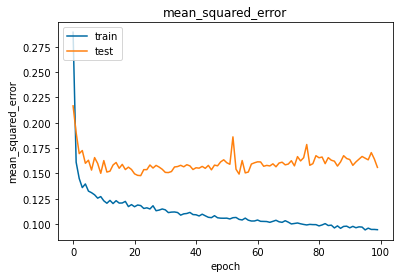

4411/4411 [==============================] - 0s 42us/sample - loss: 0.1559 - mean_squared_error: 0.1559
MSE: 0.1559426188468933
Mean squared error: 0.15594261
Coefficient of determination: 0.8539


In [77]:
#Go up in neurons number


#Neural net:


X_train, X_test, y_train, y_test = train_test_split(
    features_std2, bigdata21[0], test_size=0.3, random_state=0)



# 1 layer network:

# construct the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(60, input_dim=56, activation='relu'),
    tf.keras.layers.Dense(60, input_dim=56, activation='relu'),
    tf.keras.layers.Dense(1)
])
print(model.summary())

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.MeanSquaredError()])
print("Start training")
# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# evaluate the model
mse = model.evaluate(X_test, y_test)[1]
print(f'MSE: {mse}')
y_pred=model.predict(X_test)
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(y_test, y_pred))


In [26]:
temps = np.array(temps)
temps_min=np.array(temps_min)
temps_max = np.array(temps_max)
En_con = np.array(En_con)
month_arr = np.array(month_arr)
l_En_con = np.array(l_En_con)
br_arr = np.array(br_arr)
num_occupants= np.array(num_occupants)
dishwasher =np.array(dishwasher)
freezer =np.array(freezer)
fridge_freezer =np.array(fridge_freezer)
refrigerator =np.array(refrigerator)
tumble_dryer =np.array(tumble_dryer)
washing_machine =np.array(washing_machine)
game_console = np.array(game_console)
laptop =np.array(laptop)
pc =np.array(pc)
router =np.array(router)
set_top_box =np.array(set_top_box)
tablet =np.array(tablet)
tv =np.array(tv)
dwelling_type_bungalow=np.array(dwelling_type_bungalow)
dwelling_type_detached_house=np.array(dwelling_type_detached_house)
dwelling_type_flat=np.array(dwelling_type_flat)
dwelling_type_semi_detached_house=np.array(dwelling_type_semi_detached_house)
dwelling_type_terraced_house=np.array(dwelling_type_terraced_house)
heating_fuel_elec=np.array(heating_fuel_elec)
heating_fuel_gas= np.array(heating_fuel_gas)
heating_fuel_lpg_oil=np.array(heating_fuel_lpg_oil)
heating_fuel_other= np.array(heating_fuel_other)
hot_water_fuel_elec=np.array(hot_water_fuel_elec)
hot_water_fuel_gas=np.array(hot_water_fuel_gas)
hot_water_fuel_other=np.array(hot_water_fuel_other)
boiler_age_new= np.array(boiler_age_new)
boiler_age_old= np.array(boiler_age_old)
loft_insulation_n=np.array(loft_insulation_n)
loft_insulation_y= np.array(loft_insulation_y)
wall_insulation_n=np.array(wall_insulation_n)
wall_insulation_not_sure=np.array(wall_insulation_not_sure)
wall_insulation_y_cavity= np.array(wall_insulation_y_cavity)
wall_insulation_y_external= np.array(wall_insulation_y_external)
wall_insulation_y_internal= np.array(wall_insulation_y_internal)
heating_temperature_18_to_20=np.array(heating_temperature_18_to_20)
heating_temperature_above_20=np.array(heating_temperature_above_20)
heating_temperature_below_18=np.array(heating_temperature_below_18)
heating_temperature_not_sure= np.array(heating_temperature_not_sure)
efficient_lighting_percentage_0_to_25=np.array(efficient_lighting_percentage_0_to_25)
efficient_lighting_percentage_25_to_50=np.array(efficient_lighting_percentage_25_to_50)
efficient_lighting_percentage_50_to_75=np.array(efficient_lighting_percentage_50_to_75)
efficient_lighting_percentage_75_to_100=np.array(efficient_lighting_percentage_75_to_100)

In [27]:
features = np.column_stack((temps, temps_min, temps_max, month_arr, l_En_con, br_arr, num_occupants,dishwasher, freezer, fridge_freezer,
refrigerator, tumble_dryer, washing_machine,game_console, laptop,pc, router, set_top_box, tablet, tv, 
dwelling_type_bungalow, dwelling_type_detached_house, dwelling_type_flat, dwelling_type_semi_detached_house,
dwelling_type_terraced_house, heating_fuel_elec, heating_fuel_gas, heating_fuel_lpg_oil, heating_fuel_other,
hot_water_fuel_elec, hot_water_fuel_gas, hot_water_fuel_other, boiler_age_new, boiler_age_old, 
loft_insulation_n, loft_insulation_y, wall_insulation_n, wall_insulation_not_sure, wall_insulation_y_cavity
,wall_insulation_y_external, wall_insulation_y_internal, heating_temperature_18_to_20, 
heating_temperature_above_20, heating_temperature_below_18, heating_temperature_not_sure,
efficient_lighting_percentage_0_to_25, efficient_lighting_percentage_25_to_50, 
efficient_lighting_percentage_50_to_75, efficient_lighting_percentage_75_to_100))

In [28]:
features.shape

(17826, 49)

In [29]:
features_df = pd.DataFrame( features)
features_df.columns = ['temps', 'temps_min', 'temps_max','month_arr',
                       'l_En_con', 'br_arr', 'num_occupants', 'dishwasher', 'freezer' ,
                       'fridge_freezer', 'refrigerator', 'tumble_dryer', 'washing_machine' ,
                       'game_console', 'laptop','pc', 'router', 'set_top_box', 'tablet',
                       'tv', 'dwelling_type_bungalow',' dwelling_type_detached_house',
                       'dwelling_type_flat',' dwelling_type_semi_detached_house',
                       'dwelling_type_terraced_house', 'heating_fuel_elec', 'heating_fuel_gas',
                       'heating_fuel_lpg_oil', 'heating_fuel_other', 'hot_water_fuel_elec',
                       'hot_water_fuel_gas','hot_water_fuel_other', 'boiler_age_new',
                       'boiler_age_old', 'loft_insulation_n', 'loft_insulation_y', 'wall_insulation_n',
                       'wall_insulation_not_sure', 'wall_insulation_y_cavity', 
                       'wall_insulation_y_external', 'wall_insulation_y_internal',
                       'heating_temperature_18_to_20', 'heating_temperature_above_20',
                       'heating_temperature_below_18', 'heating_temperature_not_sure',
                       'efficient_lighting_percentage_0_to_25', 
                       'efficient_lighting_percentage_25_to_50',
                       'efficient_lighting_percentage_50_to_75',
                       'efficient_lighting_percentage_75_to_100']
features_df

,temps,temps_min,temps_max,month_arr,l_En_con,br_arr,num_occupants,dishwasher,freezer,fridge_freezer,...,wall_insulation_y_external,wall_insulation_y_internal,heating_temperature_18_to_20,heating_temperature_above_20,heating_temperature_below_18,heating_temperature_not_sure,efficient_lighting_percentage_0_to_25,efficient_lighting_percentage_25_to_50,efficient_lighting_percentage_50_to_75,efficient_lighting_percentage_75_to_100
0,4.681048,2.125806,7.116129,12.0,0.146783,3.112426,2.358633,0.571851,0.711979,0.749008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.675134,2.532258,7.038710,12.0,0.160121,3.112426,2.358633,0.571851,0.711979,0.749008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6.883065,4.677419,8.967742,12.0,0.232831,3.112426,2.358633,0.571851,0.711979,0.749008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.883065,4.677419,8.967742,12.0,0.450908,3.112426,2.358633,0.571851,0.711979,0.749008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.767608,2.429032,7.080645,12.0,0.275016,3.112426,2.358633,0.571851,0.711979,0.749008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17821,15.780739,11.870968,19.774194,8.0,0.152646,3.112426,2.358633,0.571851,0.711979,0.749008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17822,13.146316,9.833333,16.966667,9.0,0.155822,3.112426,2.358633,0.571851,0.711979,0.749008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17823,12.147265,9.225806,15.225806,10.0,0.167454,3.112426,2.358633,0.571851,0.711979,0.749008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17824,6.791667,3.866667,9.366667,11.0,0.229839,3.112426,2.358633,0.571851,0.711979,0.749008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
for i in features_df.columns:
    print(i, "\n",  features_df[i].value_counts(), "\n")
    #print each column data.

temps 
 5.075672     307
7.063461     281
4.245296     265
12.712231    258
4.664785     254
            ... 
6.295766       1
8.825741       1
12.769489      1
4.767122       1
14.814247      1
Name: temps, Length: 959, dtype: int64 

temps_min 
 2.341935     307
4.073333     281
1.541935     265
9.838710     258
2.200000     254
            ... 
11.470000      1
9.287097       1
11.629032      1
9.045161       1
7.551613       1
Name: temps_min, Length: 933, dtype: int64 

temps_max 
 7.577419     315
9.950000     287
6.809677     268
15.467742    258
6.858065     254
            ... 
19.319355      1
8.950000       1
22.083871      1
21.225806      1
8.063333       1
Name: temps_max, Length: 941, dtype: int64 

month_arr 
 12.0    2975
11.0    2695
10.0    2433
9.0     2163
8.0     1892
7.0     1622
6.0     1351
5.0     1079
4.0      808
3.0      539
2.0      269
Name: month_arr, dtype: int64 

l_En_con 
 0.000000    52
0.239763     2
0.213623     2
0.045893     2
0.125769     2
   

In [45]:
#ordinary linear regression:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    features , En_con, test_size=0.3, random_state=0)

linreg = LinearRegression()
linreg.fit(X_train,y_train)
#print(linreg.predict(x[:10]))

y_pred = linreg.predict(X_test)
#err = np.abs(p - y_test_norm)


#The coefficients
print('Coefficients: \n', linreg.coef_)
print('Intercept: {}'.format(linreg.intercept_))
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))

print('RMSE: %.8f'
      % np.sqrt(mean_squared_error(y_test, y_pred)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.3f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [ 2.62934677e-03 -1.69037222e-03 -1.56737786e-03  6.89043350e-03
  1.01092745e+00 -1.18788357e-03  1.14256758e-02  1.57535723e-02
 -9.52783599e-03 -1.96063291e-02  4.12748276e-03  1.02702010e-03
 -3.70202921e-03  2.48846725e-03 -4.96147965e-03 -5.48559586e-03
 -1.39949434e-02 -6.42186616e-03  5.91486902e-05  3.52657988e-03
 -2.15290841e-03 -3.27010153e-03  5.83639169e-04 -2.47224852e-03
 -1.37358598e-03 -6.26467495e-02 -1.06606260e-02  5.49811581e-02
  1.68398879e-02  9.19364625e-02  1.41172061e-02 -3.10607919e-02
 -1.61469748e-02 -3.66926156e-03 -1.45046958e-02  1.53259740e-03
 -3.07987352e-02 -4.88729909e-02 -3.63210024e-02 -5.00063161e-02
 -7.84081386e-02  6.71039787e-02  5.63135559e-02  3.80452753e-02
  3.58562849e-02 -2.24036806e-02 -4.24153088e-02 -1.17001176e-02
 -2.07967706e-02]
Intercept: -0.030479887888063578
Mean squared error: 0.00276016
RMSE: 0.05253726
Coefficient of determination: 0.850


Dimensionality reduction techniques should probably be used.. specially that the data is very sparse. 

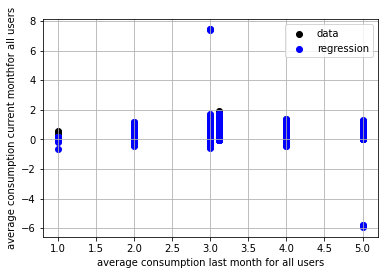

In [32]:

plt.scatter(X_test[:, 5], y_test,  color='black', label = "data")
plt.scatter(X_test[:, 5], y_pred, color='blue',  label = "regression")
plt.xlabel("average consumption last month for all users")
plt.ylabel("average consumption current monthfor all users")
plt.legend()
plt.grid()
plt.show()

Text(0, 0.5, 'average consumption current monthfor all users')

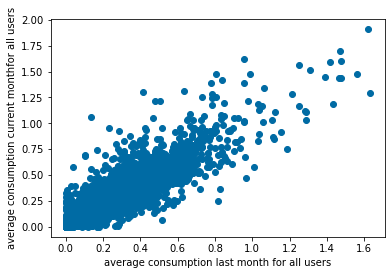

In [33]:
plt.scatter(l_En_con,En_con)
plt.xlabel("average consumption last month for all users")
plt.ylabel("average consumption current monthfor all users")


Discarding all one-hot-encoded values except for dwelling type:

In [34]:
temps_=[]
temps_min_=[]
temps_max_=[]
En_con_=[]
month_arr_=[]
br_arr_=[]
l_En_con_=[]

num_occupants_=[]
dishwasher_ =[]
freezer_ =[]
fridge_freezer_ =[]
refrigerator_ =[]
tumble_dryer_ =[]
washing_machine_ =[]
game_console_ =[]
laptop_ =[]
pc_ =[]
router_ =[]
set_top_box_ =[]
tablet_ =[]
tv_ =[]

#one-hot-encoded values:

dwelling_type_bungalow_=[]
dwelling_type_detached_house_=[]
dwelling_type_flat_=[]
dwelling_type_semi_detached_house_=[]
dwelling_type_terraced_house_=[]


num_occupants__ = info_numeric_multimputed_df["num_occupants"]
dishwasher__ = info_numeric_multimputed_df["dishwasher"]
freezer__ = info_numeric_multimputed_df["freezer"]
fridge_freezer__ = info_numeric_multimputed_df["fridge_freezer"]
refrigerator__ = info_numeric_multimputed_df["refrigerator"]
tumble_dryer__ = info_numeric_multimputed_df["tumble_dryer"]
washing_machine__ = info_numeric_multimputed_df["washing_machine"]
game_console__ = info_numeric_multimputed_df["game_console"]
laptop__ = info_numeric_multimputed_df["laptop"]
pc__ = info_numeric_multimputed_df["pc"]
router__ = info_numeric_multimputed_df["router"]
set_top_box__= info_numeric_multimputed_df["set_top_box"]
tablet__ = info_numeric_multimputed_df["tablet"]
tv__ = info_numeric_multimputed_df["tv"]       


NaN_t=1200


for i in range(df.shape[0]): # loop over all users
    
    meter=df.iloc[i] # = row number i  
    
    fmf=False;        # first month found
        
    for m in range (1,13): # loop over all months
        begin_index, end_index =get_monthi(m)     #get index of beginning and end of month
        month=meter[begin_index:end_index]        #data for the month m for the row user (row) i
        
        brinfo_filled_row = brinfo_filled[i:i+1]
        num_occupants_row =num_occupants__[i:i+1]
        dishwasher_row = dishwasher__[i:i+1]
        freezer_row = freezer__[i:i+1]
        fridge_freezer_row = fridge_freezer__[i:i+1]
        refrigerator_row = refrigerator__[i:i+1]
        tumble_dryer_row = tumble_dryer__[i:i+1]
        washing_machine_row = washing_machine__[i:i+1]
        game_console_row = game_console__[i:i+1]
        laptop_row =  laptop__[i:i+1]
        pc_row = pc__[i:i+1]
        router_row = router__[i:i+1]
        set_top_box_row = set_top_box__[i:i+1]
        tablet_row = tablet__[i:i+1]
        tv_row = tv__[i:i+1]    
        
        
        dew_type_row = dwelling_type[i:i+1]
        
        
        # Check if months have numeric values otherwise discard the month for this user.       
        n_NaN=month.isnull().sum() #Number of NaN's
        if n_NaN<NaN_t:
            if fmf:
                #current month
                temps_.append(get_mean_temp(weather_avg_sorted.iloc[i:i+1],m))
                temps_min_.append(get_mean_temp(weather_min_sorted.iloc[i:i+1],m))
                temps_max_.append(get_mean_temp(weather_max_sorted.iloc[i:i+1],m))
                En_con_.append(month.mean())
                month_arr_.append(m) # = number of data points = the months that passed threshold for each user.
                br_arr_.append(brinfo_filled_row[0])
                num_occupants_.append(num_occupants_row[0])
                dishwasher_.append(dishwasher_row[0])
                freezer_.append(freezer_row[0])
                fridge_freezer_.append(fridge_freezer_row[0])
                refrigerator_.append(refrigerator_row[0])
                tumble_dryer_.append(tumble_dryer_row[0])
                washing_machine_.append(washing_machine_row[0])
                game_console_.append(game_console_row[0])
                laptop_.append(laptop_row[0])
                pc_.append(pc_row[0])
                router_.append(router_row[0])
                set_top_box_.append(set_top_box_row[0])
                tablet_.append(tablet_row[0])
                tv_.append(tv_row[0])           
                               
                #one-hot-encoded-values:                
                dwelling_type_bungalow_.append(dew_type_row.iloc[0, 0])
                dwelling_type_detached_house_.append(dew_type_row.iloc[0, 1])
                dwelling_type_flat_.append(dew_type_row.iloc[0, 2])
                dwelling_type_semi_detached_house_.append(dew_type_row.iloc[0, 3])
                dwelling_type_terraced_house_.append(dew_type_row.iloc[0, 4])
                
                
                #last month
                l_begin_index,l_end_index=get_monthi(m-1)
                last_month=meter[l_begin_index:l_end_index] #load last month
                l_En_con_.append(last_month.mean())
            else:
                fmf=True

In [35]:
temps_ = np.array(temps_)
temps_min_=np.array(temps_min_ )
temps_max_  = np.array(temps_max_)
En_con_ = np.array(En_con_)
month_arr_ = np.array(month_arr_)
l_En_con_ = np.array(l_En_con_)
br_arr_ = np.array(br_arr_)
num_occupants_= np.array(num_occupants_)
dishwasher_ =np.array(dishwasher_)
freezer_ =np.array(freezer_)
fridge_freezer_ =np.array(fridge_freezer_)
refrigerator_ =np.array(refrigerator_)
tumble_dryer_ =np.array(tumble_dryer_)
washing_machine_ =np.array(washing_machine_)
game_console_ = np.array(game_console_)
laptop_ =np.array(laptop_)
pc_ =np.array(pc_)
router_ =np.array(router_)
set_top_box_ =np.array(set_top_box_)
tablet_ =np.array(tablet_)
tv_ =np.array(tv_)
dwelling_type_bungalow_=np.array(dwelling_type_bungalow_)
dwelling_type_detached_house_=np.array(dwelling_type_detached_house_)
dwelling_type_flat_=np.array(dwelling_type_flat_)
dwelling_type_semi_detached_house_=np.array(dwelling_type_semi_detached_house_)
dwelling_type_terraced_house_=np.array(dwelling_type_terraced_house_)


features_ = np.column_stack((temps_, temps_min_, temps_max_, month_arr_, l_En_con_,
                             br_arr_, num_occupants_,dishwasher_, freezer_, fridge_freezer_,
refrigerator_, tumble_dryer_, washing_machine_,game_console_, laptop_,pc_, router_,
                             set_top_box_, tablet_, tv_, dwelling_type_bungalow_,
                             dwelling_type_detached_house_, dwelling_type_flat_,
                             dwelling_type_semi_detached_house_,
dwelling_type_terraced_house_))

In [36]:
features_df_ = pd.DataFrame(features_)
features_df_

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,4.681048,2.125806,7.116129,12.0,0.146783,3.112426,2.358633,0.571851,0.711979,0.749008,...,0.816566,1.024378,1.07675,1.227534,1.991117,0.0,0.0,0.0,0.0,0.0
1,4.675134,2.532258,7.038710,12.0,0.160121,3.112426,2.358633,0.571851,0.711979,0.749008,...,0.816566,1.024378,1.07675,1.227534,1.991117,0.0,0.0,0.0,0.0,0.0
2,6.883065,4.677419,8.967742,12.0,0.232831,3.112426,2.358633,0.571851,0.711979,0.749008,...,0.816566,1.024378,1.07675,1.227534,1.991117,0.0,0.0,0.0,0.0,0.0
3,6.883065,4.677419,8.967742,12.0,0.450908,3.112426,2.358633,0.571851,0.711979,0.749008,...,0.816566,1.024378,1.07675,1.227534,1.991117,0.0,0.0,0.0,0.0,0.0
4,4.767608,2.429032,7.080645,12.0,0.275016,3.112426,2.358633,0.571851,0.711979,0.749008,...,0.816566,1.024378,1.07675,1.227534,1.991117,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17821,15.780739,11.870968,19.774194,8.0,0.152646,3.112426,2.358633,0.571851,0.711979,0.749008,...,0.816566,1.024378,1.07675,1.227534,1.991117,0.0,0.0,0.0,0.0,0.0
17822,13.146316,9.833333,16.966667,9.0,0.155822,3.112426,2.358633,0.571851,0.711979,0.749008,...,0.816566,1.024378,1.07675,1.227534,1.991117,0.0,0.0,0.0,0.0,0.0
17823,12.147265,9.225806,15.225806,10.0,0.167454,3.112426,2.358633,0.571851,0.711979,0.749008,...,0.816566,1.024378,1.07675,1.227534,1.991117,0.0,0.0,0.0,0.0,0.0
17824,6.791667,3.866667,9.366667,11.0,0.229839,3.112426,2.358633,0.571851,0.711979,0.749008,...,0.816566,1.024378,1.07675,1.227534,1.991117,0.0,0.0,0.0,0.0,0.0


In [37]:
features_df #all features

,temps,temps_min,temps_max,month_arr,l_En_con,br_arr,num_occupants,dishwasher,freezer,fridge_freezer,...,wall_insulation_y_external,wall_insulation_y_internal,heating_temperature_18_to_20,heating_temperature_above_20,heating_temperature_below_18,heating_temperature_not_sure,efficient_lighting_percentage_0_to_25,efficient_lighting_percentage_25_to_50,efficient_lighting_percentage_50_to_75,efficient_lighting_percentage_75_to_100
0,4.681048,2.125806,7.116129,12.0,0.146783,3.112426,2.358633,0.571851,0.711979,0.749008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.675134,2.532258,7.038710,12.0,0.160121,3.112426,2.358633,0.571851,0.711979,0.749008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6.883065,4.677419,8.967742,12.0,0.232831,3.112426,2.358633,0.571851,0.711979,0.749008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.883065,4.677419,8.967742,12.0,0.450908,3.112426,2.358633,0.571851,0.711979,0.749008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.767608,2.429032,7.080645,12.0,0.275016,3.112426,2.358633,0.571851,0.711979,0.749008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17821,15.780739,11.870968,19.774194,8.0,0.152646,3.112426,2.358633,0.571851,0.711979,0.749008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17822,13.146316,9.833333,16.966667,9.0,0.155822,3.112426,2.358633,0.571851,0.711979,0.749008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17823,12.147265,9.225806,15.225806,10.0,0.167454,3.112426,2.358633,0.571851,0.711979,0.749008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17824,6.791667,3.866667,9.366667,11.0,0.229839,3.112426,2.358633,0.571851,0.711979,0.749008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
#ordinary linear regression:
from sklearn.model_selection import train_test_split
X_train_, X_test_, y_train_, y_test_ = train_test_split(
    features_ , En_con_, test_size=0.3, random_state=0)

linreg_ = LinearRegression()
linreg_.fit(X_train_,y_train_)
#print(linreg.predict(x[:10]))

y_pred_ = linreg_.predict(X_test_)
#err = np.abs(p - y_test_norm)


#The coefficients
print('Coefficients: \n', linreg_.coef_)
print('Intercept: {}'.format(linreg_.intercept_))
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_test_, y_pred_))

print('RMSE: %.8f'
      % np.sqrt(mean_squared_error(y_test_, y_pred_)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.3f'
      % r2_score(y_test_, y_pred_))

Coefficients: 
 [ 2.30309683e-03 -1.48159161e-03 -1.42979249e-03  6.88555774e-03
  1.01239502e+00  2.36997519e-03  4.36842550e-03  1.48494034e-02
  2.48919575e-03 -2.23571041e-02 -1.09296456e-02 -1.93677326e-03
  9.01682047e-03 -8.72013751e-03 -6.03096782e-03 -6.94363649e-04
 -8.76009588e-03 -4.07668810e-03  2.98449122e-03  8.36889184e-04
 -1.48954653e-03 -3.86709383e-03  5.71061986e-04 -2.49645845e-03
 -6.90954430e-04]
Intercept: -0.03533401686867993
Mean squared error: 0.00274003
RMSE: 0.05234532
Coefficient of determination: 0.851


Also R^2 = 1, we need dim. red.

### PCA

In [39]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features_standardized=StandardScaler().fit_transform(features_) 

pca=PCA(n_components=10)
principle_components=pca.fit_transform(features_standardized)

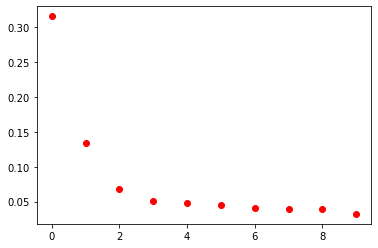

In [40]:
plt.plot(pca.explained_variance_ratio_,'ro')


In [41]:
var_sum = 0
counter = 0
for i in pca.explained_variance_ratio_:
    counter +=1
    var_sum = var_sum + i
    if var_sum > 0.7:
        print("the number of PC components needed to represent ~70% of variability is ", counter)
        break

the number of PC components needed to represent ~70% of variability is  7


In [42]:
var_sum = 0
counter = 0
for i in pca.explained_variance_ratio_:
    counter +=1
    var_sum = var_sum + i
    
print("the percentage of var explained in 10 PC components is ", var_sum)
        

the percentage of var explained in 10 PC components is  0.813630001484706


In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features_standardized=StandardScaler().fit_transform(features_) 

pca=PCA(n_components=25)
principle_components=pca.fit_transform(features_standardized)

var_sum = 0
counter = 0
for i in pca.explained_variance_ratio_:
    counter +=1
    var_sum = var_sum + i
    print("the percentage of var explained in", counter, "PC components is ", var_sum)

plt.plot(pca.explained_variance_ratio_,'ro')    
        

NameError: name 'features_' is not defined

We stick with 4 components.

In [16]:
features_standardized=StandardScaler().fit_transform(features_) 

pca=PCA(n_components=4)
principle_components=pca.fit_transform(features_standardized)


NameError: name 'StandardScaler' is not defined

In [49]:
principle_components_df = pd.DataFrame(principle_components)
principle_components_df

,0,1,2,3
0,0.062724,2.756708,0.052594,0.027356
1,0.070137,2.723435,0.049070,0.019709
2,0.105743,2.019751,0.027057,-0.032081
3,0.235669,2.230954,-0.032367,-0.140707
4,0.138597,2.832787,0.017680,-0.037533
...,...,...,...,...
17821,0.017590,-1.828733,0.009256,-0.042026
17822,0.030521,-0.788252,0.018526,-0.029231
17823,0.043373,-0.252016,0.024137,-0.030968
17824,0.102774,1.965297,0.020452,-0.025106


In [50]:
#ordinary linear regression:
from sklearn.model_selection import train_test_split
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    principle_components, En_con_, test_size=0.3, random_state=0)

linreg_p = LinearRegression()
linreg_p.fit(X_train_p,y_train_p)
#print(linreg.predict(x[:10]))

y_pred_p = linreg_p.predict(X_test_p)
#err = np.abs(p - y_test_norm)


#The coefficients
print('Coefficients: \n', linreg_p.coef_)
print('Intercept: {}'.format(linreg_p.intercept_))
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_test_p, y_pred_p))

print('RMSE: %.8f'
      % np.sqrt(mean_squared_error(y_test_p, y_pred_p)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.3f'
      % r2_score(y_test_p, y_pred_p))

Coefficients: 
 [ 0.01026708  0.02399915 -0.00523977 -0.00870945]
Intercept: 0.19299721705664635
Mean squared error: 0.01580730
RMSE: 0.12572707
Coefficient of determination: 0.141


### tSNE:

In [ ]:
import time
from sklearn.manifold import TSNE
time_start = time.time()
tsne = TSNE(n_components=3)
tsne_results = tsne.fit_transform(features_standardized)
tsne_df =  pd.DataFrame(tsne_results)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
tsne_df


In [ ]:
#ordinary linear regression:
from sklearn.model_selection import train_test_split
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(
    tsne_results, En_con_, test_size=0.3, random_state=0)

linreg_t = LinearRegression()
linreg_t.fit(X_train_t,y_train_t)
#print(linreg.predict(x[:10]))

y_pred_t = linreg_t.predict(X_test_t)
#err = np.abs(p - y_test_norm)


#The coefficients
print('Coefficients: \n', linreg_t.coef_)
print('Intercept: {}'.format(linreg_t.intercept_))
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_test_t, y_pred_t))

print('RMSE: %.8f'
      % np.sqrt(mean_squared_error(y_test_t, y_pred_t)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.3f'
      % r2_score(y_test_t, y_pred_t))

We stick with the principle components, let's try polynomial regression:

In [51]:
# Fitting Polynomial Regression to the dataset
# source: https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386

from sklearn.model_selection import train_test_split
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    principle_components, En_con_, test_size=0.3, random_state=0)


from sklearn.preprocessing import PolynomialFeatures
# Create polynomial regression object
polynom_degree = 2

poly_reg = PolynomialFeatures(degree = polynom_degree)

X_poly = poly_reg.fit_transform(X_train_p) # Fit to data, then transform it to 
    #a new feature matrix consisting ofall polynomial combinations of the features

pol_reg = LinearRegression()

# Train the model using the training sets
pol_reg.fit(X_poly, y_train_p)

# polyfitting the training data:
poly_vals = pol_reg.predict(poly_reg.fit_transform(X_train_p))

# Make predictions using the testing set
y_pred_poly = pol_reg.predict(poly_reg.fit_transform(X_test_p))

# The coefficients
print('Coefficients: \n', pol_reg.coef_)
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_test_p, y_pred_poly))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.8f'
      % r2_score(y_test_p, y_pred_poly))

Coefficients: 
 [ 0.00000000e+00  9.57433134e-03  2.18667607e-02 -4.05494703e-03
 -9.38491899e-03  1.72341838e-04  1.08673746e-03 -4.39383526e-05
 -3.93030800e-04  3.74775877e-03 -1.18148781e-03 -2.32394874e-03
  1.82870278e-04 -2.70223841e-04  4.00211206e-04]
Mean squared error: 0.01568677
Coefficient of determination: 0.14752723


### Neural network

Network with features and features_

In [15]:
features_standardized=StandardScaler().fit_transform(features) 
features_standardized_ = StandardScaler().fit_transform(features_) 


NameError: name 'StandardScaler' is not defined

In [52]:
import tensorflow as tf

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    features_standardized, En_con.reshape(-1,1), test_size=0.3, random_state=0)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 40)                2000      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 41        
Total params: 2,041
Trainable params: 2,041
Non-trainable params: 0
_________________________________________________________________
None
Start training
Train on 12478 samples, validate on 5348 samples
Epoch 1/100
12478/12478 [==============================] - 2s 129us/sample - loss: 0.2033 - mean_squared_error: 0.2033 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Epoch 2/100
12478/12478 [==============================] - 1s 84us/sample - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 3/100
12478/12478 [==============================] - 1s 84us/sample - loss: 0.0107 - mean_squared_

Epoch 45/100
12478/12478 [==============================] - 1s 87us/sample - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 46/100
12478/12478 [==============================] - 1s 88us/sample - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 47/100
12478/12478 [==============================] - 1s 87us/sample - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 48/100
12478/12478 [==============================] - 1s 82us/sample - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 49/100
12478/12478 [==============================] - 1s 82us/sample - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 50/100
12478/12478 [==============================] - 1s 75us/sample - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0030 - val_m

Epoch 93/100
12478/12478 [==============================] - 1s 75us/sample - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 94/100
12478/12478 [==============================] - 1s 76us/sample - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 95/100
12478/12478 [==============================] - 1s 74us/sample - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 96/100
12478/12478 [==============================] - 1s 77us/sample - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 97/100
12478/12478 [==============================] - 1s 82us/sample - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 98/100
12478/12478 [==============================] - 1s 97us/sample - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0026 - val_m

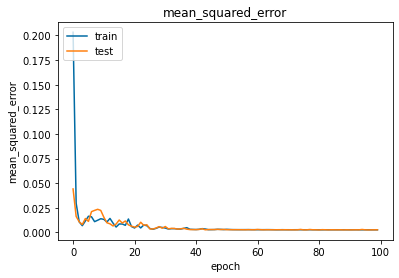

5348/5348 [==============================] - 0s 35us/sample - loss: 0.0027 - mean_squared_error: 0.0027
MSE: 0.0026854388415813446
Mean squared error: 0.00268544
Coefficient of determination: 0.8541


In [60]:
# 1 layer network:

# construct the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(40, input_dim=49, activation='relu'),
    tf.keras.layers.Dense(1)
])
print(model.summary())

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.MeanSquaredError()])
print("Start training")
# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# evaluate the model
mse = model.evaluate(X_test, y_test)[1]
print(f'MSE: {mse}')
y_pred=model.predict(X_test)
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(y_test, y_pred))


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 40)                1040      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 41        
Total params: 1,081
Trainable params: 1,081
Non-trainable params: 0
_________________________________________________________________
None
Start training
Train on 12478 samples, validate on 5348 samples
Epoch 1/100
12478/12478 [==============================] - 2s 143us/sample - loss: 0.1471 - mean_squared_error: 0.1471 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 2/100
12478/12478 [==============================] - 1s 80us/sample - loss: 0.0200 - mean_squared_error: 0.0200 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 3/100
12478/12478 [==============================] - 1s 82us/sample - loss: 0.0100 - mean_squared_

Epoch 45/100
12478/12478 [==============================] - 1s 75us/sample - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 46/100
12478/12478 [==============================] - 1s 72us/sample - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 47/100
12478/12478 [==============================] - 1s 75us/sample - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 48/100
12478/12478 [==============================] - 1s 74us/sample - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 49/100
12478/12478 [==============================] - 1s 75us/sample - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 50/100
12478/12478 [==============================] - 1s 75us/sample - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0028 - val_m

Epoch 93/100
12478/12478 [==============================] - 1s 71us/sample - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 94/100
12478/12478 [==============================] - 1s 76us/sample - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 95/100
12478/12478 [==============================] - 1s 71us/sample - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 96/100
12478/12478 [==============================] - 1s 75us/sample - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 97/100
12478/12478 [==============================] - 1s 74us/sample - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 98/100
12478/12478 [==============================] - 1s 75us/sample - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0027 - val_m

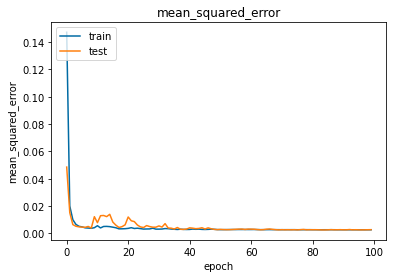

5348/5348 [==============================] - 0s 35us/sample - loss: 0.0028 - mean_squared_error: 0.0028
MSE: 0.0027657055761665106
Mean squared error: 0.00276571
Coefficient of determination: 0.8497


In [63]:
#with the features_ (no one-hot-encoding):

X_train, X_test, y_train, y_test = train_test_split(
    features_standardized_, En_con.reshape(-1,1), test_size=0.3, random_state=0)

# 1 layer network:

# construct the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(40, input_dim=25, activation='relu'),
    tf.keras.layers.Dense(1)
])
print(model.summary())

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.MeanSquaredError()])
print("Start training")
# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# evaluate the model
mse = model.evaluate(X_test, y_test)[1]
print(f'MSE: {mse}')
y_pred=model.predict(X_test)
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(y_test, y_pred))


So it seems better to use ALL features (0.8541 vs 0.8497).

Now, we include previous months values.

In [11]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

info_numeric = info_sorted.select_dtypes(['number']) 
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(info_numeric)

# the model learns that the second feature is double the first
info_numeric_multimp= imp.transform(info_numeric)
info_numeric_multimputed_df = pd.DataFrame(data = info_numeric_multimp)
info_numeric_multimputed_df.columns = info_numeric.columns
info_numeric_multimputed_df.index = info_numeric.index
#info_numeric_multimputed_df

In [12]:
dwelling_type = pd.get_dummies(info_sorted.dwelling_type, prefix='dwelling_type')
heating_fuel  = pd.get_dummies(info_sorted.heating_fuel, prefix='heating_fuel')
hot_water_fuel  = pd.get_dummies(info_sorted.hot_water_fuel, prefix='hot_water_fuel')
boiler_age   = pd.get_dummies(info_sorted.boiler_age , prefix='boiler_age')
loft_insulation = pd.get_dummies(info_sorted.loft_insulation  , prefix='loft_insulation')
wall_insulation= pd.get_dummies(info_sorted.wall_insulation , prefix='wall_insulation')
heating_temperature    = pd.get_dummies(info_sorted.heating_temperature, prefix='heating_temperature')
efficient_lighting_percentage= pd.get_dummies(info_sorted.efficient_lighting_percentage,
                                              prefix='efficient_lighting_percentage')

In [18]:
#these don't work out of the function file apperantly
def Eval_random_Split(features,npEn_con,split,model,print_res=True):
    X_train, X_test, y_train, y_test = train_test_split(
    features , npEn_con, test_size=split, random_state=0)
    #print(X_train.shape, y_train.shape)
    #print(X_test.shape, y_test.shape)
    model.fit(X_train,y_train)
    if print_res:
        y_pred=model.predict(X_test)
        print('Coefficients: \n', model.coef_)
        print('Intercept: {}'.format(model.intercept_))
        # The mean squared error
        print('Mean squared error: %.8f' % mean_squared_error(y_test, y_pred))
        # The coefficient of determination: 1 is perfect prediction
        print('Coefficient of determination: %.8f' % r2_score(y_test, y_pred))
    return model

def Check_1D(features,npEn_con,split,model,print_res=True):
    #extract only the last month from the features
    features_lm=features[:,(features.shape[-1]-1)]
    features_lm=features_lm.reshape(-1,1)
    #use previously made function
    return Eval_random_Split(features_lm,npEn_con,split,model,print_res)

#z-normalization on data:
def normalise_features(np_features):
    #np_features_norm= np.zeros(shape = np_features.shape)
    np_features_norm=np_features
    if np_features.ndim==1:
        np_features_norm=(np_features-np.mean(np_features))/np.std(np_features)
    else: 
        for i in range(np_features.shape[1]):
            np_features_norm[:,i] = (np_features[:,i]-np.mean(np_features[:,i]))/np.std(np_features[:,i])
    return np_features_norm

def Eval_Kfold_Split(features,npEn_con,n_splits,model,print_res=True):
    kf = KFold(n_splits, shuffle=True)
    models_arr=[]
    MSE_arr=[]
    R2_arr=[]
    for train_index, test_index in kf.split(features): 
        cmodel=model
        cmodel.fit(features[train_index,],npEn_con[train_index])
        models_arr.append(cmodel)
        y_pred = cmodel.predict(features[test_index,])
        MSE_arr.append(mean_squared_error(npEn_con[test_index,], y_pred));
        R2_arr.append(r2_score(npEn_con[test_index,], y_pred))
    if print_res:
        # The mean squared error
        print('Mean squared error:')
        print(np.mean(MSE_arr))
        # The coefficient of determination: 1 is perfect prediction
        print('Coefficient of determination: ' )
        print(np.mean(R2_arr))
    return models_arr,np.mean(R2_arr)

In [20]:
def sort_big_data(nim,nom):
    #nim: number of input months
    #nom: number of output months
    
    #CHECK INPUTS
    if nim<1:
        print("number of input months (nim) should be greater or equal to 1")
        return 0
    if nom<1:
        print("number of output months (nom) should be greater or equal to 1")
        return 0
    
    #DATA STORAGE
    En_con=[]        #current/future consumption (this is what we try to predict)
    prev_con=[]      #previous consumption
    prev_daily_con=[]  #previous consumption on a daily basis
    #extra info
    temps=[]
    temps_min=[]
    temps_max=[]
    month_arr=[]
    br_arr=[]       #Bedroom info array
    br_arr_mean=[]
    dwt_arr=[]      #dwelling type array
    y = pd.get_dummies(info_sorted.dwelling_type, prefix='dwelling_type')
    #new features
    num_occupants_=[]
    dishwasher_ =[]
    freezer_ =[]
    fridge_freezer_ =[]
    refrigerator_ =[]
    tumble_dryer_ =[]
    washing_machine_ =[]
    game_console_ =[]
    laptop_ =[]
    pc_ =[]
    router_ =[]
    set_top_box_ =[]
    tablet_ =[]
    tv_ =[]
    
    #heating_fuel: 
    heating_fuel_elec=[]
    heating_fuel_gas= []
    heating_fuel_lpg_oil=[]
    heating_fuel_other= []

    #hot_water_fuel:
    hot_water_fuel_elec=[]
    hot_water_fuel_gas=[]
    hot_water_fuel_other=[] 

    #boiler_age:
    boiler_age_new= []
    boiler_age_old= [] 

    #loft_insulation:
    loft_insulation_n=[] 
    loft_insulation_y= []

    #wall_insulation:
    wall_insulation_n=[]
    wall_insulation_not_sure=[]
    wall_insulation_y_cavity= []
    wall_insulation_y_external= []
    wall_insulation_y_internal= []

    #heating_temperature:
    heating_temperature_18_to_20=[]
    heating_temperature_above_20=[]
    heating_temperature_below_18=[]
    heating_temperature_not_sure= []

    #efficient_lighting_percentage:
    efficient_lighting_percentage_0_to_25=[]
    efficient_lighting_percentage_25_to_50=[]
    efficient_lighting_percentage_50_to_75=[]
    efficient_lighting_percentage_75_to_100=[]
        
    num_occupants__ = info_numeric_multimputed_df["num_occupants"]
    dishwasher__ = info_numeric_multimputed_df["dishwasher"]
    freezer__ = info_numeric_multimputed_df["freezer"]
    fridge_freezer__ = info_numeric_multimputed_df["fridge_freezer"]
    refrigerator__ = info_numeric_multimputed_df["refrigerator"]
    tumble_dryer__ = info_numeric_multimputed_df["tumble_dryer"]
    washing_machine__ = info_numeric_multimputed_df["washing_machine"]
    game_console__ = info_numeric_multimputed_df["game_console"]
    laptop__ = info_numeric_multimputed_df["laptop"]
    pc__ = info_numeric_multimputed_df["pc"]
    router__ = info_numeric_multimputed_df["router"]
    set_top_box__= info_numeric_multimputed_df["set_top_box"]
    tablet__ = info_numeric_multimputed_df["tablet"]
    tv__ = info_numeric_multimputed_df["tv"]   
    
    #LOOP
    NaN_t=1200  #thershold
    #NaN_day_T=20 #the amount of days of data we want in a input month(28 days)
    for i in range(df.shape[0]): # loop over all users
        meter=df.iloc[i] # = row number i  
    
        #loop over all month from januari until month 14-nim-nom
        #if the month is higher then this we don't have enough data for the nim input and nom output variables
        #in the case of nim=1 nom=1 we get range(1,12) wich result in m going from 1 to 11 like we want
        for m in range (1,14-nim-nom): 
            #load current month
            bi, ei =get_monthi(m)    #bi (begin index) ei(end index)
            month=meter[bi:ei]       #data for the month m for the row user (row) i
            #load bedroom info
            row = brinfo[i:i+1]               #bedroom info with NaN values
            row_mean = brinfo_filled[i:i+1]  #bedroom info with mean values
            #Load dwelling type
            dew_type_row = y[i:i+1]
            
            num_occupants_row =num_occupants__[i:i+1]
            dishwasher_row = dishwasher__[i:i+1]
            freezer_row = freezer__[i:i+1]
            fridge_freezer_row = fridge_freezer__[i:i+1]
            refrigerator_row = refrigerator__[i:i+1]
            tumble_dryer_row = tumble_dryer__[i:i+1]
            washing_machine_row = washing_machine__[i:i+1]
            game_console_row = game_console__[i:i+1]
            laptop_row =  laptop__[i:i+1]
            pc_row = pc__[i:i+1]
            router_row = router__[i:i+1]
            set_top_box_row = set_top_box__[i:i+1]
            tablet_row = tablet__[i:i+1]
            tv_row = tv__[i:i+1] 
            
            heating_fuel_row = heating_fuel[i:i+1]
            hot_water_fuel_row = hot_water_fuel[i:i+1]
            boiler_age_row = boiler_age[i:i+1]
            loft_insulation_row = loft_insulation[i:i+1]
            wall_insulation_row = wall_insulation[i:i+1]
            heating_temperature_row = heating_temperature[i:i+1]
            efficient_lighting_percentage_row = efficient_lighting_percentage[i:i+1]
            
            # Count the amount of NaN's in all months that will be used
            n_NaN=0
            for k in range(nim+nom):
                bi, ei =get_monthi(m+k)        #bi (begin index) ei(end index)
                tempmonth=meter[bi:ei]       #data for the month m for the row user (row) i
                n_NaN+=tempmonth.isnull().sum() 
            
            if n_NaN<NaN_t:
                #save input for month j,j+1,..,j+nim-1
                input_months=np.zeros(nim)
                input_days=np.zeros([nim,28])
                input_temps=np.zeros(nim)
                input_temps_min=np.zeros(nim)
                input_temps_max=np.zeros(nim)
                output_months=np.zeros(nom)
                output_temps=np.zeros(nom)
                output_temps_min=np.zeros(nom)
                output_temps_max=np.zeros(nom)
                for k in range(nim):
                    #load month for input j+k (k goes from 0 to nim-1)
                    bik,eik=get_monthi(m+k)
                    input_months[k]=meter[bik:eik].mean()
                    daily_con=np.zeros(28)
                    current_month=meter[bik:eik]
                    #print(current_month)
                    #save daily data
                    for d in range(28):
                        daily_con[d]=current_month[d*48:(d+1)*48].mean()
                        input_days[k,:]=daily_con
                    #replace all NaN with the mean value
                    input_days[k,np.isnan(input_days[k,:])]=input_months[k] 
                    #temperatures
                    input_temps[k]=get_mean_temp(weather_avg_sorted.iloc[i:i+1],m+k)
                    input_temps_min[k]=get_mean_temp(weather_min_sorted.iloc[i:i+1],m+k)
                    input_temps_max[k]=get_mean_temp(weather_max_sorted.iloc[i:i+1],m+k)
                for k in range(nom):
                    #load month for input j+nim+k
                    bik,eik=get_monthi(m+nim+k)
                    output_months[k]=meter[bik:eik].mean()
                    #temps
                    output_temps[k]=get_mean_temp(weather_avg_sorted.iloc[i:i+1],m+nim+k)
                    output_temps_min[k]=get_mean_temp(weather_min_sorted.iloc[i:i+1],m+nim+k)
                    output_temps_max[k]=get_mean_temp(weather_max_sorted.iloc[i:i+1],m+nim+k)
                #debug if statement checks for NaN in input month
#                 if np.isnan(np.sum(input_months)):
#                     print("input month has nan value for months=%i index=%i" %(m,i))
#                     print(input_months)
#                     return 1
#                 if np.isnan(np.sum(np.sum(input_days))):
#                     print("input days has nan value for months=%i index=%i" %(m,i))
#                     print(input_days)
#                     return 1
#                 if np.isnan(np.sum(output_months)):
#                     print("Output months has nan value for months=%i index=%i" %(m,i))
#                     print(output_months)
#                     return 1
                #store Energy consumption data
                prev_con.append(input_months)
                prev_daily_con.append(input_days)
                En_con.append(output_months)
                #save extra information 
                temps.append(np.concatenate((input_temps,output_temps)))
                temps_min.append(np.concatenate((input_temps_min,output_temps_min)))
                temps_max.append(np.concatenate((input_temps_max,output_temps_max)))
                month_arr.append(m+nim)
                #bedroom info
                n_br=row[0]
                br=np.zeros(5)
                if ~np.isnan(n_br):
                    #print(n_br)
                    br[np.int(n_br-1)]=1
                br_arr.append(br)
                br_arr_mean.append(row_mean[0])
                #dwelling type
                dwt_arr.append(dew_type_row.to_numpy().ravel())
                #new features
                num_occupants_.append(num_occupants_row[0])
                dishwasher_.append(dishwasher_row[0])
                freezer_.append(freezer_row[0])
                fridge_freezer_.append(fridge_freezer_row[0])
                refrigerator_.append(refrigerator_row[0])
                tumble_dryer_.append(tumble_dryer_row[0])
                washing_machine_.append(washing_machine_row[0])
                game_console_.append(game_console_row[0])
                laptop_.append(laptop_row[0])
                pc_.append(pc_row[0])
                router_.append(router_row[0])
                set_top_box_.append(set_top_box_row[0])
                tablet_.append(tablet_row[0])
                tv_.append(tv_row[0])
                #one-hot-encoded-values:                
                heating_fuel_elec.append(heating_fuel_row.iloc[0,0])
                heating_fuel_gas.append(heating_fuel_row.iloc[0,1])
                heating_fuel_lpg_oil.append(heating_fuel_row.iloc[0,2])
                heating_fuel_other.append(heating_fuel_row.iloc[0,3])
                
                hot_water_fuel_elec.append(hot_water_fuel_row.iloc[0,0])
                hot_water_fuel_gas.append(hot_water_fuel_row.iloc[0,1])
                hot_water_fuel_other.append(hot_water_fuel_row.iloc[0,2])
                
                boiler_age_new.append(boiler_age_row.iloc[0,0])
                boiler_age_old.append(boiler_age_row.iloc[0, 1])
                
                loft_insulation_n.append(loft_insulation_row.iloc[0,0])
                loft_insulation_y.append(loft_insulation_row.iloc[0,1])
                
                wall_insulation_n.append(wall_insulation_row.iloc[0,0])
                wall_insulation_not_sure.append(wall_insulation_row.iloc[0,1])
                wall_insulation_y_cavity.append(wall_insulation_row.iloc[0,2])
                wall_insulation_y_external.append(wall_insulation_row.iloc[0,3])
                wall_insulation_y_internal.append(wall_insulation_row.iloc[0,4])
                
                heating_temperature_18_to_20.append(heating_temperature_row.iloc[0,0])
                heating_temperature_above_20.append(heating_temperature_row.iloc[0,1])
                heating_temperature_below_18.append(heating_temperature_row.iloc[0,2])
                heating_temperature_not_sure.append(heating_temperature_row.iloc[0,3])
                
                efficient_lighting_percentage_0_to_25.append(efficient_lighting_percentage_row.iloc[0,0])
                efficient_lighting_percentage_25_to_50.append(efficient_lighting_percentage_row.iloc[0,1])
                efficient_lighting_percentage_50_to_75.append(efficient_lighting_percentage_row.iloc[0,2])
                efficient_lighting_percentage_75_to_100.append(efficient_lighting_percentage_row.iloc[0,3])
                        
                #break out of outer month loops since the inner month loop takes care of all months
                #break
                
    # converting list to numpy arrays: 
    npEn_con=np.array(En_con)
    npprev_con=np.array(prev_con)
    npprev_daily_con=np.array(prev_daily_con)
    nptemps=np.array(temps)
    nptemps_min=np.array(temps_min)
    nptemps_max=np.array(temps_max)
    npmonth=np.array(month_arr)
    npbr=np.array(br_arr)
    npbrmean=np.array(br_arr_mean)
    npdwt=np.array(dwt_arr)
    num_occupants= np.array(num_occupants_)
    dishwasher =np.array(dishwasher_)
    freezer =np.array(freezer_)
    fridge_freezer =np.array(fridge_freezer_)
    refrigerator =np.array(refrigerator_)
    tumble_dryer =np.array(tumble_dryer_)
    washing_machine =np.array(washing_machine_)
    game_console = np.array(game_console_)
    laptop =np.array(laptop_)
    pc =np.array(pc_)
    router =np.array(router_)
    set_top_box =np.array(set_top_box_)
    tablet =np.array(tablet_)
    tv =np.array(tv_)
    heating_fuel_elec=np.array(heating_fuel_elec)
    heating_fuel_gas= np.array(heating_fuel_gas)
    heating_fuel_lpg_oil=np.array(heating_fuel_lpg_oil)
    heating_fuel_other= np.array(heating_fuel_other)
    hot_water_fuel_elec=np.array(hot_water_fuel_elec)
    hot_water_fuel_gas=np.array(hot_water_fuel_gas)
    hot_water_fuel_other=np.array(hot_water_fuel_other)
    boiler_age_new= np.array(boiler_age_new)
    boiler_age_old= np.array(boiler_age_old)
    loft_insulation_n=np.array(loft_insulation_n)
    loft_insulation_y= np.array(loft_insulation_y)
    wall_insulation_n=np.array(wall_insulation_n)
    wall_insulation_not_sure=np.array(wall_insulation_not_sure)
    wall_insulation_y_cavity= np.array(wall_insulation_y_cavity)
    wall_insulation_y_external= np.array(wall_insulation_y_external)
    wall_insulation_y_internal= np.array(wall_insulation_y_internal)
    heating_temperature_18_to_20=np.array(heating_temperature_18_to_20)
    heating_temperature_above_20=np.array(heating_temperature_above_20)
    heating_temperature_below_18=np.array(heating_temperature_below_18)
    heating_temperature_not_sure= np.array(heating_temperature_not_sure)
    efficient_lighting_percentage_0_to_25=np.array(efficient_lighting_percentage_0_to_25)
    efficient_lighting_percentage_25_to_50=np.array(efficient_lighting_percentage_25_to_50)
    efficient_lighting_percentage_50_to_75=np.array(efficient_lighting_percentage_50_to_75)
    efficient_lighting_percentage_75_to_100=np.array(efficient_lighting_percentage_75_to_100)
    
    features = np.column_stack((npbrmean,npdwt, num_occupants,dishwasher, freezer, fridge_freezer,
                                refrigerator, tumble_dryer, washing_machine,game_console,
                                laptop,pc, router, set_top_box, tablet, tv, heating_fuel_elec,
                                heating_fuel_gas, heating_fuel_lpg_oil, heating_fuel_other,
                                hot_water_fuel_elec, hot_water_fuel_gas, 
                                hot_water_fuel_other, boiler_age_new, boiler_age_old, 
                                loft_insulation_n, loft_insulation_y, wall_insulation_n,
                                wall_insulation_not_sure, wall_insulation_y_cavity
                                ,wall_insulation_y_external, wall_insulation_y_internal, 
                                heating_temperature_18_to_20, 
                                heating_temperature_above_20, 
                                heating_temperature_below_18, heating_temperature_not_sure,
                                efficient_lighting_percentage_0_to_25, 
                                efficient_lighting_percentage_25_to_50, 
                                efficient_lighting_percentage_50_to_75, 
                                efficient_lighting_percentage_75_to_100))
    
    npEn_con_st=StandardScaler().fit_transform(npEn_con) 
    npprev_con_st=StandardScaler().fit_transform(npprev_con) 
    npprev_daily_con_st=normalise_features(npprev_daily_con) 
    nptemps_st=StandardScaler().fit_transform(nptemps) 
    nptemps_min_st=StandardScaler().fit_transform(nptemps_min) 
    nptemps_max_st=StandardScaler().fit_transform(nptemps_max) 
    npmonth_st=normalise_features(npmonth) 
    features_st=StandardScaler().fit_transform(features) 
    
    return [npEn_con_st,npprev_con_st,npprev_daily_con_st,nptemps_st,nptemps_min_st,nptemps_max_st,npmonth_st,features_st]


In [21]:
bigdata11=sort_big_data(1,1)

KeyboardInterrupt: 

In [48]:
bigdata11=sort_big_data(1,1)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 17755 and the array at index 2 has size 497140

In [68]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
#When the number of available neighbors is less than n_neighbors and there are no defined distances
#to the training set, #the training set average for that feature is used during imputation.
info_numeric_imputed = imputer.fit_transform(info_numeric)
info_numeric_imputed_df = pd.DataFrame(data = info_numeric_imputed)
info_numeric_imputed_df.columns = info_numeric.columns
info_numeric_imputed_df.index = info_numeric.index
info_numeric_imputed_df


,num_occupants,num_bedrooms,dishwasher,freezer,fridge_freezer,refrigerator,tumble_dryer,washing_machine,game_console,laptop,pc,router,set_top_box,tablet,tv
meter_id,,,,,,,,,,,,,,,
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,2.500000,2.000000,0.500000,1.500000,0.500000,1.500000,0.500000,1.0,1.5,1.500000,1.000000,1.000000,1.0,0.500000,2.500000
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da,2.391892,3.112426,0.592105,0.728571,0.771429,0.671233,0.618421,1.0,0.5,1.228571,0.828571,1.028986,1.1,1.257143,2.026667
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f,2.391892,3.112426,0.592105,0.728571,0.771429,0.671233,0.618421,1.0,0.5,1.228571,0.828571,1.028986,1.1,1.257143,2.026667
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407,2.391892,3.112426,0.592105,0.728571,0.771429,0.671233,0.618421,1.0,0.5,1.228571,0.828571,1.028986,1.1,1.257143,2.026667
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f,2.391892,3.112426,0.592105,0.728571,0.771429,0.671233,0.618421,1.0,0.5,1.228571,0.828571,1.028986,1.1,1.257143,2.026667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065,2.391892,3.112426,0.592105,0.728571,0.771429,0.671233,0.618421,1.0,0.5,1.228571,0.828571,1.028986,1.1,1.257143,2.026667
0xfdaf9f857621ec06f2cf801f42a020a322835090,2.391892,3.112426,0.592105,0.728571,0.771429,0.671233,0.618421,1.0,0.5,1.228571,0.828571,1.028986,1.1,1.257143,2.026667
0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18,2.391892,3.112426,0.592105,0.728571,0.771429,0.671233,0.618421,1.0,0.5,1.228571,0.828571,1.028986,1.1,1.257143,2.026667


In [215]:
def sort_data(nim,nom,combine_output=False):
    #nim: number of input months
    #nom: number of output months
    
    #CHECK INPUTS
    if nim<1:
        print("number of input months (nim) should be greater or equal to 1")
        return 0
    if nom<1:
        print("number of output months (nom) should be greater or equal to 1")
        return 0
    
    #DATA STORAGE
    En_con=[]        #current/future consumption (this is what we try to predict)
    prev_con=[]      #previous consumption
    prev_daily_con=[]  #previous consumption on a daily basis
    #extra info
    temps=[]
    temps_min=[]
    temps_max=[]
    month_arr=[]
    br_arr=[]       #Bedroom info array
    br_arr_mean=[]
    dwt_arr=[]      #dwelling type array
    
    num_occupants=[]
    dishwasher =[]
    freezer =[]
    fridge_freezer =[]
    refrigerator =[]
    tumble_dryer =[]
    washing_machine =[]
    game_console =[]
    laptop =[]
    pc =[]
    router =[]
    set_top_box =[]
    tablet =[]
    tv =[]

    #values are in same order as the pd df.

    #heating_fuel: 
    heating_fuel_elec=[]
    heating_fuel_gas= []
    heating_fuel_lpg_oil=[]
    heating_fuel_other= []



    #hot_water_fuel:
    hot_water_fuel_elec=[]
    hot_water_fuel_gas=[]
    hot_water_fuel_other=[] 

    #boiler_age:
    boiler_age_new= []
    boiler_age_old= [] 

    #loft_insulation:
    loft_insulation_n=[] 
    loft_insulation_y= []

    #wall_insulation:

    wall_insulation_n=[]
    wall_insulation_not_sure=[]
    wall_insulation_y_cavity= []
    wall_insulation_y_external= []
    wall_insulation_y_internal= []


    #heating_temperature:

    heating_temperature_18_to_20=[]
    heating_temperature_above_20=[]
    heating_temperature_below_18=[]
    heating_temperature_not_sure= []

    #efficient_lighting_percentage:
    efficient_lighting_percentage_0_to_25=[]
    efficient_lighting_percentage_25_to_50=[]
    efficient_lighting_percentage_50_to_75=[]
    efficient_lighting_percentage_75_to_100=[]
    
    
    num_occupants_ = info_numeric_multimputed_df["num_occupants"]
    dishwasher_ = info_numeric_multimputed_df["dishwasher"]
    freezer_ = info_numeric_multimputed_df["freezer"]
    fridge_freezer_ = info_numeric_multimputed_df["fridge_freezer"]
    refrigerator_ = info_numeric_multimputed_df["refrigerator"]
    tumble_dryer_ = info_numeric_multimputed_df["tumble_dryer"]
    washing_machine_ = info_numeric_multimputed_df["washing_machine"]
    game_console_ = info_numeric_multimputed_df["game_console"]
    laptop_ = info_numeric_multimputed_df["laptop"]
    pc_ = info_numeric_multimputed_df["pc"]
    router_ = info_numeric_multimputed_df["router"]
    set_top_box_ = info_numeric_multimputed_df["set_top_box"]
    tablet_ = info_numeric_multimputed_df["tablet"]
    tv_ = info_numeric_multimputed_df["tv"]       
    
    
    y = pd.get_dummies(info_sorted.dwelling_type, prefix='dwelling_type')
    
    #LOOP
    NaN_t=1200  #thershold
    #NaN_day_T=20 #the amount of days of data we want in a input month(28 days)
    for i in range(df.shape[0]): # loop over all users
        meter=df.iloc[i] # = row number i  
    
        #loop over all month from januari until month 14-nim-nom
        #if the month is higher then this we don't have enough data for the nim input and nom output variables
        #in the case of nim=1 nom=1 we get range(1,12) wich result in m going from 1 to 11 like we want
        for m in range (1,14-nim-nom): 
            #load current month
            bi, ei =get_monthi(m)    #bi (begin index) ei(end index)
            month=meter[bi:ei]       #data for the month m for the row user (row) i
            #load bedroom info
            row = brinfo[i:i+1]               #bedroom info with NaN values
            row_mean = brinfo_filled[i:i+1]  #bedroom info with mean values
            #Load dwelling type
            dew_type_row = y[i:i+1]
            
            # Count the amount of NaN's in all months that will be used
            n_NaN=0
            for k in range(nim+nom):
                bi, ei =get_monthi(m+k)        #bi (begin index) ei(end index)
                tempmonth=meter[bi:ei]       #data for the month m for the row user (row) i
                n_NaN+=tempmonth.isnull().sum() 
            
            if n_NaN<NaN_t:
                #save input for month j,j+1,..,j+nim-1
                input_months=np.zeros(nim)
                input_days=np.zeros([nim,28])
                input_temps=np.zeros(nim)
                input_temps_min=np.zeros(nim)
                input_temps_max=np.zeros(nim)
                output_months=np.zeros(nom)
                output_temps=np.zeros(nom)
                output_temps_min=np.zeros(nom)
                output_temps_max=np.zeros(nom)
                for k in range(nim):
                    #load month for input j+k (k goes from 0 to nim-1)
                    bik,eik=get_monthi(m+k)
                    input_months[k]=meter[bik:eik].mean()
                    daily_con=np.zeros(28)
                    current_month=meter[bik:eik]
                    #print(current_month)
                    #save daily data
                    for d in range(28):
                        daily_con[d]=current_month[d*48:(d+1)*48].mean()
                        input_days[k,:]=daily_con
                    #replace all NaN with the mean value
                    input_days[k,np.isnan(input_days[k,:])]=input_months[k] 
                    #temperatures
                    input_temps[k]=get_mean_temp(weather_avg_sorted.iloc[i:i+1],m+k)
                    input_temps_min[k]=get_mean_temp(weather_min_sorted.iloc[i:i+1],m+k)
                    input_temps_max[k]=get_mean_temp(weather_max_sorted.iloc[i:i+1],m+k)
                for k in range(nom):
                    #load month for input j+nim+k
                    bik,eik=get_monthi(m+nim+k)
                    output_months[k]=meter[bik:eik].mean()
                    #temps
                    output_temps[k]=get_mean_temp(weather_avg_sorted.iloc[i:i+1],m+nim+k)
                    output_temps_min[k]=get_mean_temp(weather_min_sorted.iloc[i:i+1],m+nim+k)
                    output_temps_max[k]=get_mean_temp(weather_max_sorted.iloc[i:i+1],m+nim+k)

                prev_con.append(input_months)
                prev_daily_con.append(input_days)
                En_con.append(output_months)
                #save extra information 
                temps.append(np.concatenate((input_temps,output_temps)))
                temps_min.append(np.concatenate((input_temps_min,output_temps_min)))
                temps_max.append(np.concatenate((input_temps_max,output_temps_max)))
                month_arr.append(m+nim)
                #bedroom info
                n_br=row[0]
                br=np.zeros(5)
                if ~np.isnan(n_br):
                    #print(n_br)
                    br[np.int(n_br-1)]=1
                br_arr.append(br)
                br_arr_mean.append(row_mean[0])
                #dwelling type
                dwt_arr.append(dew_type_row.to_numpy().ravel())
                        
                #break out of outer month loops since the inner month loop takes care of all months
                #break
                
    # converting list to numpy arrays: 
    npEn_con=np.array(En_con)
    npprev_con=np.array(prev_con)
    npprev_daily_con=np.array(prev_daily_con)
    nptemps=np.array(temps)
    nptemps_min=np.array(temps_min)
    nptemps_max=np.array(temps_max)
    npmonth=np.array(month_arr)
    npbr=np.array(br_arr)
    npbrmean=np.array(br_arr_mean)
    npdwt=np.array(dwt_arr)
    
    #This should probably be done differently 
    if combine_output:
        return [npEn_con,npprev_con,npprev_daily_con,nptemps,nptemps_min,nptemps_max,npmonth,npbr,npbrmean,npdwt]
    else:
        return npEn_con,npprev_con,npprev_daily_con,nptemps,nptemps_min,nptemps_max,npmonth,npbr,npbrmean,npdwt

In [216]:
data31 = sort_data(3,1, True)

In [223]:
def run_NN_tests(data,En,nim,nom,pr=True):
    
    
    if pr:
        print('\n#####################################')
        print('1) Include all temprature info + (one hot enconding br)+dwellling type')
        print('#####################################')
    features=np.column_stack(((data[1],data[3],data[4],
                               data[5],data[6],data[7],data[9])))
    
    
    kf = KFold(n_splits, shuffle=True)
    R2_arr=[]
    for train_index, test_index in kf.split(features): 
        #create model
        model = tf.keras.models.Sequential([
                tf.keras.layers.Dense(40, input_dim=(nim+3*(nim+nom)+11), activation='relu'),
                tf.keras.layers.Dense(nom)])
        model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.MeanSquaredError()])
        cmodel=model
        history = cmodel.fit(features[train_index,], En[train_index], 
                             validation_data=(features[test_index,], En[test_index]), epochs=20)
        y_pred = cmodel.predict(features[test_index,])
        R2_arr.append(r2_score(En[test_index,], y_pred))

    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['val_mean_squared_error'])
    plt.title('mean_squared_error')
    plt.ylabel('mean_squared_error')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # evaluate the model
    mse = model.evaluate(X_test, y_test)[1]
    print(f'MSE: {mse}')
    y_pred=model.predict(X_test)
    print('Mean squared error: %.8f'
          % mean_squared_error(y_test, y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.4f'
          % r2_score(y_test, y_pred))



#####################################
1) Include all temprature info + (one hot enconding br)+dwellling type
#####################################
Train on 10751 samples, validate on 1195 samples
Epoch 1/20
10751/10751 [==============================] - 1s 128us/sample - loss: 2.6623 - mean_squared_error: 2.6623 - val_loss: 0.0540 - val_mean_squared_error: 0.0540
Epoch 2/20
10751/10751 [==============================] - 1s 70us/sample - loss: 0.0456 - mean_squared_error: 0.0456 - val_loss: 0.0403 - val_mean_squared_error: 0.0403
Epoch 3/20
10751/10751 [==============================] - 1s 93us/sample - loss: 0.0345 - mean_squared_error: 0.0345 - val_loss: 0.0310 - val_mean_squared_error: 0.0310
Epoch 4/20
10751/10751 [==============================] - 1s 91us/sample - loss: 0.0279 - mean_squared_error: 0.0279 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 5/20
10751/10751 [==============================] - 1s 68us/sample - loss: 0.0231 - mean_squared_error: 0.0231 - val_los

10751/10751 [==============================] - 1s 55us/sample - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 8/20
10751/10751 [==============================] - 1s 78us/sample - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 9/20
10751/10751 [==============================] - 1s 73us/sample - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 10/20
10751/10751 [==============================] - 1s 56us/sample - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 11/20
10751/10751 [==============================] - 1s 56us/sample - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 12/20
10751/10751 [==============================] - 1s 68us/sample - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0078 - val_mean_squared_error: 0

Epoch 15/20
10751/10751 [==============================] - 1s 68us/sample - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 16/20
10751/10751 [==============================] - 1s 70us/sample - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 17/20
10751/10751 [==============================] - 1s 82us/sample - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 18/20
10751/10751 [==============================] - 1s 88us/sample - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 19/20
10751/10751 [==============================] - 1s 74us/sample - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 20/20
10751/10751 [==============================] - 1s 70us/sample - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0067 - val_mean_sq

10752/10752 [==============================] - 1s 101us/sample - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 3/20
10752/10752 [==============================] - 1s 108us/sample - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 4/20
10752/10752 [==============================] - 1s 84us/sample - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 5/20
10752/10752 [==============================] - 1s 81us/sample - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 6/20
10752/10752 [==============================] - 1s 94us/sample - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 7/20
10752/10752 [==============================] - 1s 60us/sample - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0059 - val_mean_squared_error: 0.

Epoch 10/20
10752/10752 [==============================] - 1s 86us/sample - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 11/20
10752/10752 [==============================] - 1s 61us/sample - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 12/20
10752/10752 [==============================] - 1s 72us/sample - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 13/20
10752/10752 [==============================] - 1s 87us/sample - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 14/20
10752/10752 [==============================] - 1s 74us/sample - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 15/20
10752/10752 [==============================] - 1s 85us/sample - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0039 - val_mean_sq

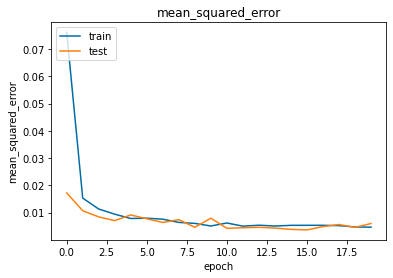

ValueError: Error when checking input: expected dense_112_input to have shape (26,) but got array with shape (72,)

In [224]:
from sklearn.model_selection import KFold
n_splits=10
run_NN_tests(data31, data31[0], 3, 1)

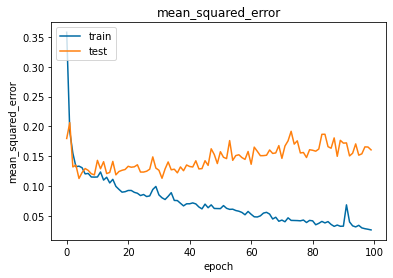

1631/1631 [==============================] - 0s 57us/sample - loss: 0.1607 - mean_squared_error: 0.1607
MSE: 0.16067327558994293
Mean squared error: 0.16067329
Coefficient of determination: 0.8327


In [221]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# evaluate the model
mse = model.evaluate(X_test, y_test)[1]
print(f'MSE: {mse}')
y_pred=model.predict(X_test)
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(y_test, y_pred))
